In [1]:
import seaborn as sns
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import missingno as msno
import scipy.stats as stats

In [3]:
import matplotlib #.pyplot as plt1
from matplotlib import pyplot as plt

import pandas as pd
import scipy as sp
import seaborn as sns
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import missingno as msno
import scipy.stats as stats

import warnings
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error 


import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

from matplotlib import style
from matplotlib.legend_handler import HandlerBase
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split,cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score#,plot_roc_curve  # for classification

import kds
import numpy as np

In [5]:
df= pd.read_csv('C:/Users/renzo/Base_Train_Transf.csv', sep=';')

In [7]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [9]:
df.dtypes

PERIODO_1                            int64
LLAVE                               object
TARGET                               int64
ANTIGUEDAD                           int64
ANTIGUEDAD_rootInv                 float64
CUOTA_TOPE_power2                  float64
Deuda_PE_BF_rootInv                float64
Deuda_PE_SF_U1A_rootInv            float64
Deuda_PE_SF_U6M                    float64
Deuda_PE_SF_U6M_rootInv            float64
Deuda_TC_PE_BF                     float64
Deuda_TC_PE_BF_log                 float64
Deuda_TC_PE_SF_log                 float64
Deuda_TC_SF_U3M                    float64
DISPONIBLE_FINAL_SC_RED            float64
DISPONIBLE_FINAL_SC_RED_log        float64
DISPONIBLE_FINAL_SC_RED_rootInv    float64
EDAD                                 int64
LINEACREDITO_rootInv               float64
montodesembolsoPE_rootInv          float64
MONTOSOLES_onTHEM                  float64
MONTOSOLES_onTHEM_rootInv          float64
n_desembolsosPE                      int64
PromDesembo

<Axes: >

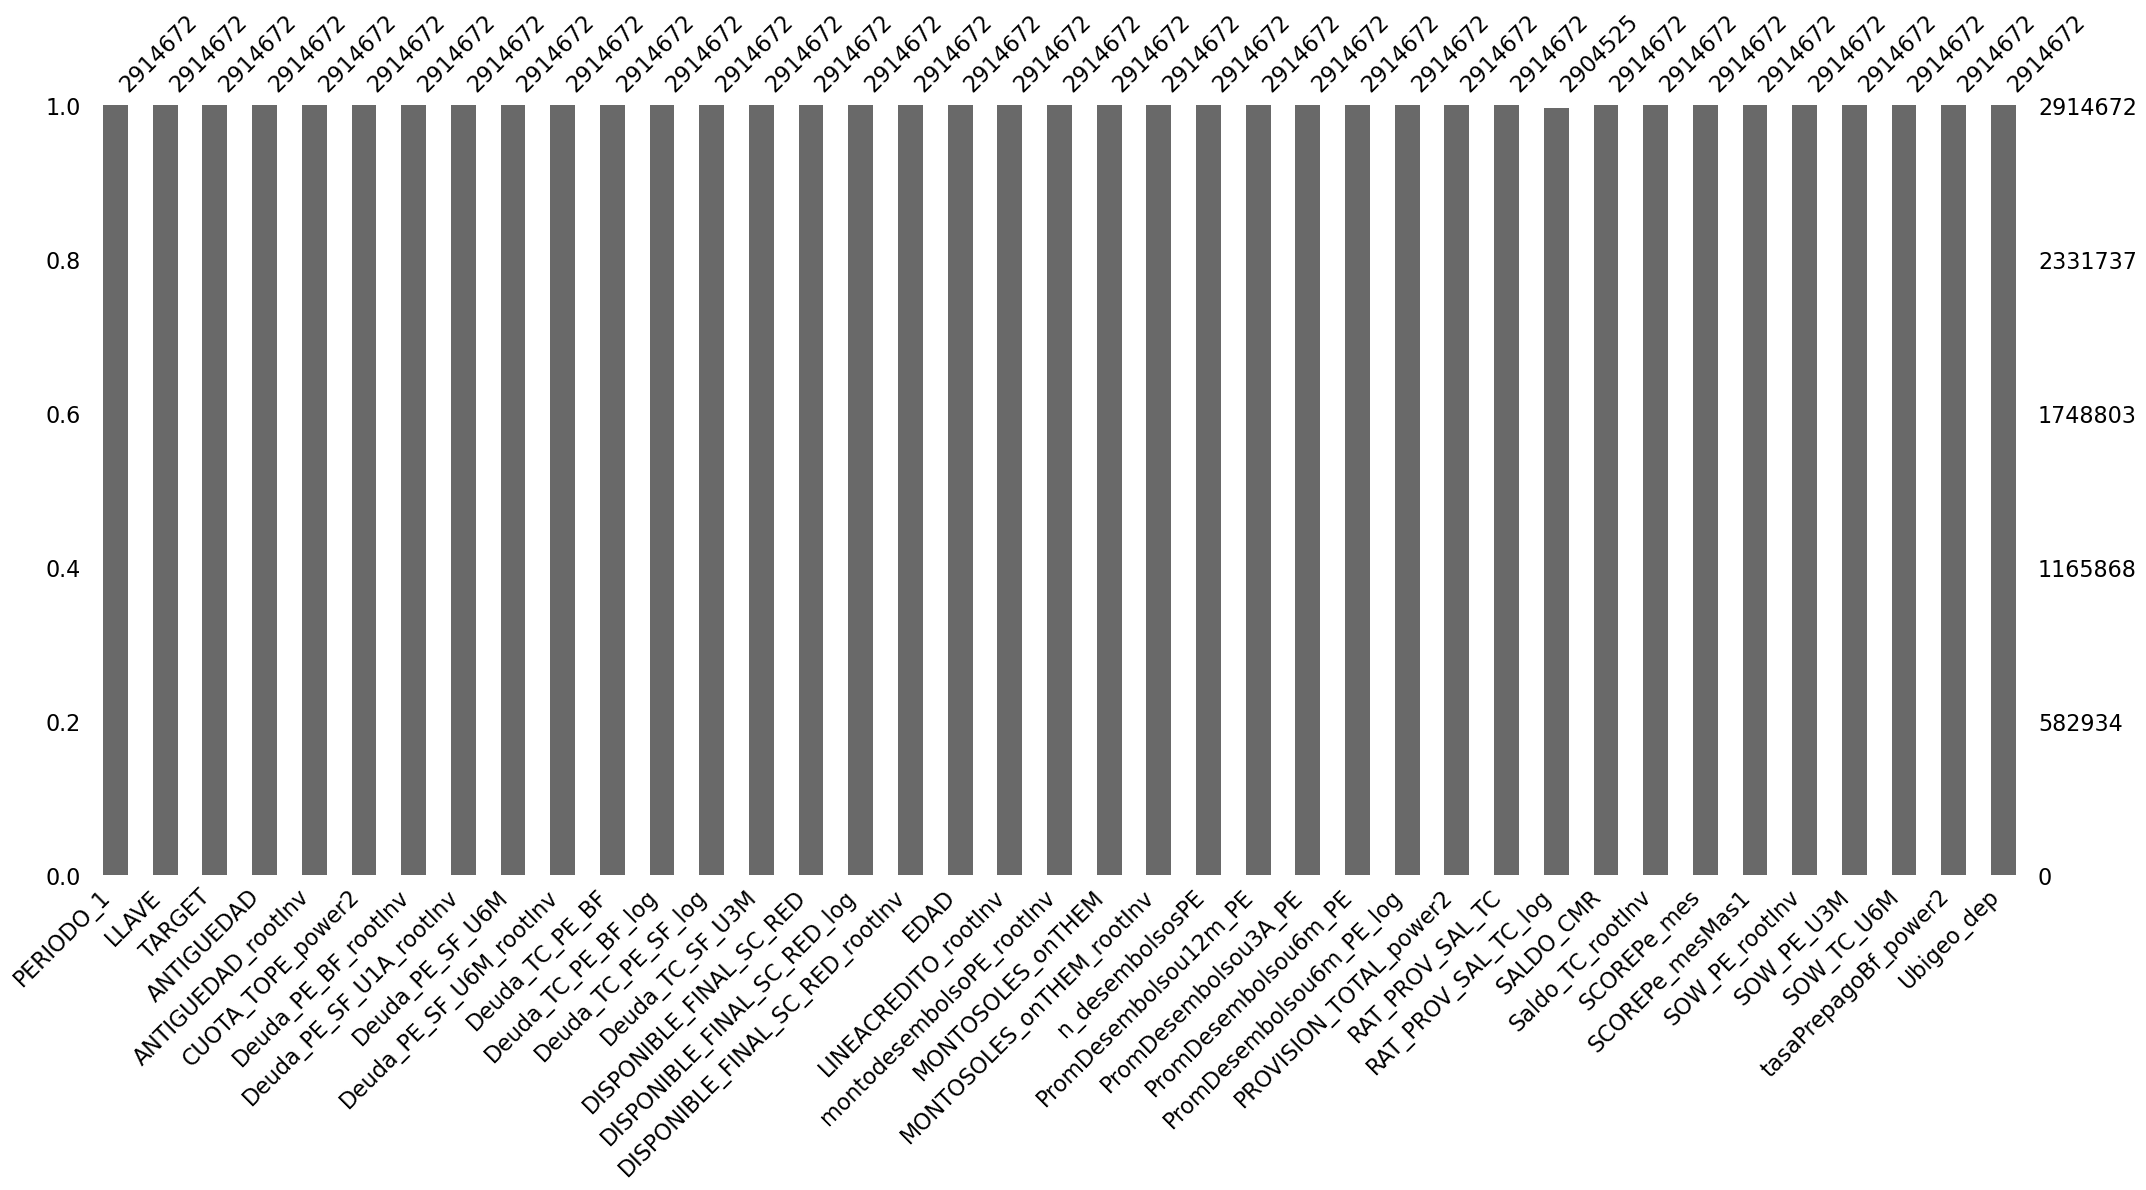

In [11]:
import missingno as msno
msno.bar(df)

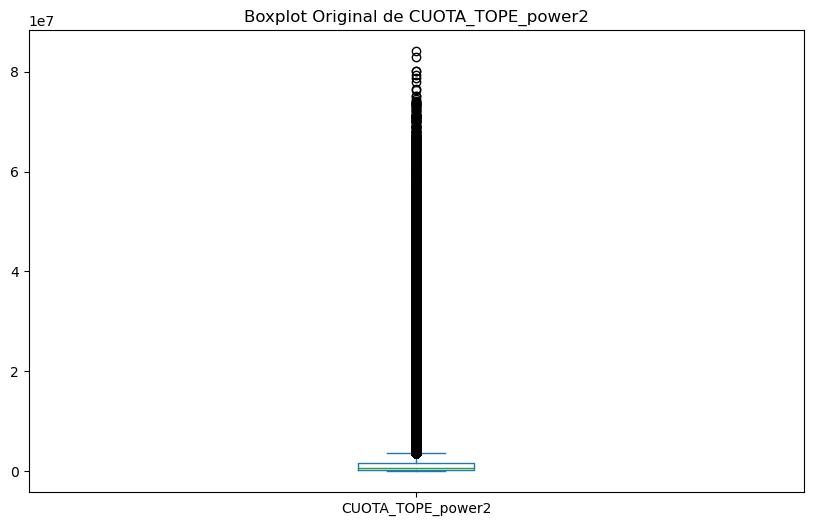

[0.0, 3461720.7249]


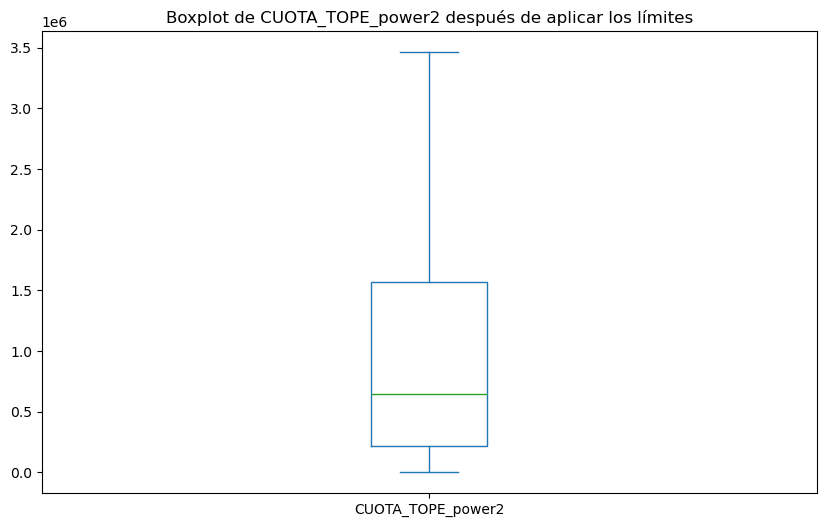

In [13]:
# Graficar el boxplot original de la columna CUOTA_TOPE_power2
plt.figure(figsize=(10, 6))  # Configurar el tamaño de la figura
df['CUOTA_TOPE_power2'].plot.box()
plt.title('Boxplot Original de CUOTA_TOPE_power2')  # Título del gráfico original
plt.show()

# Calcular los percentiles 1 y 90 para CUOTA_TOPE_power2
cotas_CUOTA_TOPE_power2 = np.percentile(df['CUOTA_TOPE_power2'].dropna(), [1, 90])

# Limitar los valores de CUOTA_TOPE_power2 a los percentiles 1 y 90
df.loc[df['CUOTA_TOPE_power2'] >= cotas_CUOTA_TOPE_power2[1], 'CUOTA_TOPE_power2'] = cotas_CUOTA_TOPE_power2[1]
df.loc[df['CUOTA_TOPE_power2'] <= cotas_CUOTA_TOPE_power2[0], 'CUOTA_TOPE_power2'] = cotas_CUOTA_TOPE_power2[0]

# Verificar los nuevos valores mínimo y máximo después de aplicar los límites
print([np.min(df['CUOTA_TOPE_power2']), np.max(df['CUOTA_TOPE_power2'])])

# Graficar el boxplot de CUOTA_TOPE_power2 después de aplicar los límites
plt.figure(figsize=(10, 6))  # Configurar el tamaño de la figura
df['CUOTA_TOPE_power2'].plot.box()
plt.title('Boxplot de CUOTA_TOPE_power2 después de aplicar los límites')  # Título del gráfico modificado
plt.show()

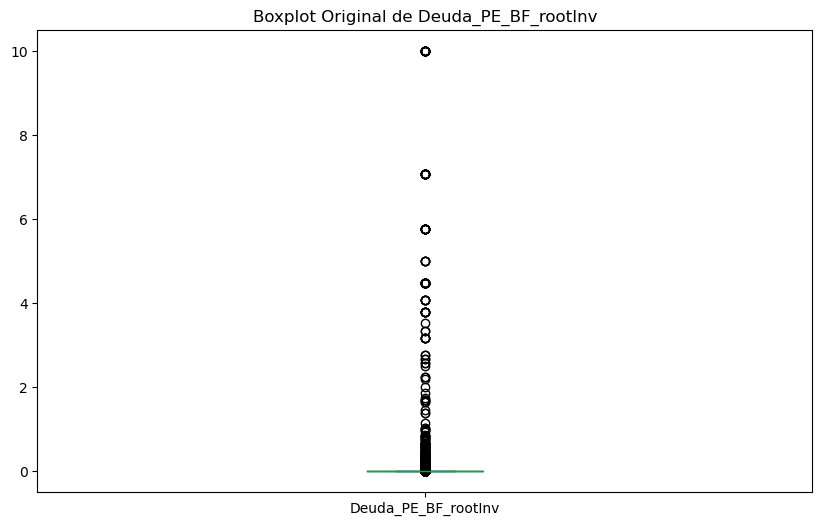

Nuevos valores mínimo y máximo: [0.0, 0.008491927617724824]


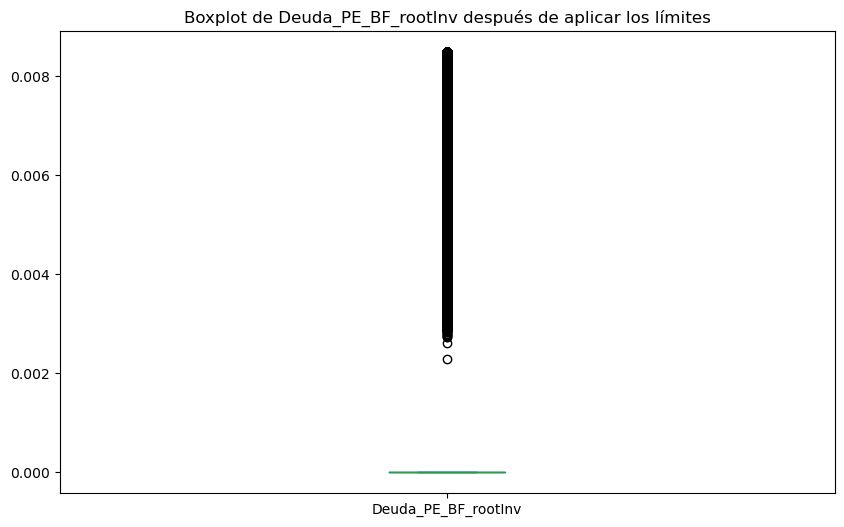

In [15]:
# Graficar el boxplot original de la columna Deuda_PE_BF_rootInv
plt.figure(figsize=(10, 6))  # Configurar el tamaño de la figura
df['Deuda_PE_BF_rootInv'].plot.box()
plt.title('Boxplot Original de Deuda_PE_BF_rootInv')  # Título del gráfico original
plt.show()

# Calcular los percentiles 1 y 90 para Deuda_PE_BF_rootInv
cotas_Deuda_PE_BF_rootInv = np.percentile(df['Deuda_PE_BF_rootInv'].dropna(), [1, 90])

# Limitar los valores de Deuda_PE_BF_rootInv a los percentiles 1 y 90
df.loc[df['Deuda_PE_BF_rootInv'] >= cotas_Deuda_PE_BF_rootInv[1], 'Deuda_PE_BF_rootInv'] = cotas_Deuda_PE_BF_rootInv[1]
df.loc[df['Deuda_PE_BF_rootInv'] <= cotas_Deuda_PE_BF_rootInv[0], 'Deuda_PE_BF_rootInv'] = cotas_Deuda_PE_BF_rootInv[0]

# Verificar los nuevos valores mínimo y máximo después de aplicar los límites
min_max_values = [np.min(df['Deuda_PE_BF_rootInv']), np.max(df['Deuda_PE_BF_rootInv'])]
print("Nuevos valores mínimo y máximo:", min_max_values)

# Graficar el boxplot de Deuda_PE_BF_rootInv después de aplicar los límites
plt.figure(figsize=(10, 6))  # Configurar el tamaño de la figura
df['Deuda_PE_BF_rootInv'].plot.box()
plt.title('Boxplot de Deuda_PE_BF_rootInv después de aplicar los límites')  # Título del gráfico modificado
plt.show()

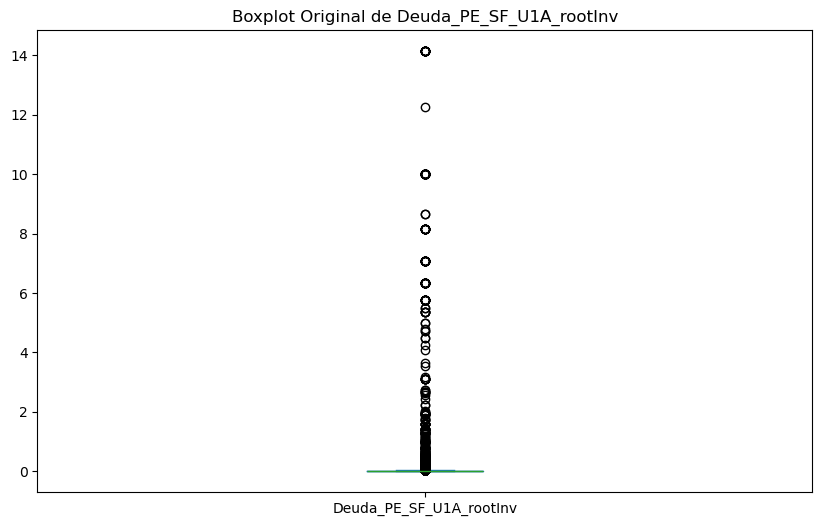

Nuevos valores mínimo y máximo: [0.0, 0.02016549880637404]


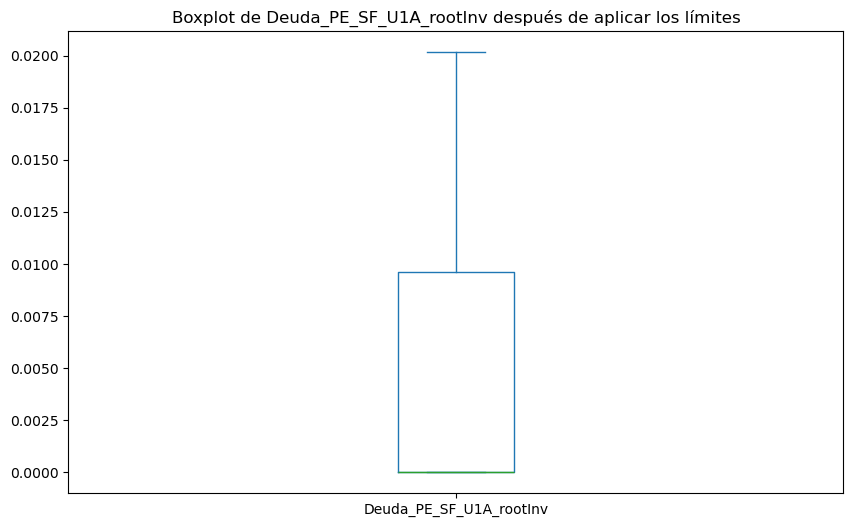

In [17]:
plt.figure(figsize=(10, 6))  # Configurar el tamaño de la figura
df['Deuda_PE_SF_U1A_rootInv'].plot.box()
plt.title('Boxplot Original de Deuda_PE_SF_U1A_rootInv')  # Título del gráfico original
plt.show()

# Calcular los percentiles 1 y 90 para Deuda_PE_SF_U1A_rootInv
cotas_Deuda_PE_SF_U1A_rootInv = np.percentile(df['Deuda_PE_SF_U1A_rootInv'].dropna(), [1, 90])

# Limitar los valores de Deuda_PE_SF_U1A_rootInv a los percentiles 1 y 90
df.loc[df['Deuda_PE_SF_U1A_rootInv'] >= cotas_Deuda_PE_SF_U1A_rootInv[1], 'Deuda_PE_SF_U1A_rootInv'] = cotas_Deuda_PE_SF_U1A_rootInv[1]
df.loc[df['Deuda_PE_SF_U1A_rootInv'] <= cotas_Deuda_PE_SF_U1A_rootInv[0], 'Deuda_PE_SF_U1A_rootInv'] = cotas_Deuda_PE_SF_U1A_rootInv[0]

# Verificar los nuevos valores mínimo y máximo después de aplicar los límites
min_max_values_sf = [np.min(df['Deuda_PE_SF_U1A_rootInv']), np.max(df['Deuda_PE_SF_U1A_rootInv'])]
print("Nuevos valores mínimo y máximo:", min_max_values_sf)

# Graficar el boxplot de Deuda_PE_SF_U1A_rootInv después de aplicar los límites
plt.figure(figsize=(10, 6))  # Configurar el tamaño de la figura
df['Deuda_PE_SF_U1A_rootInv'].plot.box()
plt.title('Boxplot de Deuda_PE_SF_U1A_rootInv después de aplicar los límites')  # Título del gráfico modificado
plt.show()

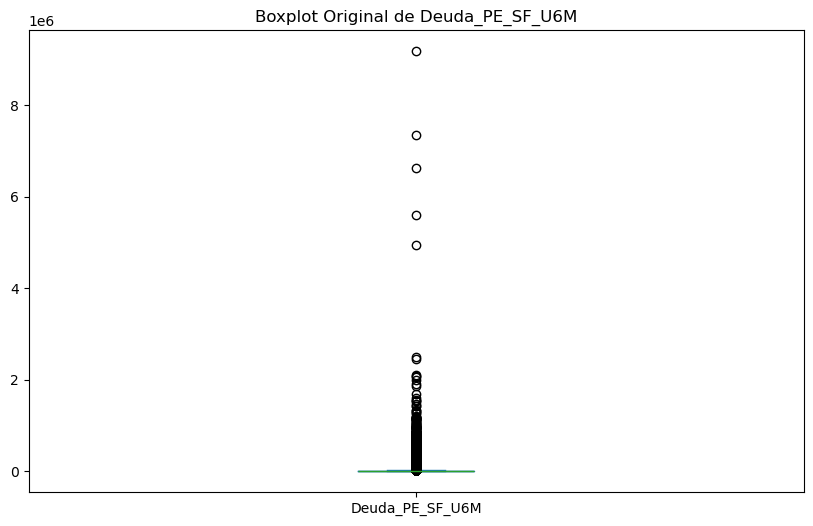

Nuevos valores mínimo y máximo: [0.0, 28109.85683333333]


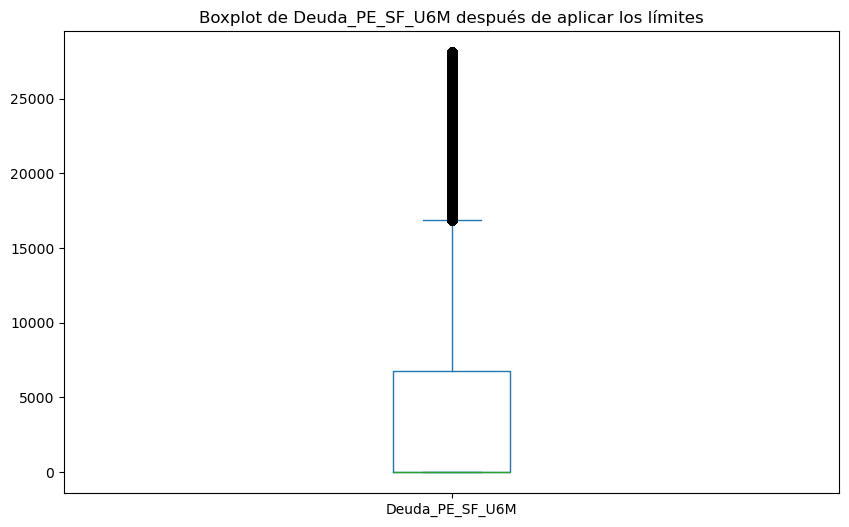

In [19]:
# Graficar el boxplot original de la columna Deuda_PE_SF_U6M
plt.figure(figsize=(10, 6))  # Configurar el tamaño de la figura
df['Deuda_PE_SF_U6M'].plot.box()
plt.title('Boxplot Original de Deuda_PE_SF_U6M')  # Título del gráfico original
plt.show()

# Calcular los percentiles 1 y 90 para Deuda_PE_SF_U6M
cotas_Deuda_PE_SF_U6M = np.percentile(df['Deuda_PE_SF_U6M'].dropna(), [1, 90])

# Limitar los valores de Deuda_PE_SF_U6M a los percentiles 1 y 90
df.loc[df['Deuda_PE_SF_U6M'] >= cotas_Deuda_PE_SF_U6M[1], 'Deuda_PE_SF_U6M'] = cotas_Deuda_PE_SF_U6M[1]
df.loc[df['Deuda_PE_SF_U6M'] <= cotas_Deuda_PE_SF_U6M[0], 'Deuda_PE_SF_U6M'] = cotas_Deuda_PE_SF_U6M[0]

# Verificar los nuevos valores mínimo y máximo después de aplicar los límites
min_max_values_u6m = [np.min(df['Deuda_PE_SF_U6M']), np.max(df['Deuda_PE_SF_U6M'])]
print("Nuevos valores mínimo y máximo:", min_max_values_u6m)

# Graficar el boxplot de Deuda_PE_SF_U6M después de aplicar los límites
plt.figure(figsize=(10, 6))  # Configurar el tamaño de la figura
df['Deuda_PE_SF_U6M'].plot.box()
plt.title('Boxplot de Deuda_PE_SF_U6M después de aplicar los límites')  # Título del gráfico modificado
plt.show()

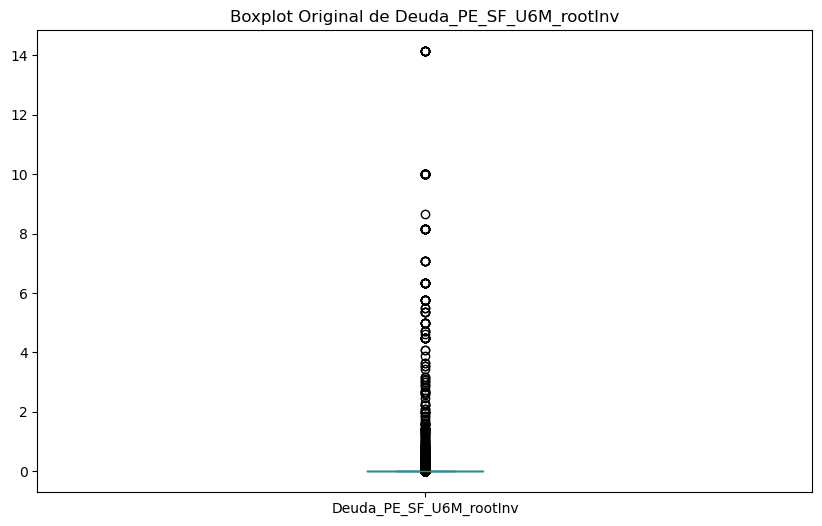

Nuevos valores mínimo y máximo: [0.0, 0.0183564000483235]


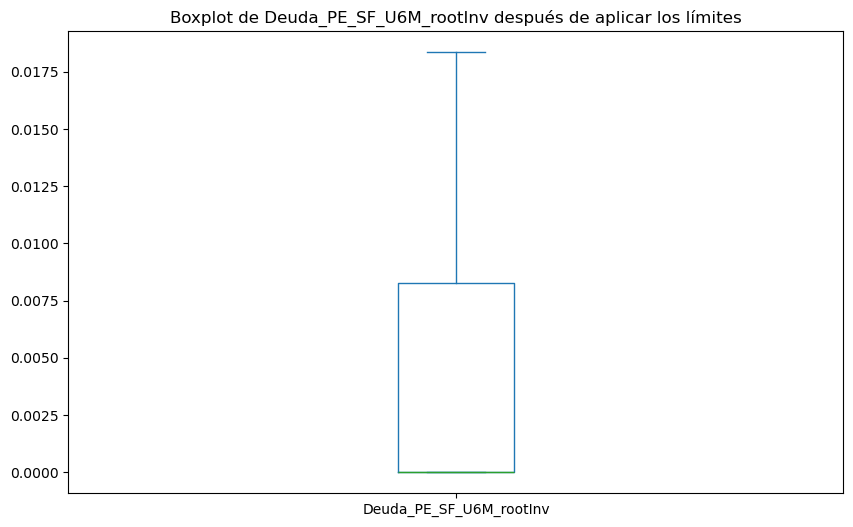

In [21]:
plt.figure(figsize=(10, 6))  # Configurar el tamaño de la figura
df['Deuda_PE_SF_U6M_rootInv'].plot.box()
plt.title('Boxplot Original de Deuda_PE_SF_U6M_rootInv')  # Título del gráfico original
plt.show()

# Calcular los percentiles 1 y 90 para Deuda_PE_SF_U6M_rootInv
cotas_Deuda_PE_SF_U6M_rootInv = np.percentile(df['Deuda_PE_SF_U6M_rootInv'].dropna(), [1, 90])

# Limitar los valores de Deuda_PE_SF_U6M_rootInv a los percentiles 1 y 90
df.loc[df['Deuda_PE_SF_U6M_rootInv'] >= cotas_Deuda_PE_SF_U6M_rootInv[1], 'Deuda_PE_SF_U6M_rootInv'] = cotas_Deuda_PE_SF_U6M_rootInv[1]
df.loc[df['Deuda_PE_SF_U6M_rootInv'] <= cotas_Deuda_PE_SF_U6M_rootInv[0], 'Deuda_PE_SF_U6M_rootInv'] = cotas_Deuda_PE_SF_U6M_rootInv[0]

# Verificar los nuevos valores mínimo y máximo después de aplicar los límites
min_max_values_u6m_rootinv = [np.min(df['Deuda_PE_SF_U6M_rootInv']), np.max(df['Deuda_PE_SF_U6M_rootInv'])]
print("Nuevos valores mínimo y máximo:", min_max_values_u6m_rootinv)

# Graficar el boxplot de Deuda_PE_SF_U6M_rootInv después de aplicar los límites
plt.figure(figsize=(10, 6))  # Configurar el tamaño de la figura
df['Deuda_PE_SF_U6M_rootInv'].plot.box()
plt.title('Boxplot de Deuda_PE_SF_U6M_rootInv después de aplicar los límites')  # Título del gráfico modificado
plt.show()

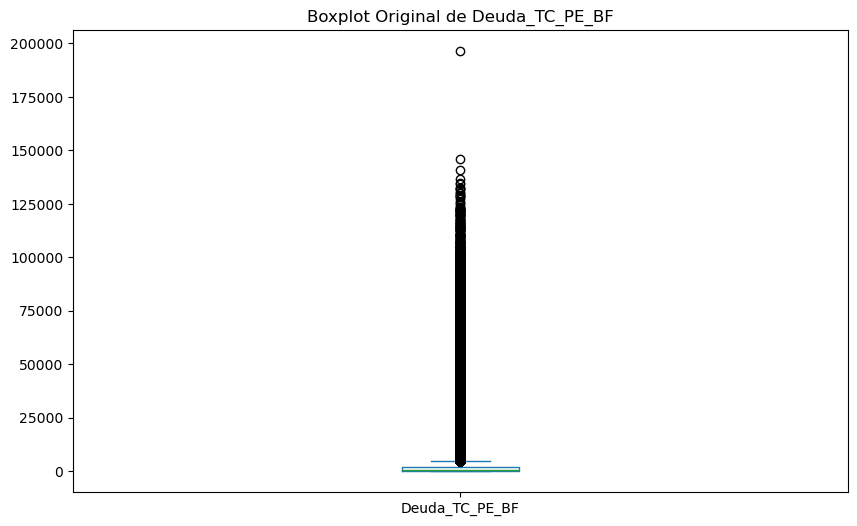

Nuevos valores mínimo y máximo: [0.0, 4450.176999999998]


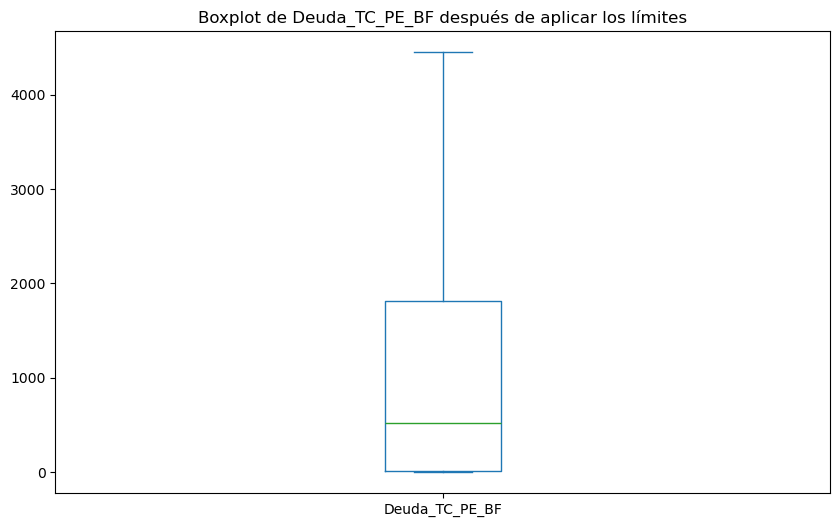

In [23]:
# Graficar el boxplot original de la columna Deuda_TC_PE_BF
plt.figure(figsize=(10, 6))  # Configurar el tamaño de la figura
df['Deuda_TC_PE_BF'].plot.box()
plt.title('Boxplot Original de Deuda_TC_PE_BF')  # Título del gráfico original
plt.show()

# Calcular los percentiles 1 y 90 para Deuda_TC_PE_BF
cotas_Deuda_TC_PE_BF = np.percentile(df['Deuda_TC_PE_BF'].dropna(), [1, 90])

# Limitar los valores de Deuda_TC_PE_BF a los percentiles 1 y 90
df.loc[df['Deuda_TC_PE_BF'] >= cotas_Deuda_TC_PE_BF[1], 'Deuda_TC_PE_BF'] = cotas_Deuda_TC_PE_BF[1]
df.loc[df['Deuda_TC_PE_BF'] <= cotas_Deuda_TC_PE_BF[0], 'Deuda_TC_PE_BF'] = cotas_Deuda_TC_PE_BF[0]

# Verificar los nuevos valores mínimo y máximo después de aplicar los límites
min_max_values_tc_pe_bf = [np.min(df['Deuda_TC_PE_BF']), np.max(df['Deuda_TC_PE_BF'])]
print("Nuevos valores mínimo y máximo:", min_max_values_tc_pe_bf)

# Graficar el boxplot de Deuda_TC_PE_BF después de aplicar los límites
plt.figure(figsize=(10, 6))  # Configurar el tamaño de la figura
df['Deuda_TC_PE_BF'].plot.box()
plt.title('Boxplot de Deuda_TC_PE_BF después de aplicar los límites')  # Título del gráfico modificado
plt.show()

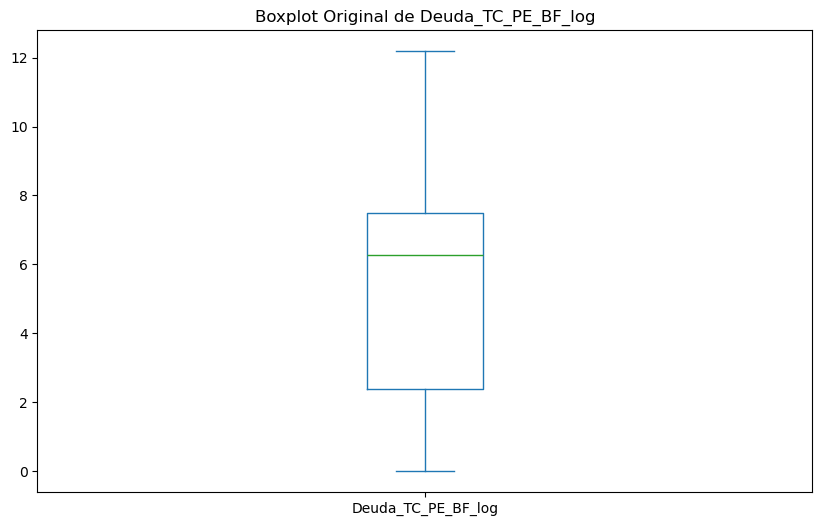

Nuevos valores mínimo y máximo: [0.0, 8.40092]


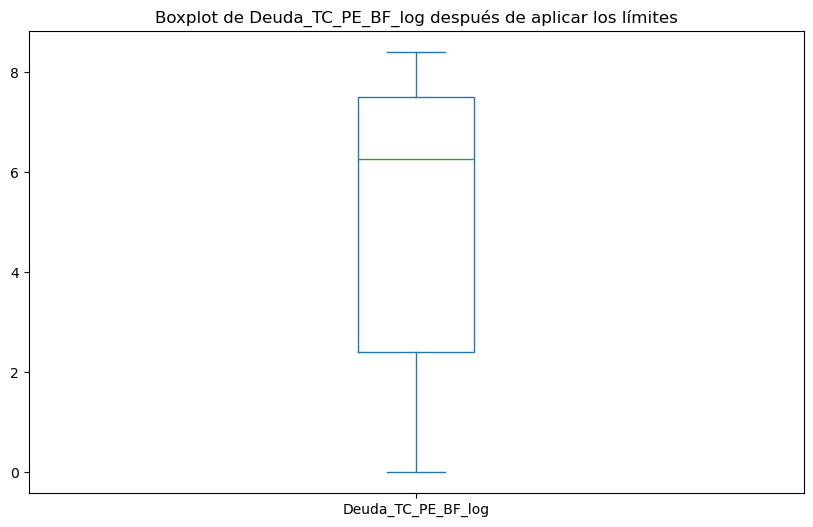

In [25]:
# Graficar el boxplot original de la columna Deuda_TC_PE_BF_log
plt.figure(figsize=(10, 6))  # Configurar el tamaño de la figura
df['Deuda_TC_PE_BF_log'].plot.box()
plt.title('Boxplot Original de Deuda_TC_PE_BF_log')  # Título del gráfico original
plt.show()

# Calcular los percentiles 1 y 90 para Deuda_TC_PE_BF_log
cotas_Deuda_TC_PE_BF_log = np.percentile(df['Deuda_TC_PE_BF_log'].dropna(), [1, 90])

# Limitar los valores de Deuda_TC_PE_BF_log a los percentiles 1 y 90
df.loc[df['Deuda_TC_PE_BF_log'] >= cotas_Deuda_TC_PE_BF_log[1], 'Deuda_TC_PE_BF_log'] = cotas_Deuda_TC_PE_BF_log[1]
df.loc[df['Deuda_TC_PE_BF_log'] <= cotas_Deuda_TC_PE_BF_log[0], 'Deuda_TC_PE_BF_log'] = cotas_Deuda_TC_PE_BF_log[0]

# Verificar los nuevos valores mínimo y máximo después de aplicar los límites
min_max_values_tc_pe_bf_log = [np.min(df['Deuda_TC_PE_BF_log']), np.max(df['Deuda_TC_PE_BF_log'])]
print("Nuevos valores mínimo y máximo:", min_max_values_tc_pe_bf_log)

# Graficar el boxplot de Deuda_TC_PE_BF_log después de aplicar los límites
plt.figure(figsize=(10, 6))  # Configurar el tamaño de la figura
df['Deuda_TC_PE_BF_log'].plot.box()
plt.title('Boxplot de Deuda_TC_PE_BF_log después de aplicar los límites')  # Título del gráfico modificado
plt.show()

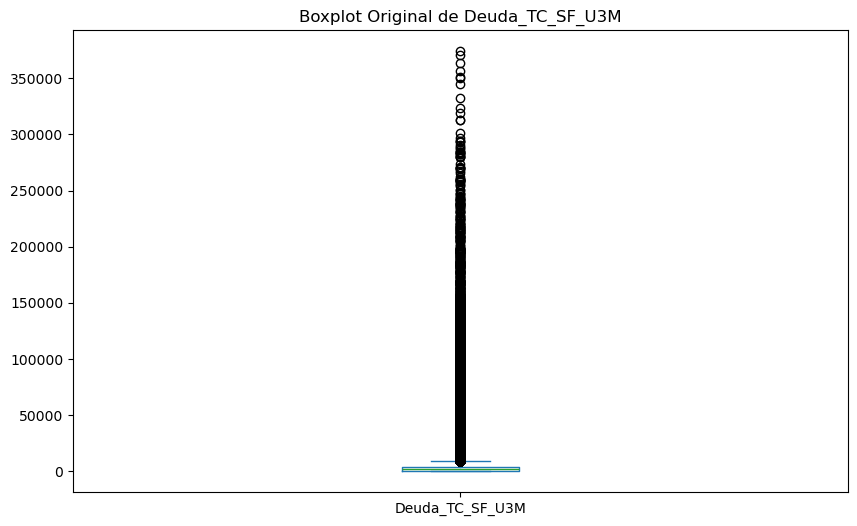

Nuevos valores mínimo y máximo: [0.0, 8529.34233333333]


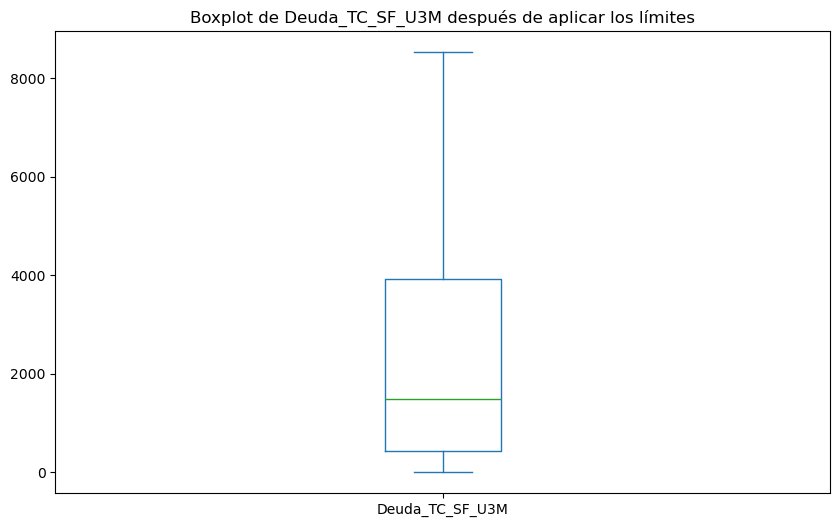

In [27]:
# Graficar el boxplot original de la columna Deuda_TC_SF_U3M
plt.figure(figsize=(10, 6))  # Configurar el tamaño de la figura
df['Deuda_TC_SF_U3M'].plot.box()
plt.title('Boxplot Original de Deuda_TC_SF_U3M')  # Título del gráfico original
plt.show()

# Calcular los percentiles 1 y 90 para Deuda_TC_SF_U3M
cotas_Deuda_TC_SF_U3M = np.percentile(df['Deuda_TC_SF_U3M'].dropna(), [1, 90])

# Limitar los valores de Deuda_TC_SF_U3M a los percentiles 1 y 90
df.loc[df['Deuda_TC_SF_U3M'] >= cotas_Deuda_TC_SF_U3M[1], 'Deuda_TC_SF_U3M'] = cotas_Deuda_TC_SF_U3M[1]
df.loc[df['Deuda_TC_SF_U3M'] <= cotas_Deuda_TC_SF_U3M[0], 'Deuda_TC_SF_U3M'] = cotas_Deuda_TC_SF_U3M[0]

# Verificar los nuevos valores mínimo y máximo después de aplicar los límites
min_max_values_tc_sf_u3m = [np.min(df['Deuda_TC_SF_U3M']), np.max(df['Deuda_TC_SF_U3M'])]
print("Nuevos valores mínimo y máximo:", min_max_values_tc_sf_u3m)

# Graficar el boxplot de Deuda_TC_SF_U3M después de aplicar los límites
plt.figure(figsize=(10, 6))  # Configurar el tamaño de la figura
df['Deuda_TC_SF_U3M'].plot.box()
plt.title('Boxplot de Deuda_TC_SF_U3M después de aplicar los límites')  # Título del gráfico modificado
plt.show()

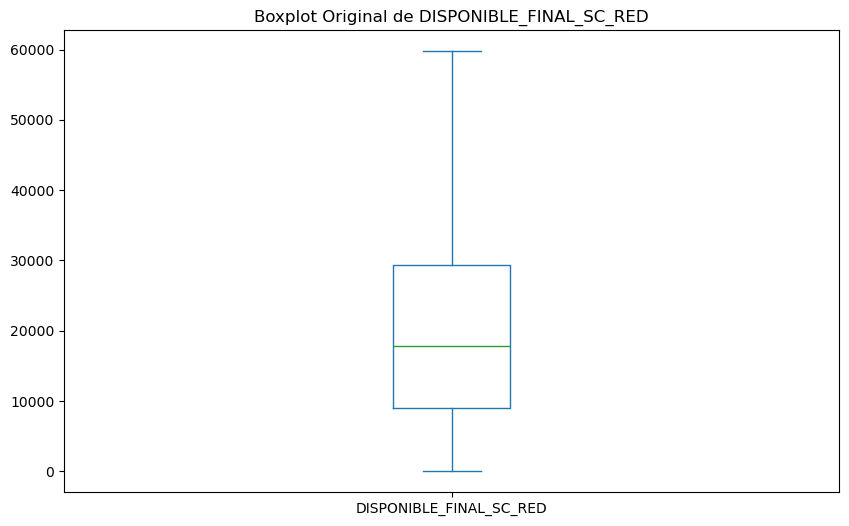

Nuevos valores mínimo y máximo: [0.0, 44700.0]


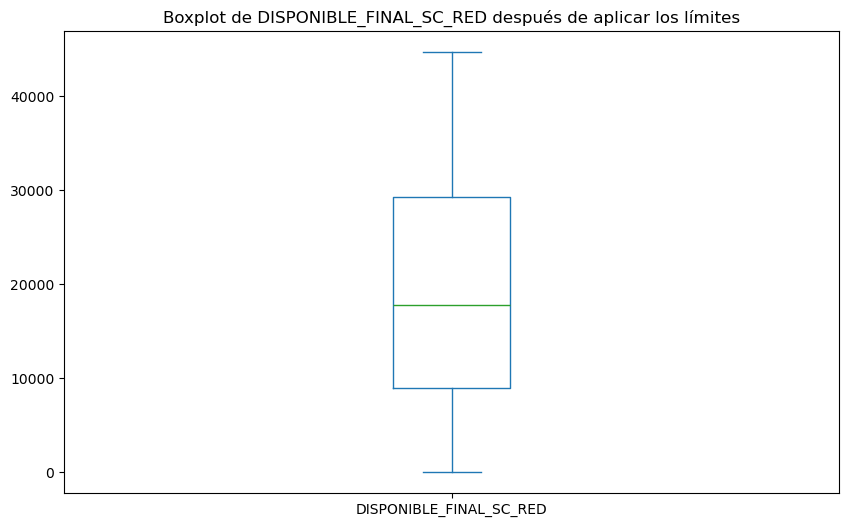

In [29]:
# Graficar el boxplot original de la columna DISPONIBLE_FINAL_SC_RED
plt.figure(figsize=(10, 6))  # Configurar el tamaño de la figura
df['DISPONIBLE_FINAL_SC_RED'].plot.box()
plt.title('Boxplot Original de DISPONIBLE_FINAL_SC_RED')  # Título del gráfico original
plt.show()

# Calcular los percentiles 1 y 90 para DISPONIBLE_FINAL_SC_RED
cotas_DISPONIBLE_FINAL_SC_RED = np.percentile(df['DISPONIBLE_FINAL_SC_RED'].dropna(), [1, 90])

# Limitar los valores de DISPONIBLE_FINAL_SC_RED a los percentiles 1 y 90
df.loc[df['DISPONIBLE_FINAL_SC_RED'] >= cotas_DISPONIBLE_FINAL_SC_RED[1], 'DISPONIBLE_FINAL_SC_RED'] = cotas_DISPONIBLE_FINAL_SC_RED[1]
df.loc[df['DISPONIBLE_FINAL_SC_RED'] <= cotas_DISPONIBLE_FINAL_SC_RED[0], 'DISPONIBLE_FINAL_SC_RED'] = cotas_DISPONIBLE_FINAL_SC_RED[0]

# Verificar los nuevos valores mínimo y máximo después de aplicar los límites
min_max_values_disponible_final = [np.min(df['DISPONIBLE_FINAL_SC_RED']), np.max(df['DISPONIBLE_FINAL_SC_RED'])]
print("Nuevos valores mínimo y máximo:", min_max_values_disponible_final)

# Graficar el boxplot de DISPONIBLE_FINAL_SC_RED después de aplicar los límites
plt.figure(figsize=(10, 6))  # Configurar el tamaño de la figura
df['DISPONIBLE_FINAL_SC_RED'].plot.box()
plt.title('Boxplot de DISPONIBLE_FINAL_SC_RED después de aplicar los límites')  # Título del gráfico modificado
plt.show()

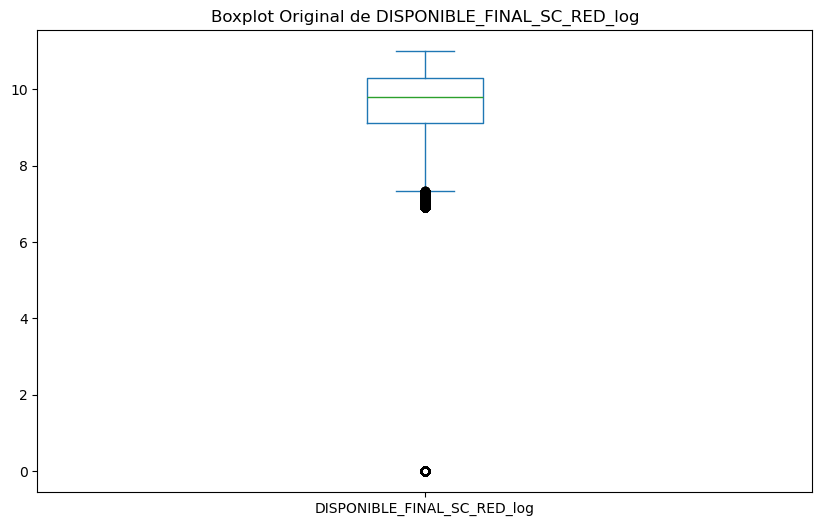

Nuevos valores mínimo y máximo: [0.0, 10.70775]


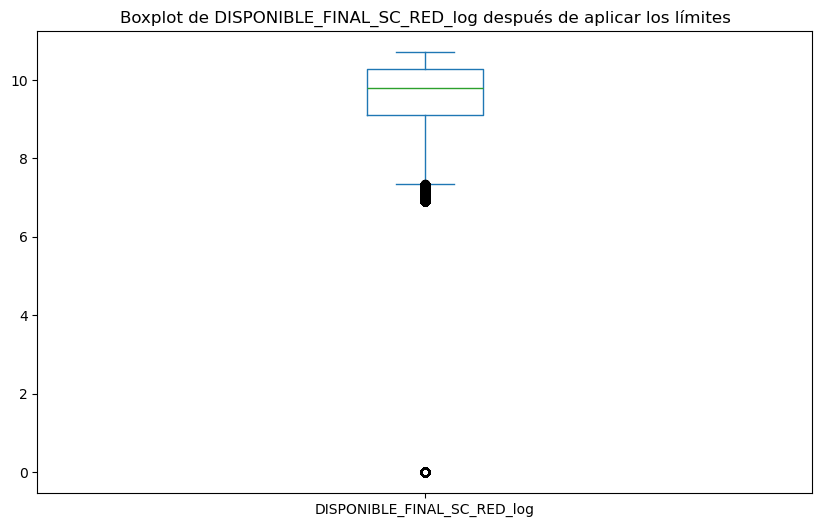

In [31]:
# Graficar el boxplot original de la columna DISPONIBLE_FINAL_SC_RED_log
plt.figure(figsize=(10, 6))  # Configurar el tamaño de la figura
df['DISPONIBLE_FINAL_SC_RED_log'].plot.box()
plt.title('Boxplot Original de DISPONIBLE_FINAL_SC_RED_log')  # Título del gráfico original
plt.show()

# Calcular los percentiles 1 y 90 para DISPONIBLE_FINAL_SC_RED_log
cotas_DISPONIBLE_FINAL_SC_RED_log = np.percentile(df['DISPONIBLE_FINAL_SC_RED_log'].dropna(), [1, 90])

# Limitar los valores de DISPONIBLE_FINAL_SC_RED_log a los percentiles 1 y 90
df.loc[df['DISPONIBLE_FINAL_SC_RED_log'] >= cotas_DISPONIBLE_FINAL_SC_RED_log[1], 'DISPONIBLE_FINAL_SC_RED_log'] = cotas_DISPONIBLE_FINAL_SC_RED_log[1]
df.loc[df['DISPONIBLE_FINAL_SC_RED_log'] <= cotas_DISPONIBLE_FINAL_SC_RED_log[0], 'DISPONIBLE_FINAL_SC_RED_log'] = cotas_DISPONIBLE_FINAL_SC_RED_log[0]

# Verificar los nuevos valores mínimo y máximo después de aplicar los límites
min_max_values_disponible_final_log = [np.min(df['DISPONIBLE_FINAL_SC_RED_log']), np.max(df['DISPONIBLE_FINAL_SC_RED_log'])]
print("Nuevos valores mínimo y máximo:", min_max_values_disponible_final_log)

# Graficar el boxplot de DISPONIBLE_FINAL_SC_RED_log después de aplicar los límites
plt.figure(figsize=(10, 6))  # Configurar el tamaño de la figura
df['DISPONIBLE_FINAL_SC_RED_log'].plot.box()
plt.title('Boxplot de DISPONIBLE_FINAL_SC_RED_log después de aplicar los límites')  # Título del gráfico modificado
plt.show()

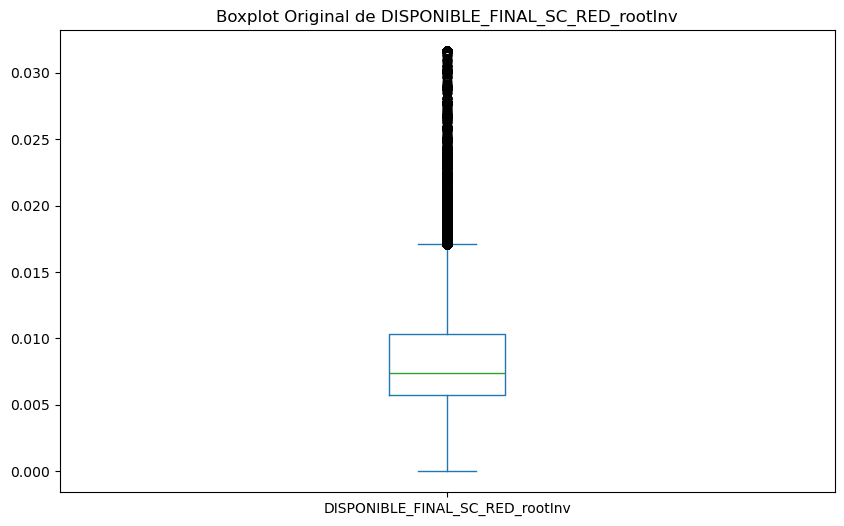

Nuevos valores mínimo y máximo: [0.0, 0.0154303349962091]


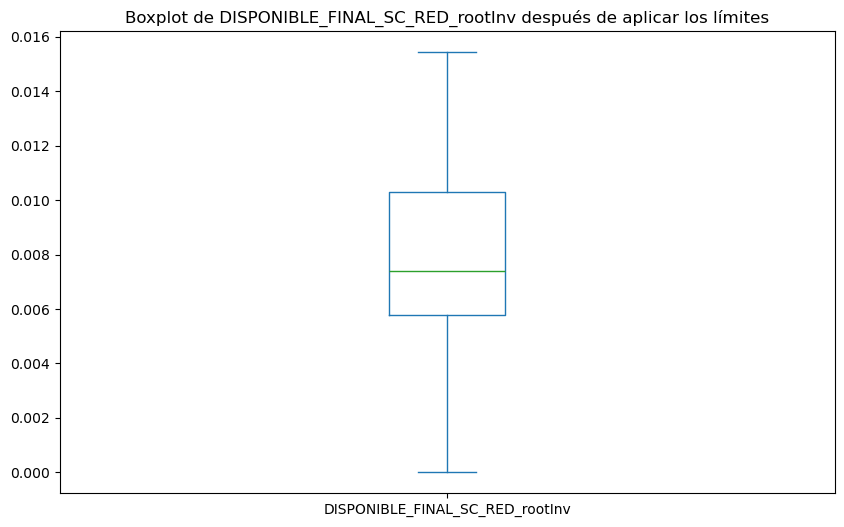

In [33]:
# Graficar el boxplot original de la columna DISPONIBLE_FINAL_SC_RED_rootInv
plt.figure(figsize=(10, 6))  # Configurar el tamaño de la figura
df['DISPONIBLE_FINAL_SC_RED_rootInv'].plot.box()
plt.title('Boxplot Original de DISPONIBLE_FINAL_SC_RED_rootInv')  # Título del gráfico original
plt.show()

# Calcular los percentiles 1 y 90 para DISPONIBLE_FINAL_SC_RED_rootInv
cotas_DISPONIBLE_FINAL_SC_RED_rootInv = np.percentile(df['DISPONIBLE_FINAL_SC_RED_rootInv'].dropna(), [1, 90])

# Limitar los valores de DISPONIBLE_FINAL_SC_RED_rootInv a los percentiles 1 y 90
df.loc[df['DISPONIBLE_FINAL_SC_RED_rootInv'] >= cotas_DISPONIBLE_FINAL_SC_RED_rootInv[1], 'DISPONIBLE_FINAL_SC_RED_rootInv'] = cotas_DISPONIBLE_FINAL_SC_RED_rootInv[1]
df.loc[df['DISPONIBLE_FINAL_SC_RED_rootInv'] <= cotas_DISPONIBLE_FINAL_SC_RED_rootInv[0], 'DISPONIBLE_FINAL_SC_RED_rootInv'] = cotas_DISPONIBLE_FINAL_SC_RED_rootInv[0]

# Verificar los nuevos valores mínimo y máximo después de aplicar los límites
min_max_values_disponible_final_rootinv = [np.min(df['DISPONIBLE_FINAL_SC_RED_rootInv']), np.max(df['DISPONIBLE_FINAL_SC_RED_rootInv'])]
print("Nuevos valores mínimo y máximo:", min_max_values_disponible_final_rootinv)

# Graficar el boxplot de DISPONIBLE_FINAL_SC_RED_rootInv después de aplicar los límites
plt.figure(figsize=(10, 6))  # Configurar el tamaño de la figura
df['DISPONIBLE_FINAL_SC_RED_rootInv'].plot.box()
plt.title('Boxplot de DISPONIBLE_FINAL_SC_RED_rootInv después de aplicar los límites')  # Título del gráfico modificado
plt.show()

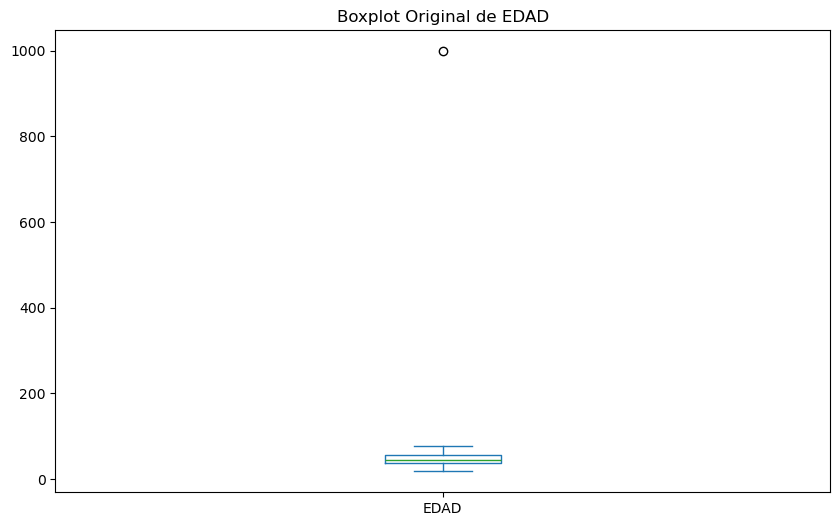

Nuevos valores mínimo y máximo: [26, 64]


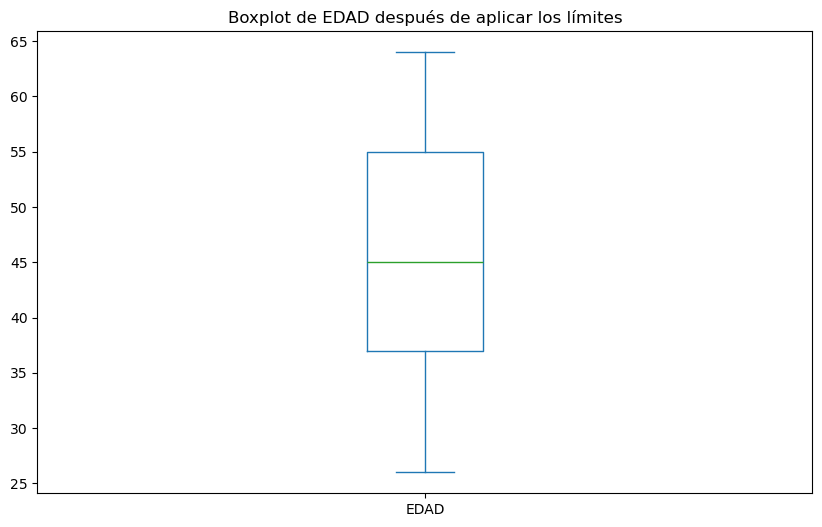

In [35]:
# Graficar el boxplot original de la columna EDAD
plt.figure(figsize=(10, 6))  # Configurar el tamaño de la figura
df['EDAD'].plot.box()
plt.title('Boxplot Original de EDAD')  # Título del gráfico original
plt.show()

# Calcular los percentiles 1 y 90 para EDAD
cotas_EDAD = np.percentile(df['EDAD'].dropna(), [1, 90])

# Limitar los valores de EDAD a los percentiles 1 y 90
df.loc[df['EDAD'] >= cotas_EDAD[1], 'EDAD'] = cotas_EDAD[1]
df.loc[df['EDAD'] <= cotas_EDAD[0], 'EDAD'] = cotas_EDAD[0]

# Verificar los nuevos valores mínimo y máximo después de aplicar los límites
min_max_values_edad = [np.min(df['EDAD']), np.max(df['EDAD'])]
print("Nuevos valores mínimo y máximo:", min_max_values_edad)

# Graficar el boxplot de EDAD después de aplicar los límites
plt.figure(figsize=(10, 6))  # Configurar el tamaño de la figura
df['EDAD'].plot.box()
plt.title('Boxplot de EDAD después de aplicar los límites')  # Título del gráfico modificado
plt.show()

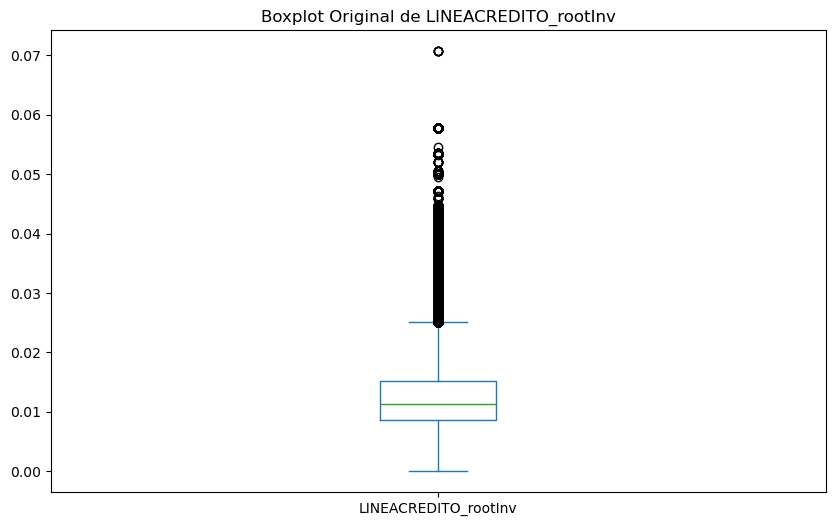

Nuevos valores mínimo y máximo: [0.0061084722178152, 0.021320071635561]


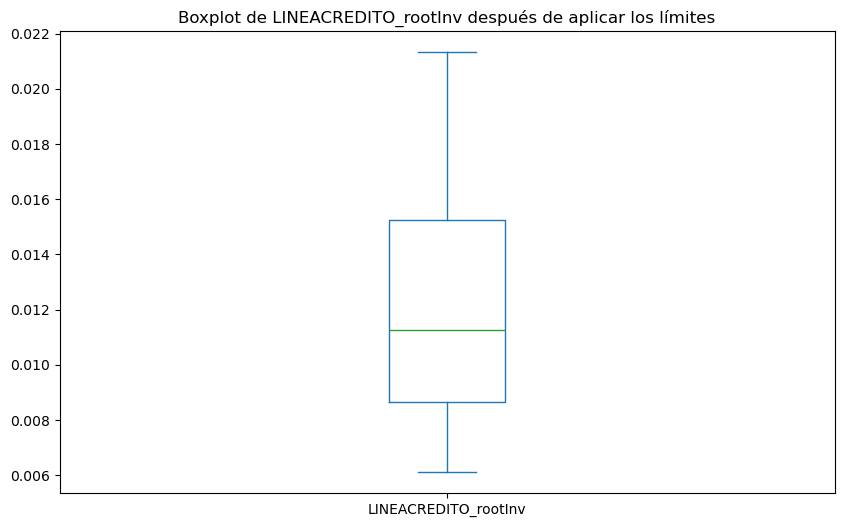

In [37]:
# Graficar el boxplot original de la columna LINEACREDITO_rootInv
plt.figure(figsize=(10, 6))  # Configurar el tamaño de la figura
df['LINEACREDITO_rootInv'].plot.box()
plt.title('Boxplot Original de LINEACREDITO_rootInv')  # Título del gráfico original
plt.show()

# Calcular los percentiles 1 y 90 para LINEACREDITO_rootInv
cotas_LINEACREDITO_rootInv = np.percentile(df['LINEACREDITO_rootInv'].dropna(), [1, 90])

# Limitar los valores de LINEACREDITO_rootInv a los percentiles 1 y 90
df.loc[df['LINEACREDITO_rootInv'] >= cotas_LINEACREDITO_rootInv[1], 'LINEACREDITO_rootInv'] = cotas_LINEACREDITO_rootInv[1]
df.loc[df['LINEACREDITO_rootInv'] <= cotas_LINEACREDITO_rootInv[0], 'LINEACREDITO_rootInv'] = cotas_LINEACREDITO_rootInv[0]

# Verificar los nuevos valores mínimo y máximo después de aplicar los límites
min_max_values_lineacredito_rootinv = [np.min(df['LINEACREDITO_rootInv']), np.max(df['LINEACREDITO_rootInv'])]
print("Nuevos valores mínimo y máximo:", min_max_values_lineacredito_rootinv)

# Graficar el boxplot de LINEACREDITO_rootInv después de aplicar los límites
plt.figure(figsize=(10, 6))  # Configurar el tamaño de la figura
df['LINEACREDITO_rootInv'].plot.box()
plt.title('Boxplot de LINEACREDITO_rootInv después de aplicar los límites')  # Título del gráfico modificado
plt.show()

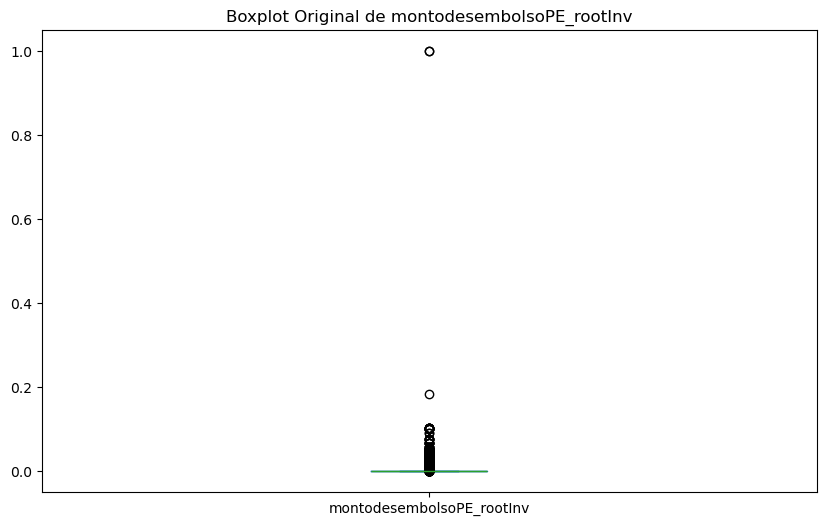

Nuevos valores mínimo y máximo: [0.0, 0.0111803398874989]


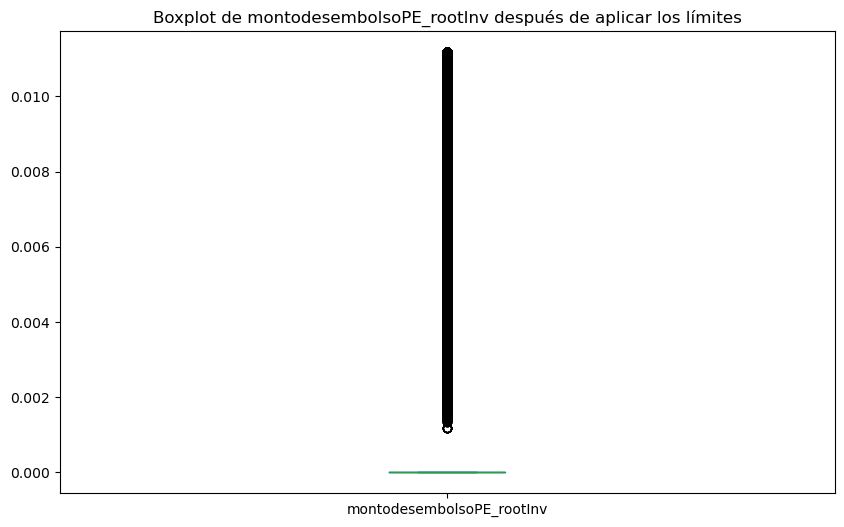

In [39]:
# Graficar el boxplot original de la columna montodesembolsoPE_rootInv
plt.figure(figsize=(10, 6))  # Configurar el tamaño de la figura
df['montodesembolsoPE_rootInv'].plot.box()
plt.title('Boxplot Original de montodesembolsoPE_rootInv')  # Título del gráfico original
plt.show()

# Calcular los percentiles 1 y 90 para montodesembolsoPE_rootInv
cotas_montodesembolsoPE_rootInv = np.percentile(df['montodesembolsoPE_rootInv'].dropna(), [1, 90])

# Limitar los valores de montodesembolsoPE_rootInv a los percentiles 1 y 90
df.loc[df['montodesembolsoPE_rootInv'] >= cotas_montodesembolsoPE_rootInv[1], 'montodesembolsoPE_rootInv'] = cotas_montodesembolsoPE_rootInv[1]
df.loc[df['montodesembolsoPE_rootInv'] <= cotas_montodesembolsoPE_rootInv[0], 'montodesembolsoPE_rootInv'] = cotas_montodesembolsoPE_rootInv[0]

# Verificar los nuevos valores mínimo y máximo después de aplicar los límites
min_max_values_montodesembolso_rootinv = [np.min(df['montodesembolsoPE_rootInv']), np.max(df['montodesembolsoPE_rootInv'])]
print("Nuevos valores mínimo y máximo:", min_max_values_montodesembolso_rootinv)

# Graficar el boxplot de montodesembolsoPE_rootInv después de aplicar los límites
plt.figure(figsize=(10, 6))  # Configurar el tamaño de la figura
df['montodesembolsoPE_rootInv'].plot.box()
plt.title('Boxplot de montodesembolsoPE_rootInv después de aplicar los límites')  # Título del gráfico modificado
plt.show()

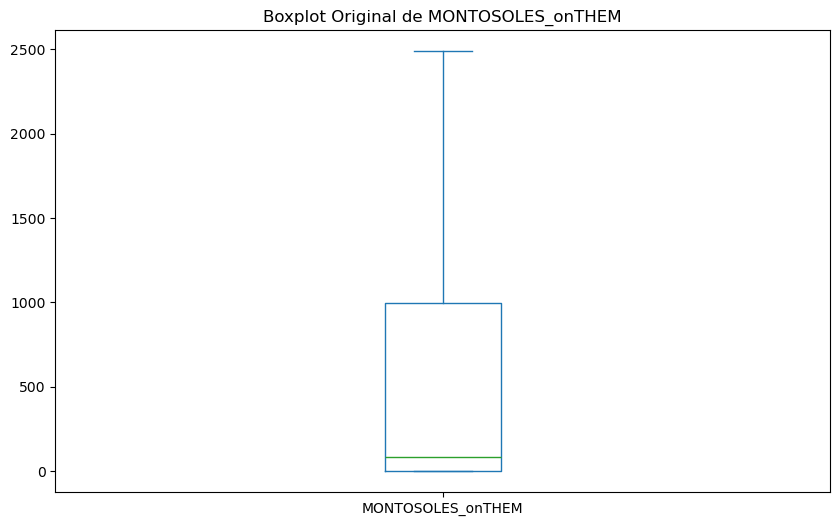

Nuevos valores mínimo y máximo: [0.0, 2487.05]


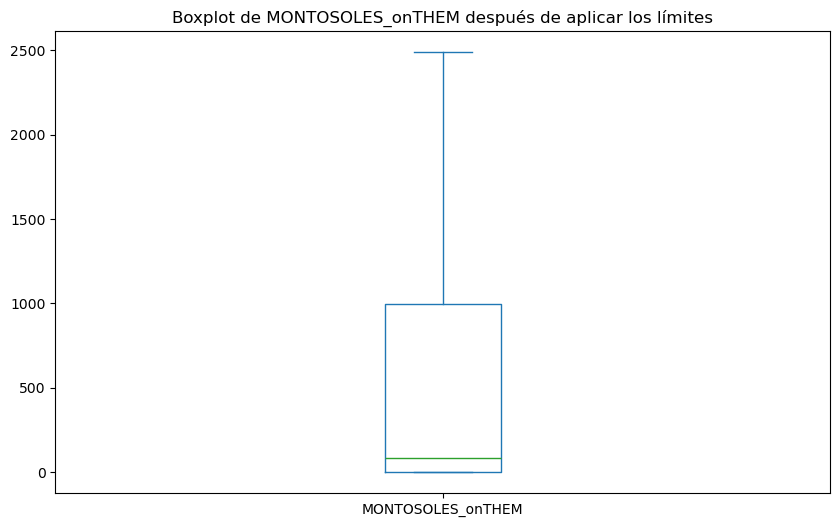

In [41]:
# Graficar el boxplot original de la columna MONTOSOLES_onTHEM
plt.figure(figsize=(10, 6))  # Configurar el tamaño de la figura
df['MONTOSOLES_onTHEM'].plot.box()
plt.title('Boxplot Original de MONTOSOLES_onTHEM')  # Título del gráfico original
plt.show()

# Calcular los percentiles 1 y 90 para MONTOSOLES_onTHEM
cotas_MONTOSOLES_onTHEM = np.percentile(df['MONTOSOLES_onTHEM'].dropna(), [1, 90])

# Limitar los valores de MONTOSOLES_onTHEM a los percentiles 1 y 90
df.loc[df['MONTOSOLES_onTHEM'] >= cotas_MONTOSOLES_onTHEM[1], 'MONTOSOLES_onTHEM'] = cotas_MONTOSOLES_onTHEM[1]
df.loc[df['MONTOSOLES_onTHEM'] <= cotas_MONTOSOLES_onTHEM[0], 'MONTOSOLES_onTHEM'] = cotas_MONTOSOLES_onTHEM[0]

# Verificar los nuevos valores mínimo y máximo después de aplicar los límites
min_max_values_montosoles_onTHEM = [np.min(df['MONTOSOLES_onTHEM']), np.max(df['MONTOSOLES_onTHEM'])]
print("Nuevos valores mínimo y máximo:", min_max_values_montosoles_onTHEM)

# Graficar el boxplot de MONTOSOLES_onTHEM después de aplicar los límites
plt.figure(figsize=(10, 6))  # Configurar el tamaño de la figura
df['MONTOSOLES_onTHEM'].plot.box()
plt.title('Boxplot de MONTOSOLES_onTHEM después de aplicar los límites')  # Título del gráfico modificado
plt.show()

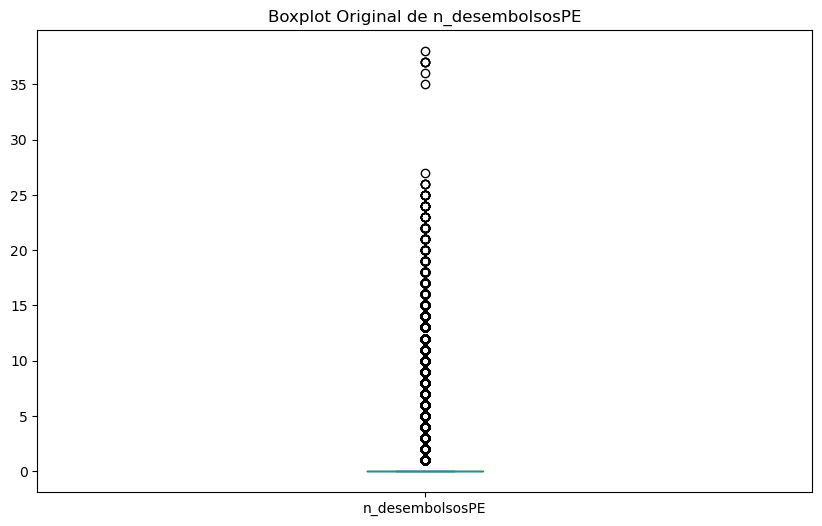

Nuevos valores mínimo y máximo: [0, 1]


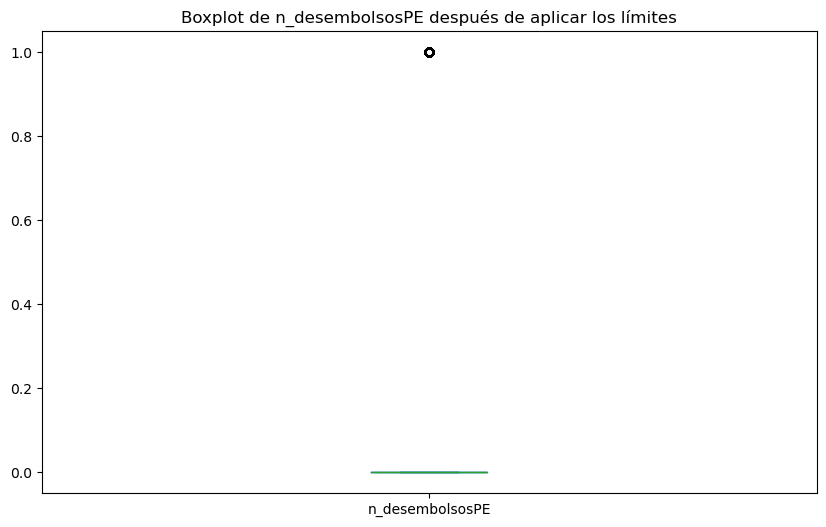

In [43]:
# Graficar el boxplot original de la columna n_desembolsosPE
plt.figure(figsize=(10, 6))  # Configurar el tamaño de la figura
df['n_desembolsosPE'].plot.box()
plt.title('Boxplot Original de n_desembolsosPE')  # Título del gráfico original
plt.show()

# Calcular los percentiles 1 y 90 para n_desembolsosPE
cotas_n_desembolsosPE = np.percentile(df['n_desembolsosPE'].dropna(), [1, 90])

# Limitar los valores de n_desembolsosPE a los percentiles 1 y 90
df.loc[df['n_desembolsosPE'] >= cotas_n_desembolsosPE[1], 'n_desembolsosPE'] = cotas_n_desembolsosPE[1]
df.loc[df['n_desembolsosPE'] <= cotas_n_desembolsosPE[0], 'n_desembolsosPE'] = cotas_n_desembolsosPE[0]

# Verificar los nuevos valores mínimo y máximo después de aplicar los límites
min_max_values_n_desembolsosPE = [np.min(df['n_desembolsosPE']), np.max(df['n_desembolsosPE'])]
print("Nuevos valores mínimo y máximo:", min_max_values_n_desembolsosPE)

# Graficar el boxplot de n_desembolsosPE después de aplicar los límites
plt.figure(figsize=(10, 6))  # Configurar el tamaño de la figura
df['n_desembolsosPE'].plot.box()
plt.title('Boxplot de n_desembolsosPE después de aplicar los límites')  # Título del gráfico modificado
plt.show()

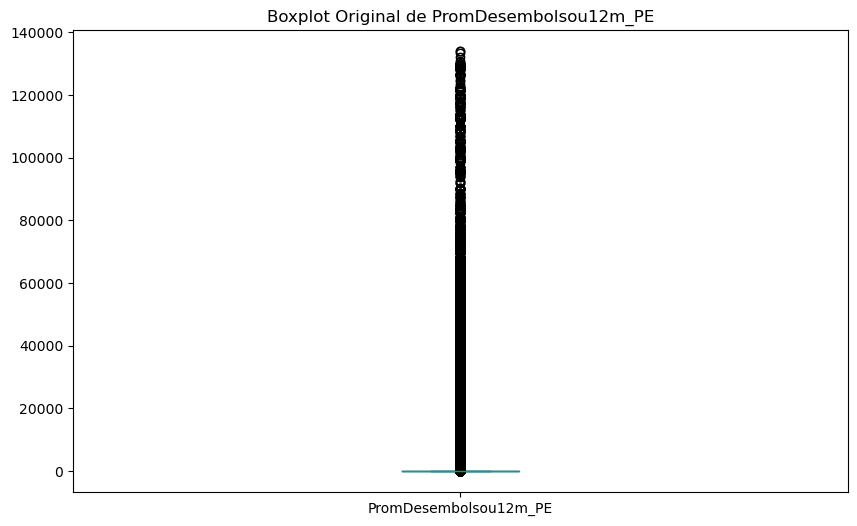

Nuevos valores mínimo y máximo: [0.0, 600.0]


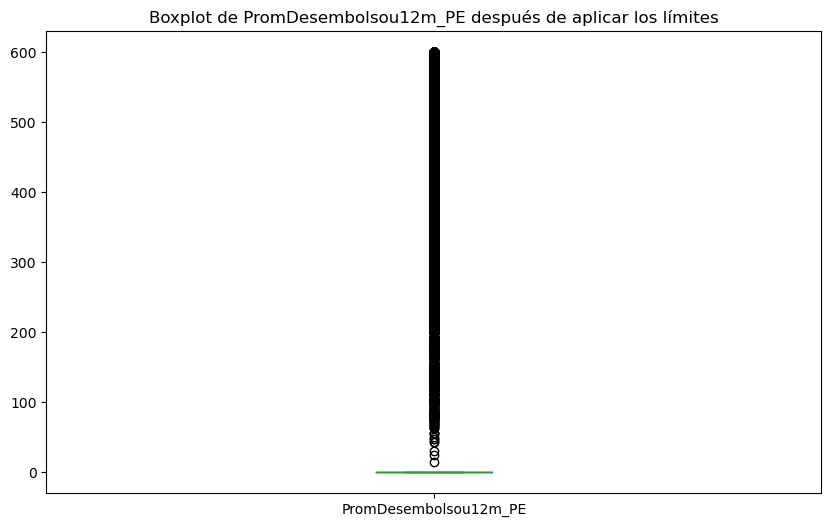

In [45]:
# Graficar el boxplot original de la columna PromDesembolsou12m_PE
plt.figure(figsize=(10, 6))  # Configurar el tamaño de la figura
df['PromDesembolsou12m_PE'].plot.box()
plt.title('Boxplot Original de PromDesembolsou12m_PE')  # Título del gráfico original
plt.show()

# Calcular los percentiles 1 y 90 para PromDesembolsou12m_PE
cotas_PromDesembolsou12m_PE = np.percentile(df['PromDesembolsou12m_PE'].dropna(), [1, 90])

# Limitar los valores de PromDesembolsou12m_PE a los percentiles 1 y 90
df.loc[df['PromDesembolsou12m_PE'] >= cotas_PromDesembolsou12m_PE[1], 'PromDesembolsou12m_PE'] = cotas_PromDesembolsou12m_PE[1]
df.loc[df['PromDesembolsou12m_PE'] <= cotas_PromDesembolsou12m_PE[0], 'PromDesembolsou12m_PE'] = cotas_PromDesembolsou12m_PE[0]

# Verificar los nuevos valores mínimo y máximo después de aplicar los límites
min_max_values_promdesembolsou12m_PE = [np.min(df['PromDesembolsou12m_PE']), np.max(df['PromDesembolsou12m_PE'])]
print("Nuevos valores mínimo y máximo:", min_max_values_promdesembolsou12m_PE)

# Graficar el boxplot de PromDesembolsou12m_PE después de aplicar los límites
plt.figure(figsize=(10, 6))  # Configurar el tamaño de la figura
df['PromDesembolsou12m_PE'].plot.box()
plt.title('Boxplot de PromDesembolsou12m_PE después de aplicar los límites')  # Título del gráfico modificado
plt.show()

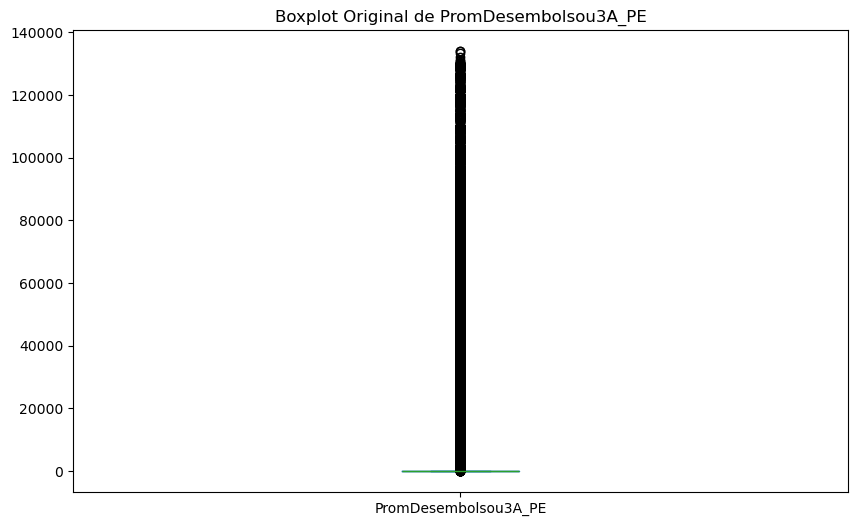

Nuevos valores mínimo y máximo: [0.0, 5222.838094399982]


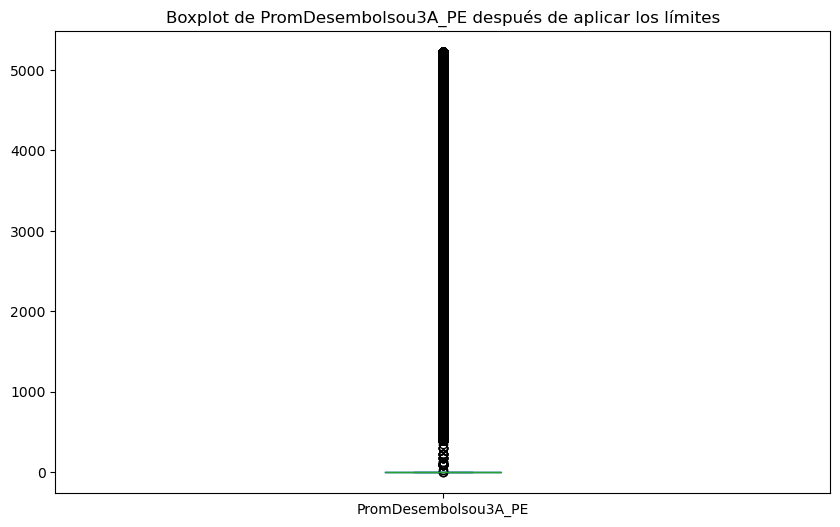

In [47]:
# Graficar el boxplot original de la columna PromDesembolsou3A_PE
plt.figure(figsize=(10, 6))  # Configurar el tamaño de la figura
df['PromDesembolsou3A_PE'].plot.box()
plt.title('Boxplot Original de PromDesembolsou3A_PE')  # Título del gráfico original
plt.show()

# Calcular los percentiles 1 y 90 para PromDesembolsou3A_PE
cotas_PromDesembolsou3A_PE = np.percentile(df['PromDesembolsou3A_PE'].dropna(), [1, 90])

# Limitar los valores de PromDesembolsou3A_PE a los percentiles 1 y 90
df.loc[df['PromDesembolsou3A_PE'] >= cotas_PromDesembolsou3A_PE[1], 'PromDesembolsou3A_PE'] = cotas_PromDesembolsou3A_PE[1]
df.loc[df['PromDesembolsou3A_PE'] <= cotas_PromDesembolsou3A_PE[0], 'PromDesembolsou3A_PE'] = cotas_PromDesembolsou3A_PE[0]

# Verificar los nuevos valores mínimo y máximo después de aplicar los límites
min_max_values_promdesembolsou3A_PE = [np.min(df['PromDesembolsou3A_PE']), np.max(df['PromDesembolsou3A_PE'])]
print("Nuevos valores mínimo y máximo:", min_max_values_promdesembolsou3A_PE)

# Graficar el boxplot de PromDesembolsou3A_PE después de aplicar los límites
plt.figure(figsize=(10, 6))  # Configurar el tamaño de la figura
df['PromDesembolsou3A_PE'].plot.box()
plt.title('Boxplot de PromDesembolsou3A_PE después de aplicar los límites')  # Título del gráfico modificado
plt.show()

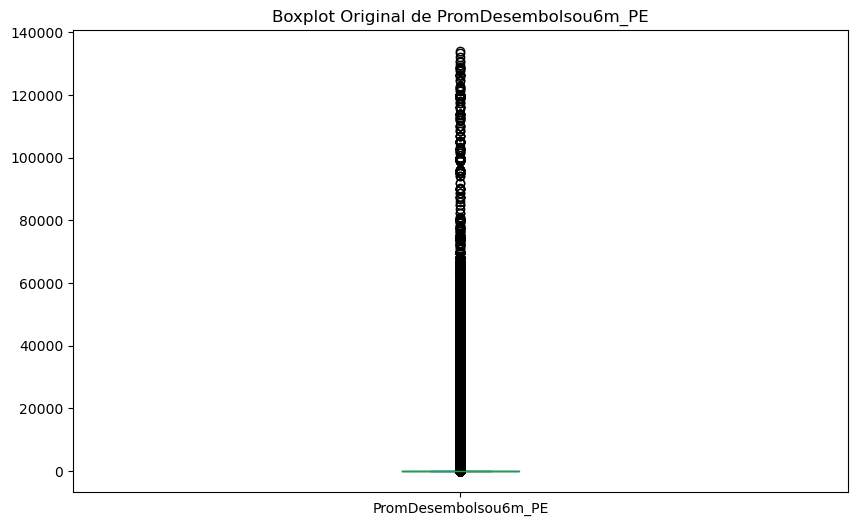

Nuevos valores mínimo y máximo: [0.0, 0.0]


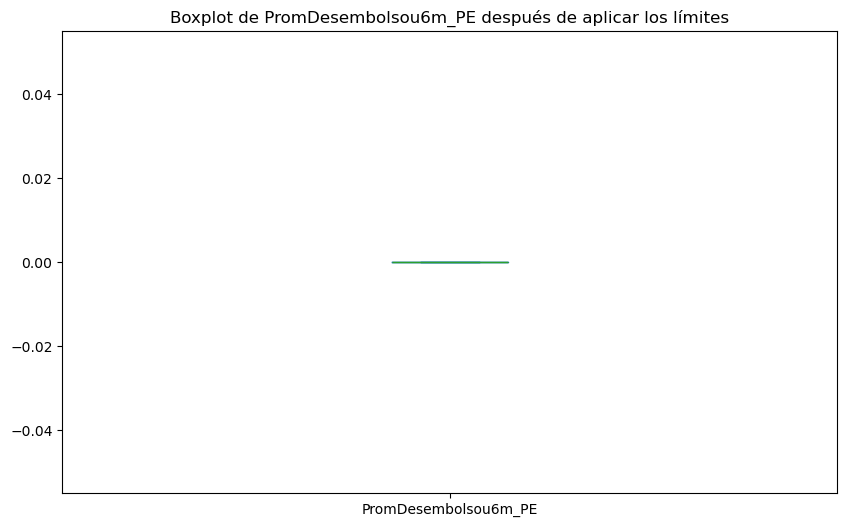

In [49]:
# Graficar el boxplot original de la columna PromDesembolsou6m_PE
plt.figure(figsize=(10, 6))  # Configurar el tamaño de la figura
df['PromDesembolsou6m_PE'].plot.box()
plt.title('Boxplot Original de PromDesembolsou6m_PE')  # Título del gráfico original
plt.show()

# Calcular los percentiles 1 y 90 para PromDesembolsou6m_PE
cotas_PromDesembolsou6m_PE = np.percentile(df['PromDesembolsou6m_PE'].dropna(), [1, 90])

# Limitar los valores de PromDesembolsou6m_PE a los percentiles 1 y 90
df.loc[df['PromDesembolsou6m_PE'] >= cotas_PromDesembolsou6m_PE[1], 'PromDesembolsou6m_PE'] = cotas_PromDesembolsou6m_PE[1]
df.loc[df['PromDesembolsou6m_PE'] <= cotas_PromDesembolsou6m_PE[0], 'PromDesembolsou6m_PE'] = cotas_PromDesembolsou6m_PE[0]

# Verificar los nuevos valores mínimo y máximo después de aplicar los límites
min_max_values_promdesembolsou6m_PE = [np.min(df['PromDesembolsou6m_PE']), np.max(df['PromDesembolsou6m_PE'])]
print("Nuevos valores mínimo y máximo:", min_max_values_promdesembolsou6m_PE)

# Graficar el boxplot de PromDesembolsou6m_PE después de aplicar los límites
plt.figure(figsize=(10, 6))  # Configurar el tamaño de la figura
df['PromDesembolsou6m_PE'].plot.box()
plt.title('Boxplot de PromDesembolsou6m_PE después de aplicar los límites')  # Título del gráfico modificado
plt.show()

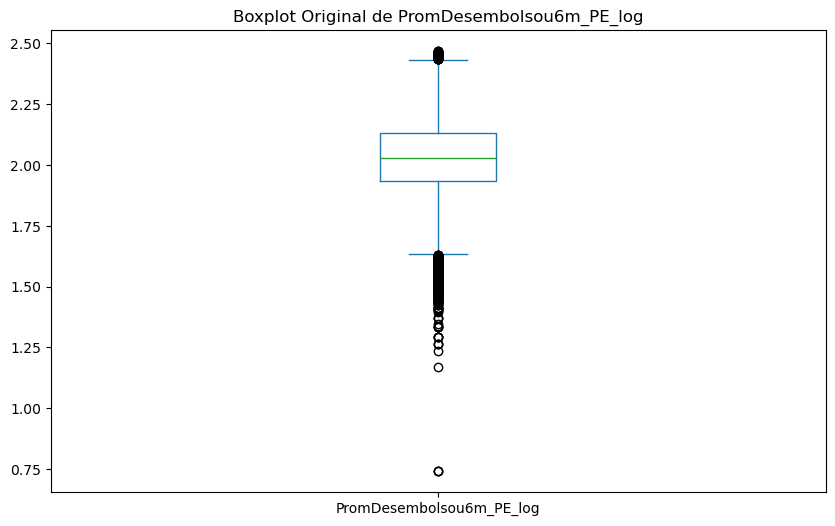

Nuevos valores mínimo y máximo: [1.657494474249781, 2.22033762328459]


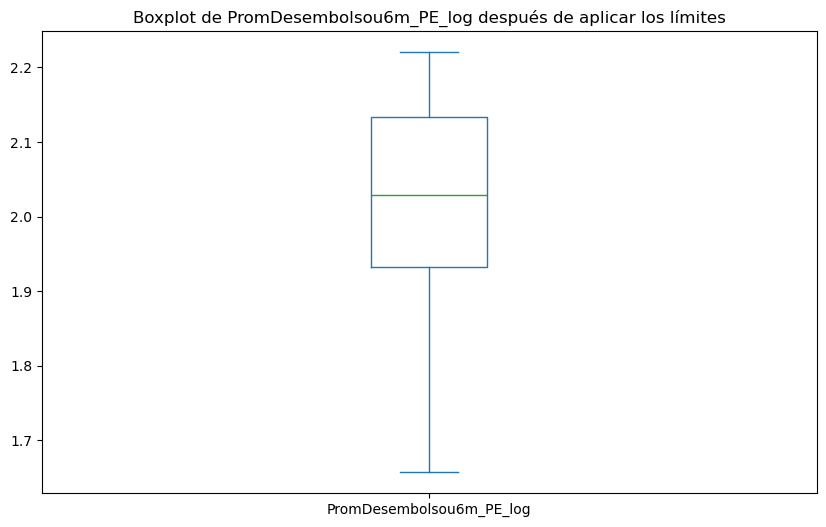

In [51]:
# Aplicar la transformación logarítmica
df['PromDesembolsou6m_PE_log'] = np.log(df['PromDesembolsou6m_PE_log'].apply(lambda x: x if x > 0 else np.nan))

# Graficar el boxplot original de la columna PromDesembolsou6m_PE_log
plt.figure(figsize=(10, 6))  # Configurar el tamaño de la figura
df['PromDesembolsou6m_PE_log'].plot.box()
plt.title('Boxplot Original de PromDesembolsou6m_PE_log')  # Título del gráfico original
plt.show()

# Calcular los percentiles 1 y 90 para PromDesembolsou6m_PE_log
cotas_PromDesembolsou6m_PE_log = np.percentile(df['PromDesembolsou6m_PE_log'].dropna(), [1, 90])

# Limitar los valores de PromDesembolsou6m_PE_log a los percentiles 1 y 90
df.loc[df['PromDesembolsou6m_PE_log'] >= cotas_PromDesembolsou6m_PE_log[1], 'PromDesembolsou6m_PE_log'] = cotas_PromDesembolsou6m_PE_log[1]
df.loc[df['PromDesembolsou6m_PE_log'] <= cotas_PromDesembolsou6m_PE_log[0], 'PromDesembolsou6m_PE_log'] = cotas_PromDesembolsou6m_PE_log[0]

# Verificar los nuevos valores mínimo y máximo después de aplicar los límites
min_max_values_promdesembolsou6m_PE_log = [np.min(df['PromDesembolsou6m_PE_log']), np.max(df['PromDesembolsou6m_PE_log'])]
print("Nuevos valores mínimo y máximo:", min_max_values_promdesembolsou6m_PE_log)

# Graficar el boxplot de PromDesembolsou6m_PE_log después de aplicar los límites
plt.figure(figsize=(10, 6))  # Configurar el tamaño de la figura
df['PromDesembolsou6m_PE_log'].plot.box()
plt.title('Boxplot de PromDesembolsou6m_PE_log después de aplicar los límites')  # Título del gráfico modificado
plt.show()

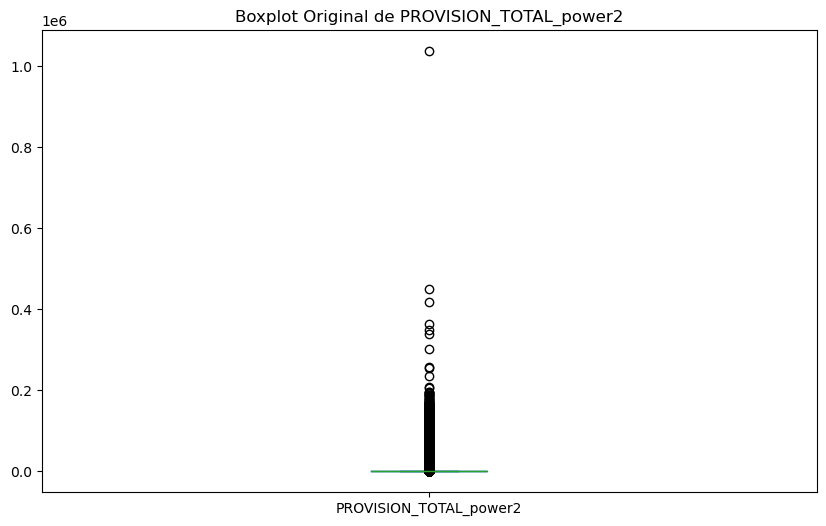

Nuevos valores mínimo y máximo: [0.0, 73.03298793235598]


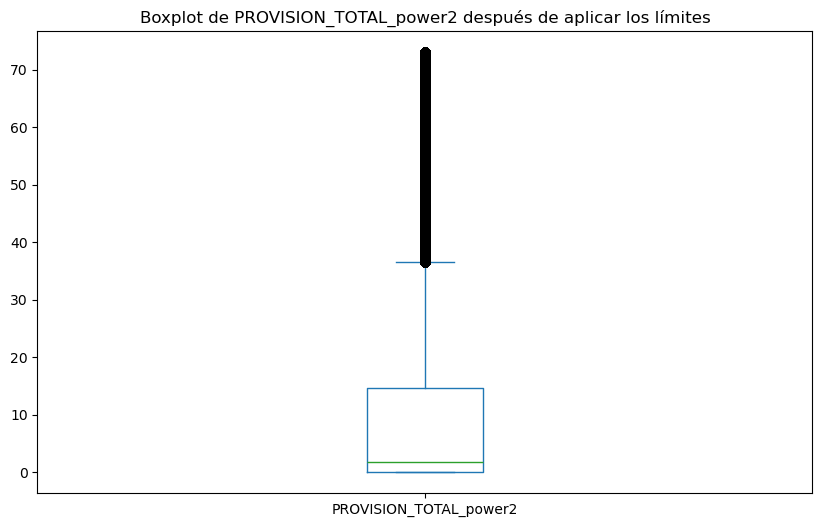

In [53]:
# Graficar el boxplot original de la columna PROVISION_TOTAL_power2
plt.figure(figsize=(10, 6))  # Configurar el tamaño de la figura
df['PROVISION_TOTAL_power2'].plot.box()
plt.title('Boxplot Original de PROVISION_TOTAL_power2')  # Título del gráfico original
plt.show()

# Calcular los percentiles 1 y 90 para PROVISION_TOTAL_power2
cotas_PROVISION_TOTAL_power2 = np.percentile(df['PROVISION_TOTAL_power2'].dropna(), [1, 90])

# Limitar los valores de PROVISION_TOTAL_power2 a los percentiles 1 y 90
df.loc[df['PROVISION_TOTAL_power2'] >= cotas_PROVISION_TOTAL_power2[1], 'PROVISION_TOTAL_power2'] = cotas_PROVISION_TOTAL_power2[1]
df.loc[df['PROVISION_TOTAL_power2'] <= cotas_PROVISION_TOTAL_power2[0], 'PROVISION_TOTAL_power2'] = cotas_PROVISION_TOTAL_power2[0]

# Verificar los nuevos valores mínimo y máximo después de aplicar los límites
min_max_values_provision_total_power2 = [np.min(df['PROVISION_TOTAL_power2']), np.max(df['PROVISION_TOTAL_power2'])]
print("Nuevos valores mínimo y máximo:", min_max_values_provision_total_power2)

# Graficar el boxplot de PROVISION_TOTAL_power2 después de aplicar los límites
plt.figure(figsize=(10, 6))  # Configurar el tamaño de la figura
df['PROVISION_TOTAL_power2'].plot.box()
plt.title('Boxplot de PROVISION_TOTAL_power2 después de aplicar los límites')  # Título del gráfico modificado
plt.show()

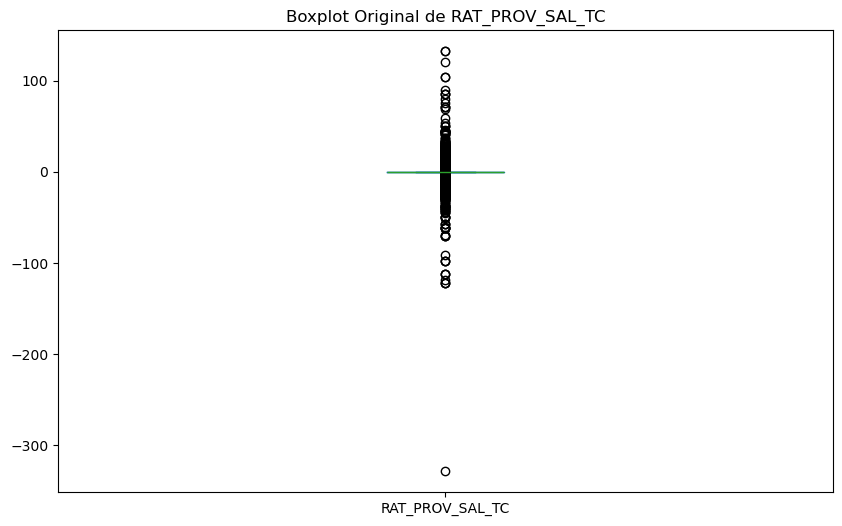

Nuevos valores mínimo y máximo: [-0.13931398781428567, 0.013158632800604898]


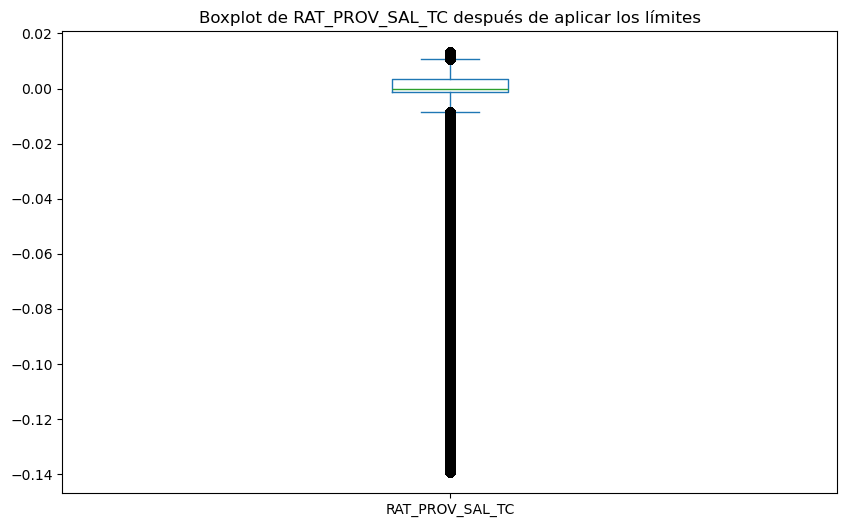

In [55]:
# Graficar el boxplot original de la columna RAT_PROV_SAL_TC
plt.figure(figsize=(10, 6))  # Configurar el tamaño de la figura
df['RAT_PROV_SAL_TC'].plot.box()
plt.title('Boxplot Original de RAT_PROV_SAL_TC')  # Título del gráfico original
plt.show()

# Calcular los percentiles 1 y 90 para RAT_PROV_SAL_TC
cotas_RAT_PROV_SAL_TC = np.percentile(df['RAT_PROV_SAL_TC'].dropna(), [1, 90])

# Limitar los valores de RAT_PROV_SAL_TC a los percentiles 1 y 90
df.loc[df['RAT_PROV_SAL_TC'] >= cotas_RAT_PROV_SAL_TC[1], 'RAT_PROV_SAL_TC'] = cotas_RAT_PROV_SAL_TC[1]
df.loc[df['RAT_PROV_SAL_TC'] <= cotas_RAT_PROV_SAL_TC[0], 'RAT_PROV_SAL_TC'] = cotas_RAT_PROV_SAL_TC[0]

# Verificar los nuevos valores mínimo y máximo después de aplicar los límites
min_max_values_rat_prov_sal_tc = [np.min(df['RAT_PROV_SAL_TC']), np.max(df['RAT_PROV_SAL_TC'])]
print("Nuevos valores mínimo y máximo:", min_max_values_rat_prov_sal_tc)

# Graficar el boxplot de RAT_PROV_SAL_TC después de aplicar los límites
plt.figure(figsize=(10, 6))  # Configurar el tamaño de la figura
df['RAT_PROV_SAL_TC'].plot.box()
plt.title('Boxplot de RAT_PROV_SAL_TC después de aplicar los límites')  # Título del gráfico modificado
plt.show()

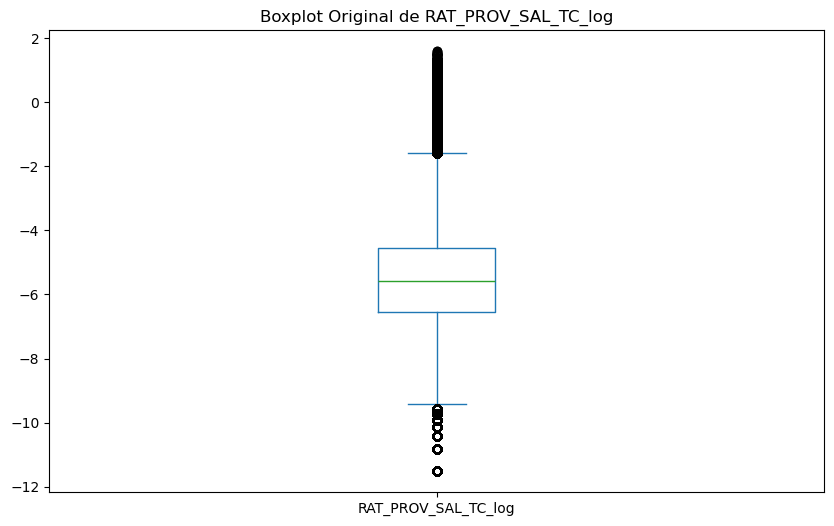

Nuevos valores mínimo y máximo: [-9.903487552536127, -3.4191577070391483]


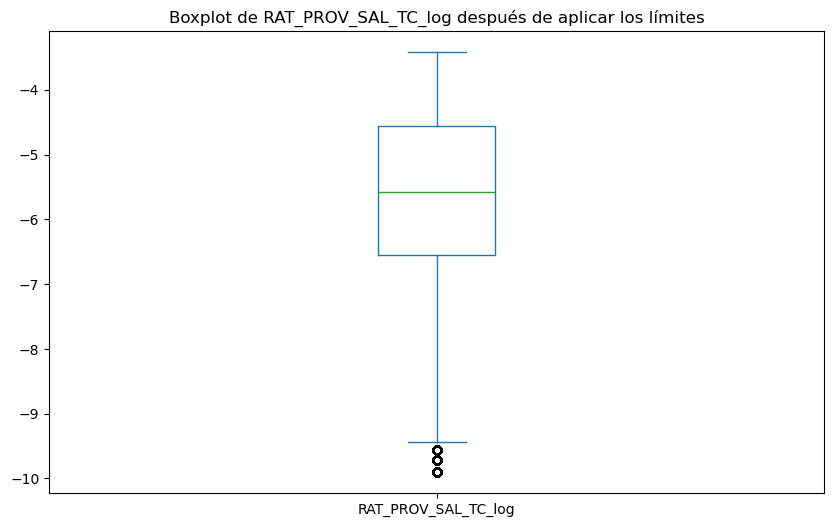

In [57]:
# Aplicar la transformación logarítmica
df['RAT_PROV_SAL_TC_log'] = np.log(df['RAT_PROV_SAL_TC_log'].apply(lambda x: x if x > 0 else np.nan))

# Graficar el boxplot original de la columna RAT_PROV_SAL_TC_log
plt.figure(figsize=(10, 6))  # Configurar el tamaño de la figura
df['RAT_PROV_SAL_TC_log'].plot.box()
plt.title('Boxplot Original de RAT_PROV_SAL_TC_log')  # Título del gráfico original
plt.show()

# Calcular los percentiles 1 y 90 para RAT_PROV_SAL_TC_log
cotas_RAT_PROV_SAL_TC_log = np.percentile(df['RAT_PROV_SAL_TC_log'].dropna(), [1, 90])

# Limitar los valores de RAT_PROV_SAL_TC_log a los percentiles 1 y 90
df.loc[df['RAT_PROV_SAL_TC_log'] >= cotas_RAT_PROV_SAL_TC_log[1], 'RAT_PROV_SAL_TC_log'] = cotas_RAT_PROV_SAL_TC_log[1]
df.loc[df['RAT_PROV_SAL_TC_log'] <= cotas_RAT_PROV_SAL_TC_log[0], 'RAT_PROV_SAL_TC_log'] = cotas_RAT_PROV_SAL_TC_log[0]

# Verificar los nuevos valores mínimo y máximo después de aplicar los límites
min_max_values_rat_prov_sal_tc_log = [np.min(df['RAT_PROV_SAL_TC_log']), np.max(df['RAT_PROV_SAL_TC_log'])]
print("Nuevos valores mínimo y máximo:", min_max_values_rat_prov_sal_tc_log)

# Graficar el boxplot de RAT_PROV_SAL_TC_log después de aplicar los límites
plt.figure(figsize=(10, 6))  # Configurar el tamaño de la figura
df['RAT_PROV_SAL_TC_log'].plot.box()
plt.title('Boxplot de RAT_PROV_SAL_TC_log después de aplicar los límites')  # Título del gráfico modificado
plt.show()

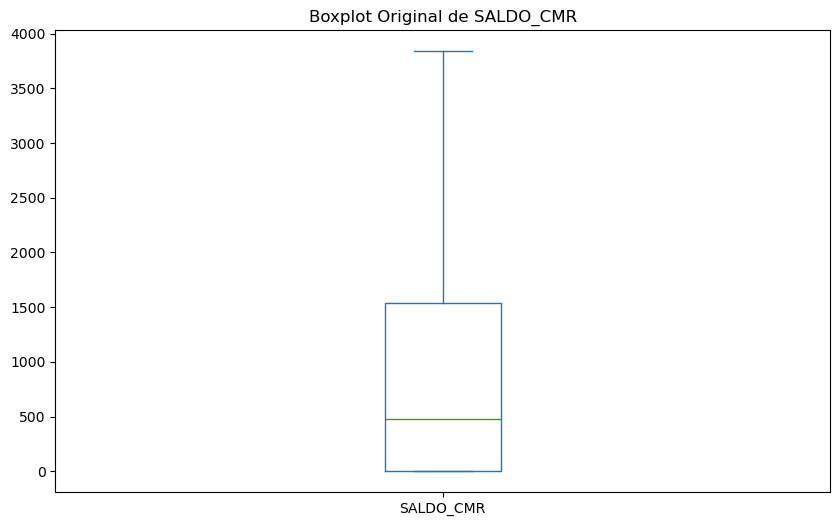

Nuevos valores mínimo y máximo: [0.0, 3302.398999999999]


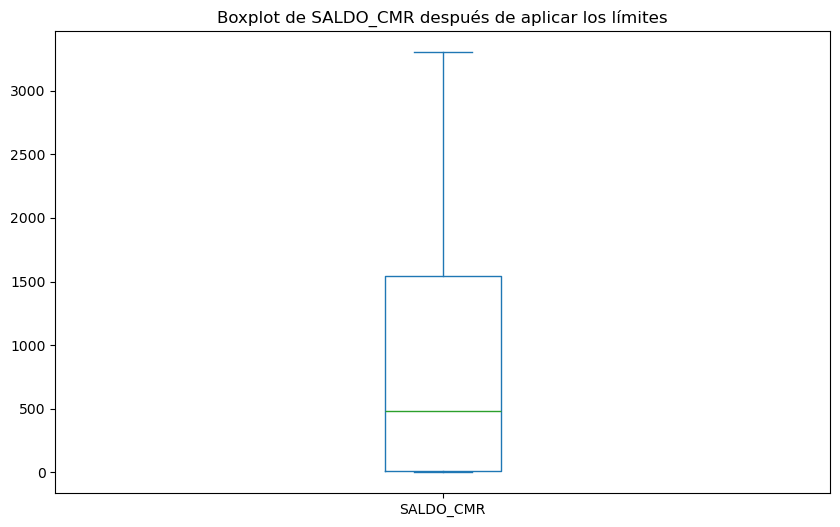

In [59]:
# Graficar el boxplot original de la columna SALDO_CMR
plt.figure(figsize=(10, 6))  # Configurar el tamaño de la figura
df['SALDO_CMR'].plot.box()
plt.title('Boxplot Original de SALDO_CMR')  # Título del gráfico original
plt.show()

# Calcular los percentiles 1 y 90 para SALDO_CMR
cotas_SALDO_CMR = np.percentile(df['SALDO_CMR'].dropna(), [1, 90])

# Limitar los valores de SALDO_CMR a los percentiles 1 y 90
df.loc[df['SALDO_CMR'] >= cotas_SALDO_CMR[1], 'SALDO_CMR'] = cotas_SALDO_CMR[1]
df.loc[df['SALDO_CMR'] <= cotas_SALDO_CMR[0], 'SALDO_CMR'] = cotas_SALDO_CMR[0]

# Verificar los nuevos valores mínimo y máximo después de aplicar los límites
min_max_values_saldo_cmr = [np.min(df['SALDO_CMR']), np.max(df['SALDO_CMR'])]
print("Nuevos valores mínimo y máximo:", min_max_values_saldo_cmr)

# Graficar el boxplot de SALDO_CMR después de aplicar los límites
plt.figure(figsize=(10, 6))  # Configurar el tamaño de la figura
df['SALDO_CMR'].plot.box()
plt.title('Boxplot de SALDO_CMR después de aplicar los límites')  # Título del gráfico modificado
plt.show()

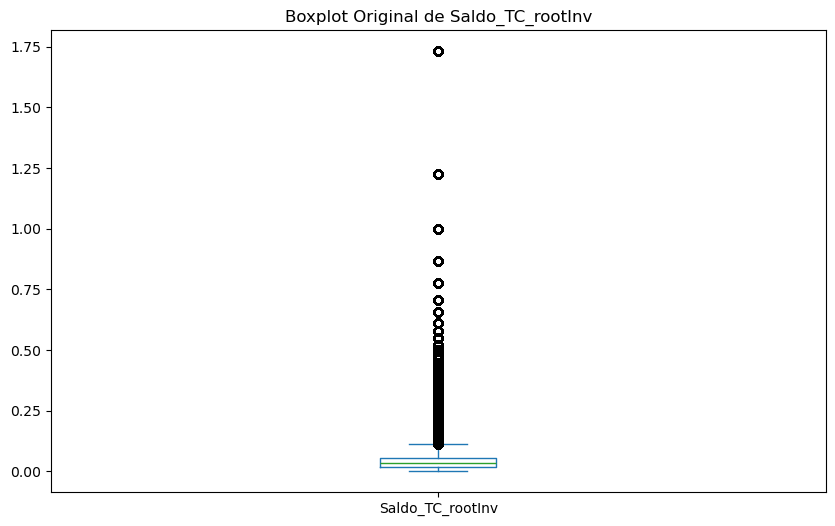

Nuevos valores mínimo y máximo: [0.0, 0.0969762275752853]


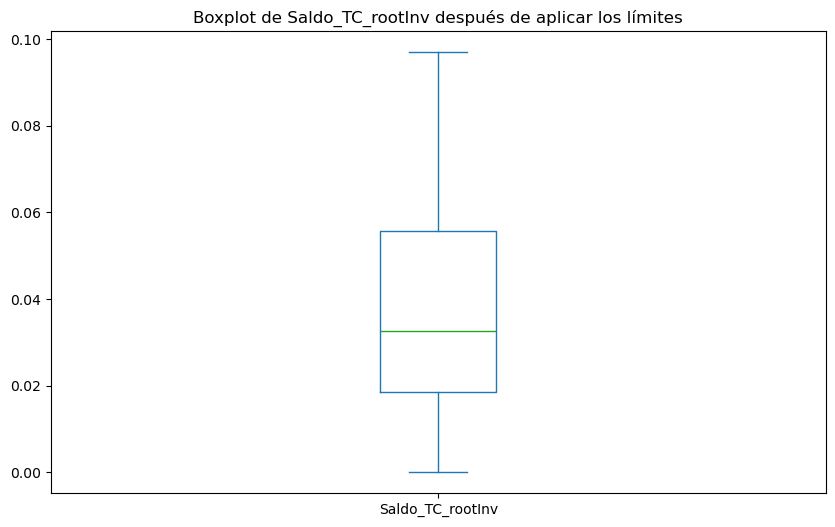

In [61]:
# Graficar el boxplot original de la columna Saldo_TC_rootInv
plt.figure(figsize=(10, 6))  # Configurar el tamaño de la figura
df['Saldo_TC_rootInv'].plot.box()
plt.title('Boxplot Original de Saldo_TC_rootInv')  # Título del gráfico original
plt.show()

# Calcular los percentiles 1 y 90 para Saldo_TC_rootInv
cotas_Saldo_TC_rootInv = np.percentile(df['Saldo_TC_rootInv'].dropna(), [1, 90])

# Limitar los valores de Saldo_TC_rootInv a los percentiles 1 y 90
df.loc[df['Saldo_TC_rootInv'] >= cotas_Saldo_TC_rootInv[1], 'Saldo_TC_rootInv'] = cotas_Saldo_TC_rootInv[1]
df.loc[df['Saldo_TC_rootInv'] <= cotas_Saldo_TC_rootInv[0], 'Saldo_TC_rootInv'] = cotas_Saldo_TC_rootInv[0]

# Verificar los nuevos valores mínimo y máximo después de aplicar los límites
min_max_values_saldo_tc_rootInv = [np.min(df['Saldo_TC_rootInv']), np.max(df['Saldo_TC_rootInv'])]
print("Nuevos valores mínimo y máximo:", min_max_values_saldo_tc_rootInv)

# Graficar el boxplot de Saldo_TC_rootInv después de aplicar los límites
plt.figure(figsize=(10, 6))  # Configurar el tamaño de la figura
df['Saldo_TC_rootInv'].plot.box()
plt.title('Boxplot de Saldo_TC_rootInv después de aplicar los límites')  # Título del gráfico modificado
plt.show()

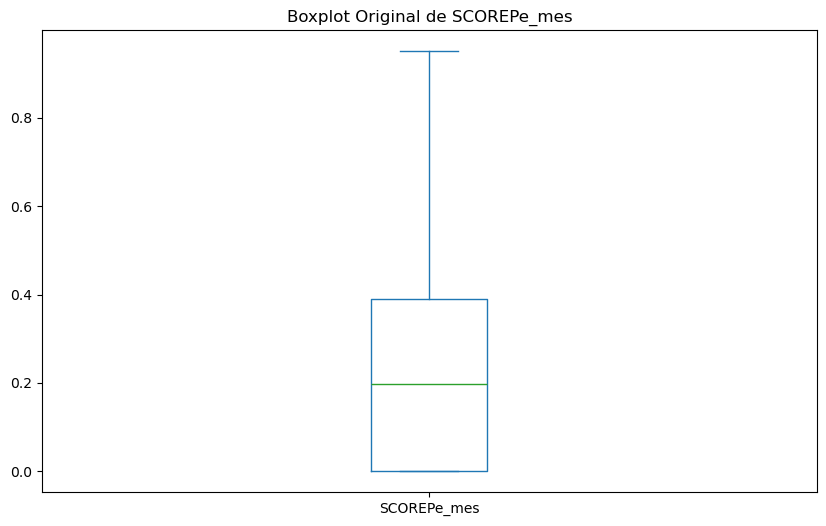

Nuevos valores mínimo y máximo: [0.0, 0.5909858361]


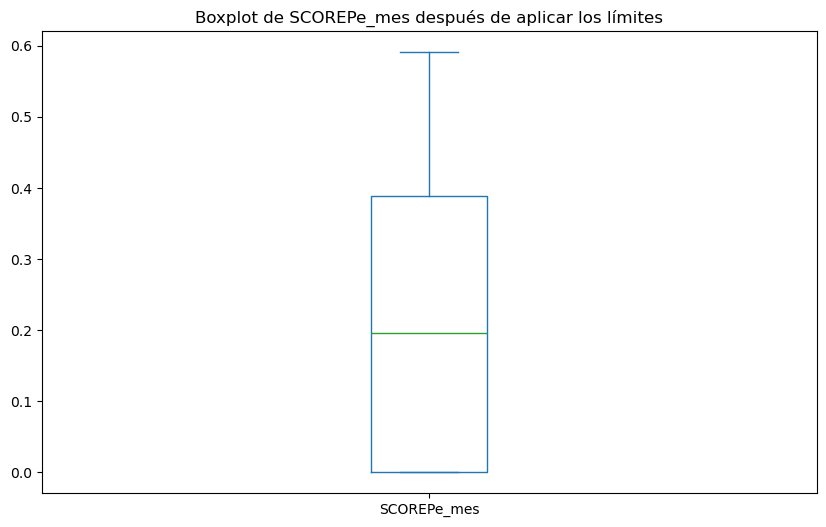

In [63]:
# Graficar el boxplot original de la columna SCOREPe_mes
plt.figure(figsize=(10, 6))  # Configurar el tamaño de la figura
df['SCOREPe_mes'].plot.box()
plt.title('Boxplot Original de SCOREPe_mes')  # Título del gráfico original
plt.show()

# Calcular los percentiles 1 y 90 para SCOREPe_mes
cotas_SCOREPe_mes = np.percentile(df['SCOREPe_mes'].dropna(), [1, 90])

# Limitar los valores de SCOREPe_mes a los percentiles 1 y 90
df.loc[df['SCOREPe_mes'] >= cotas_SCOREPe_mes[1], 'SCOREPe_mes'] = cotas_SCOREPe_mes[1]
df.loc[df['SCOREPe_mes'] <= cotas_SCOREPe_mes[0], 'SCOREPe_mes'] = cotas_SCOREPe_mes[0]

# Verificar los nuevos valores mínimo y máximo después de aplicar los límites
min_max_values_scorepe_mes = [np.min(df['SCOREPe_mes']), np.max(df['SCOREPe_mes'])]
print("Nuevos valores mínimo y máximo:", min_max_values_scorepe_mes)

# Graficar el boxplot de SCOREPe_mes después de aplicar los límites
plt.figure(figsize=(10, 6))  # Configurar el tamaño de la figura
df['SCOREPe_mes'].plot.box()
plt.title('Boxplot de SCOREPe_mes después de aplicar los límites')  # Título del gráfico modificado
plt.show()

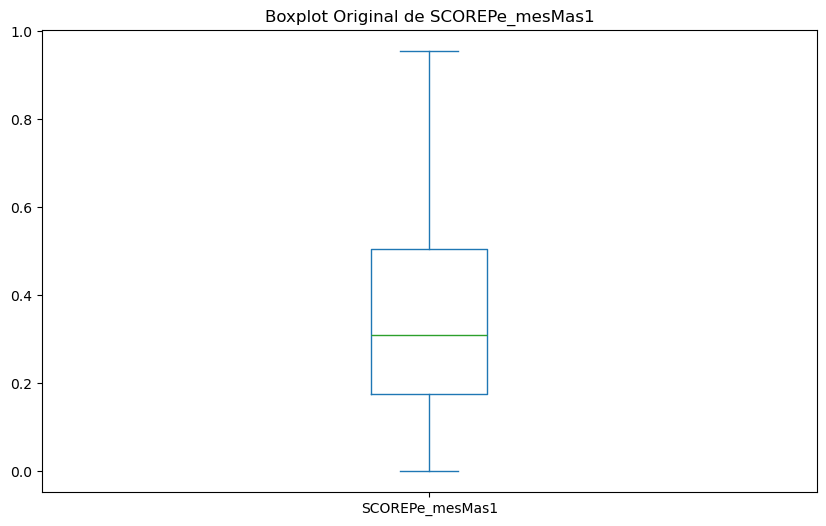

Nuevos valores mínimo y máximo: [0.0, 0.6774879458999998]


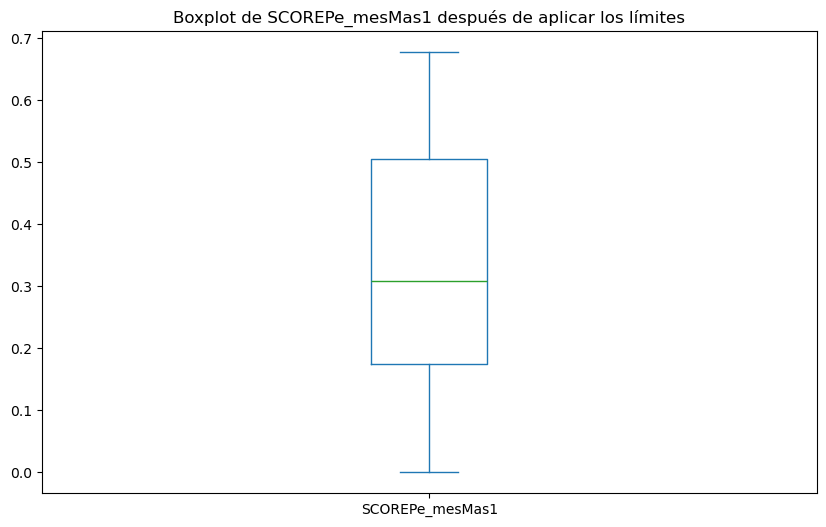

In [65]:
# Graficar el boxplot original de la columna SCOREPe_mesMas1
plt.figure(figsize=(10, 6))  # Configurar el tamaño de la figura
df['SCOREPe_mesMas1'].plot.box()
plt.title('Boxplot Original de SCOREPe_mesMas1')  # Título del gráfico original
plt.show()

# Calcular los percentiles 1 y 90 para SCOREPe_mesMas1
cotas_SCOREPe_mesMas1 = np.percentile(df['SCOREPe_mesMas1'].dropna(), [1, 90])

# Limitar los valores de SCOREPe_mesMas1 a los percentiles 1 y 90
df.loc[df['SCOREPe_mesMas1'] >= cotas_SCOREPe_mesMas1[1], 'SCOREPe_mesMas1'] = cotas_SCOREPe_mesMas1[1]
df.loc[df['SCOREPe_mesMas1'] <= cotas_SCOREPe_mesMas1[0], 'SCOREPe_mesMas1'] = cotas_SCOREPe_mesMas1[0]

# Verificar los nuevos valores mínimo y máximo después de aplicar los límites
min_max_values_scorepe_mesMas1 = [np.min(df['SCOREPe_mesMas1']), np.max(df['SCOREPe_mesMas1'])]
print("Nuevos valores mínimo y máximo:", min_max_values_scorepe_mesMas1)

# Graficar el boxplot de SCOREPe_mesMas1 después de aplicar los límites
plt.figure(figsize=(10, 6))  # Configurar el tamaño de la figura
df['SCOREPe_mesMas1'].plot.box()
plt.title('Boxplot de SCOREPe_mesMas1 después de aplicar los límites')  # Título del gráfico modificado
plt.show()

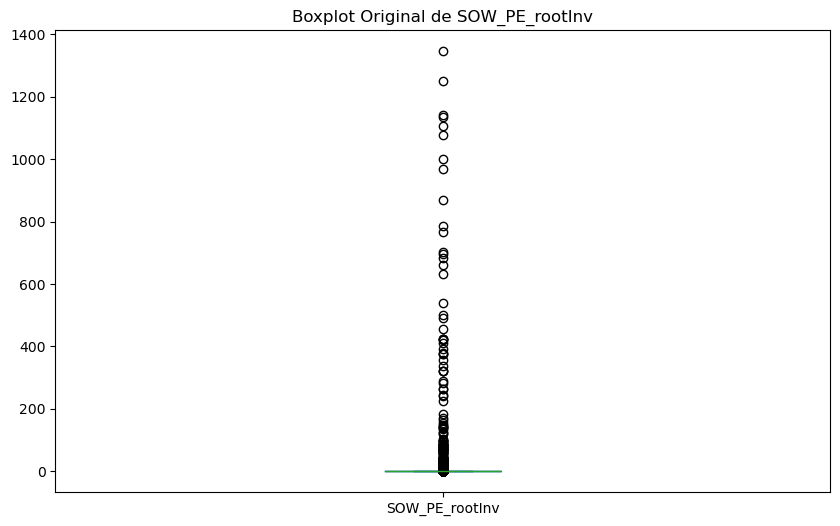

Nuevos valores mínimo y máximo: [0.0, 1.0]


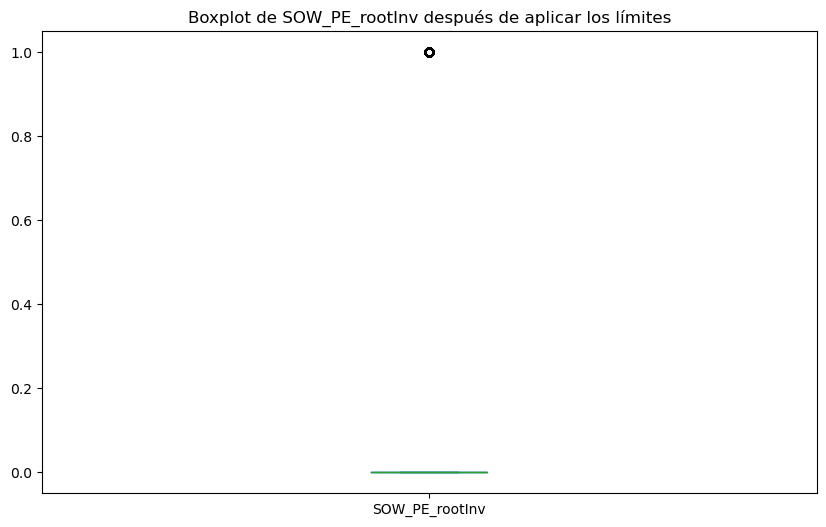

In [67]:
# Graficar el boxplot original de la columna SOW_PE_rootInv
plt.figure(figsize=(10, 6))  # Configurar el tamaño de la figura
df['SOW_PE_rootInv'].plot.box()
plt.title('Boxplot Original de SOW_PE_rootInv')  # Título del gráfico original
plt.show()

# Calcular los percentiles 1 y 90 para SOW_PE_rootInv
cotas_SOW_PE_rootInv = np.percentile(df['SOW_PE_rootInv'].dropna(), [1, 90])

# Limitar los valores de SOW_PE_rootInv a los percentiles 1 y 90
df.loc[df['SOW_PE_rootInv'] >= cotas_SOW_PE_rootInv[1], 'SOW_PE_rootInv'] = cotas_SOW_PE_rootInv[1]
df.loc[df['SOW_PE_rootInv'] <= cotas_SOW_PE_rootInv[0], 'SOW_PE_rootInv'] = cotas_SOW_PE_rootInv[0]

# Verificar los nuevos valores mínimo y máximo después de aplicar los límites
min_max_values_sow_pe_rootInv = [np.min(df['SOW_PE_rootInv']), np.max(df['SOW_PE_rootInv'])]
print("Nuevos valores mínimo y máximo:", min_max_values_sow_pe_rootInv)

# Graficar el boxplot de SOW_PE_rootInv después de aplicar los límites
plt.figure(figsize=(10, 6))  # Configurar el tamaño de la figura
df['SOW_PE_rootInv'].plot.box()
plt.title('Boxplot de SOW_PE_rootInv después de aplicar los límites')  # Título del gráfico modificado
plt.show()

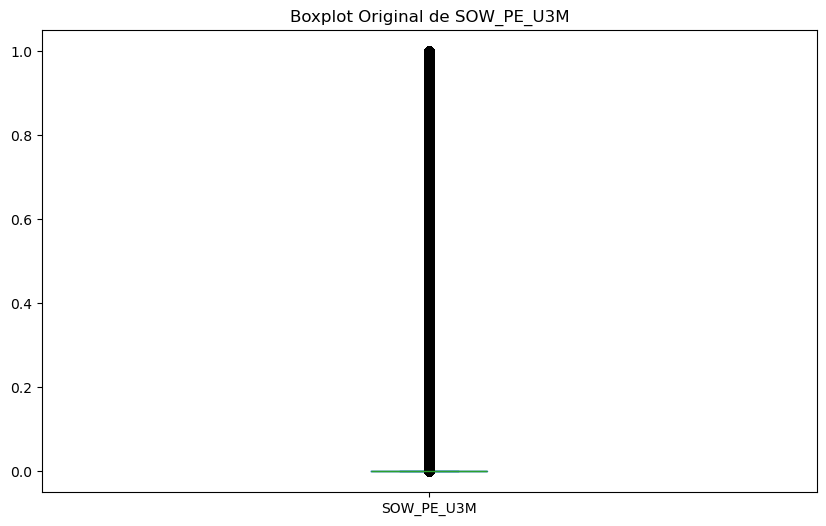

Nuevos valores mínimo y máximo: [0.0, 0.21436792618400197]


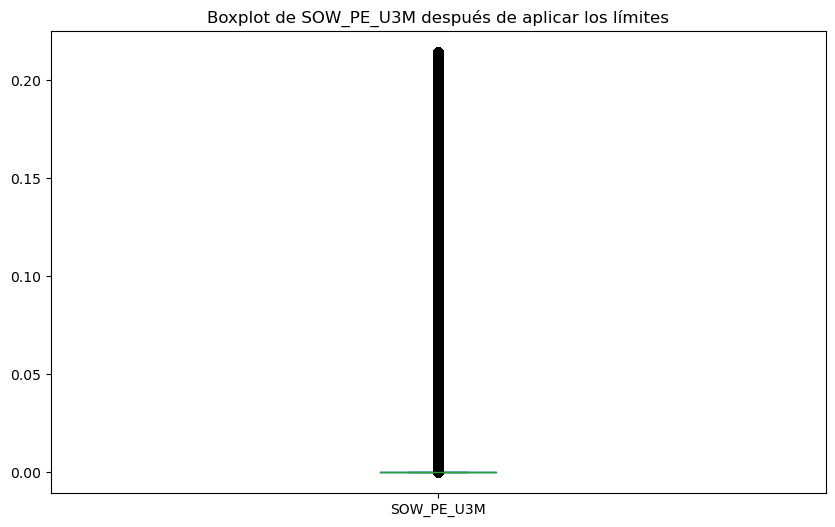

In [69]:
# Graficar el boxplot original de la columna SOW_PE_U3M
plt.figure(figsize=(10, 6))  # Configurar el tamaño de la figura
df['SOW_PE_U3M'].plot.box()
plt.title('Boxplot Original de SOW_PE_U3M')  # Título del gráfico original
plt.show()

# Calcular los percentiles 1 y 90 para SOW_PE_U3M
cotas_SOW_PE_U3M = np.percentile(df['SOW_PE_U3M'].dropna(), [1, 90])

# Limitar los valores de SOW_PE_U3M a los percentiles 1 y 90
df.loc[df['SOW_PE_U3M'] >= cotas_SOW_PE_U3M[1], 'SOW_PE_U3M'] = cotas_SOW_PE_U3M[1]
df.loc[df['SOW_PE_U3M'] <= cotas_SOW_PE_U3M[0], 'SOW_PE_U3M'] = cotas_SOW_PE_U3M[0]

# Verificar los nuevos valores mínimo y máximo después de aplicar los límites
min_max_values_sow_pe_u3m = [np.min(df['SOW_PE_U3M']), np.max(df['SOW_PE_U3M'])]
print("Nuevos valores mínimo y máximo:", min_max_values_sow_pe_u3m)

# Graficar el boxplot de SOW_PE_U3M después de aplicar los límites
plt.figure(figsize=(10, 6))  # Configurar el tamaño de la figura
df['SOW_PE_U3M'].plot.box()
plt.title('Boxplot de SOW_PE_U3M después de aplicar los límites')  # Título del gráfico modificado
plt.show()

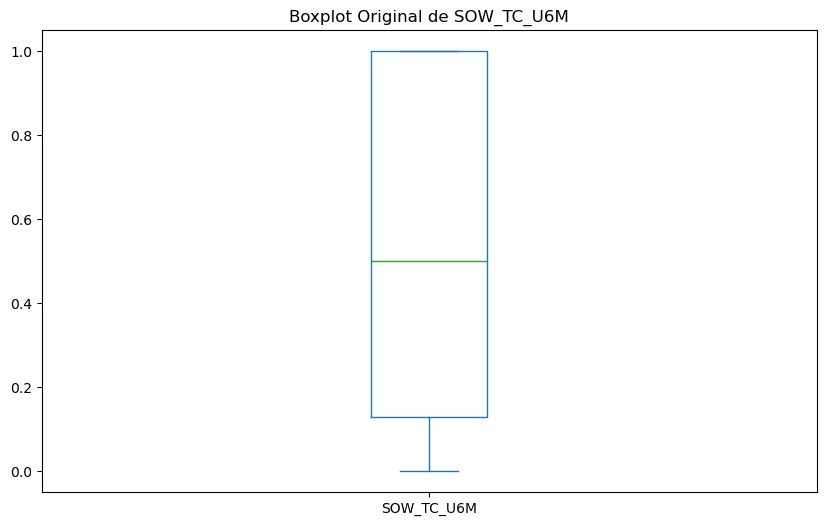

Nuevos valores mínimo y máximo: [0.0, 1.0]


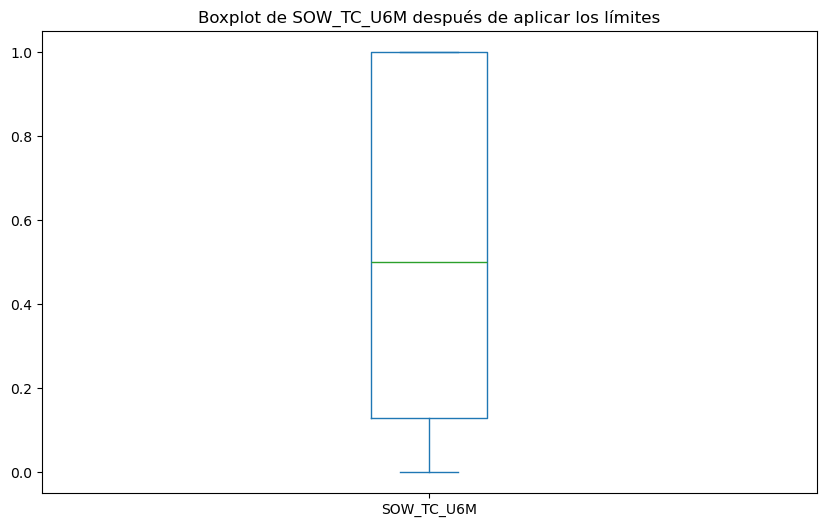

In [71]:

# Graficar el boxplot original de la columna SOW_TC_U6M
plt.figure(figsize=(10, 6))  # Configurar el tamaño de la figura
df['SOW_TC_U6M'].plot.box()
plt.title('Boxplot Original de SOW_TC_U6M')  # Título del gráfico original
plt.show()

# Calcular los percentiles 1 y 90 para SOW_TC_U6M
cotas_SOW_TC_U6M = np.percentile(df['SOW_TC_U6M'].dropna(), [1, 90])

# Limitar los valores de SOW_TC_U6M a los percentiles 1 y 90
df.loc[df['SOW_TC_U6M'] >= cotas_SOW_TC_U6M[1], 'SOW_TC_U6M'] = cotas_SOW_TC_U6M[1]
df.loc[df['SOW_TC_U6M'] <= cotas_SOW_TC_U6M[0], 'SOW_TC_U6M'] = cotas_SOW_TC_U6M[0]

# Verificar los nuevos valores mínimo y máximo después de aplicar los límites
min_max_values_sow_tc_u6m = [np.min(df['SOW_TC_U6M']), np.max(df['SOW_TC_U6M'])]
print("Nuevos valores mínimo y máximo:", min_max_values_sow_tc_u6m)

# Graficar el boxplot de SOW_TC_U6M después de aplicar los límites
plt.figure(figsize=(10, 6))  # Configurar el tamaño de la figura
df['SOW_TC_U6M'].plot.box()
plt.title('Boxplot de SOW_TC_U6M después de aplicar los límites')  # Título del gráfico modificado
plt.show()

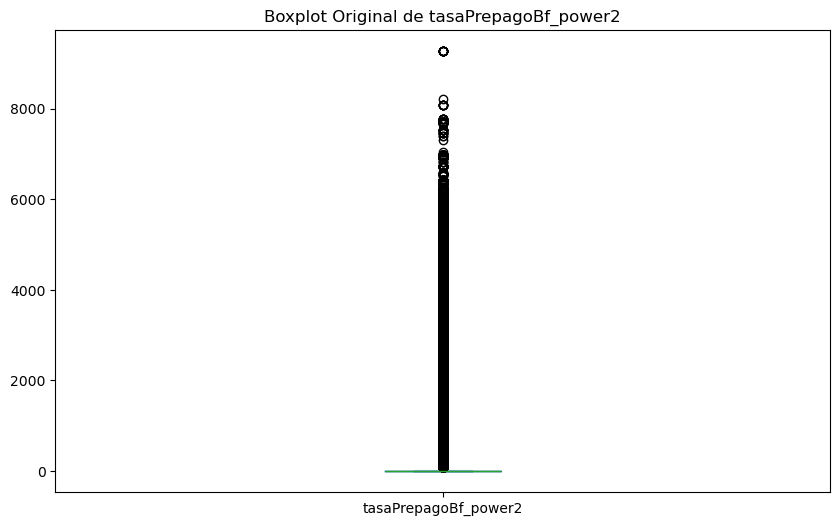

Nuevos valores mínimo y máximo: [0.0, 0.0]


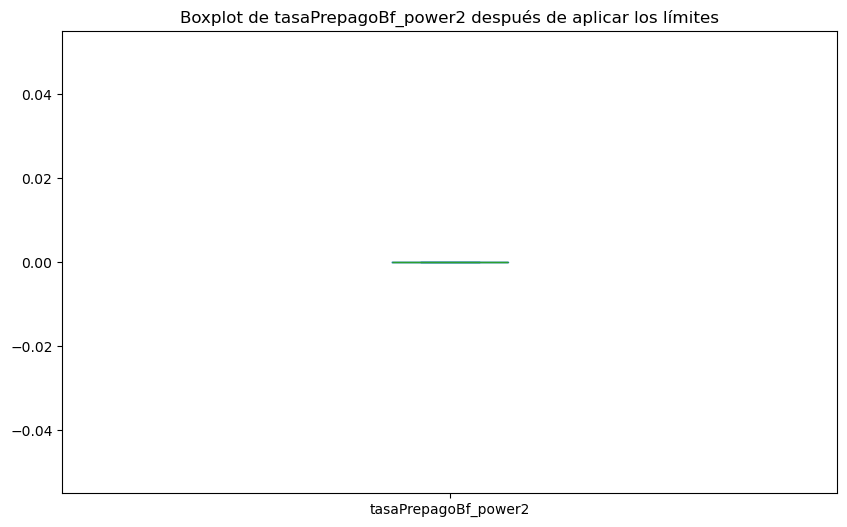

In [73]:
# Graficar el boxplot original de la columna tasaPrepagoBf_power2
plt.figure(figsize=(10, 6))  # Configurar el tamaño de la figura
df['tasaPrepagoBf_power2'].plot.box()
plt.title('Boxplot Original de tasaPrepagoBf_power2')  # Título del gráfico original
plt.show()

# Calcular los percentiles 1 y 90 para tasaPrepagoBf_power2
cotas_tasaPrepagoBf_power2 = np.percentile(df['tasaPrepagoBf_power2'].dropna(), [1, 90])

# Limitar los valores de tasaPrepagoBf_power2 a los percentiles 1 y 90
df.loc[df['tasaPrepagoBf_power2'] >= cotas_tasaPrepagoBf_power2[1], 'tasaPrepagoBf_power2'] = cotas_tasaPrepagoBf_power2[1]
df.loc[df['tasaPrepagoBf_power2'] <= cotas_tasaPrepagoBf_power2[0], 'tasaPrepagoBf_power2'] = cotas_tasaPrepagoBf_power2[0]

# Verificar los nuevos valores mínimo y máximo después de aplicar los límites
min_max_values_tasa_prepago_bf_power2 = [np.min(df['tasaPrepagoBf_power2']), np.max(df['tasaPrepagoBf_power2'])]
print("Nuevos valores mínimo y máximo:", min_max_values_tasa_prepago_bf_power2)

# Graficar el boxplot de tasaPrepagoBf_power2 después de aplicar los límites
plt.figure(figsize=(10, 6))  # Configurar el tamaño de la figura
df['tasaPrepagoBf_power2'].plot.box()
plt.title('Boxplot de tasaPrepagoBf_power2 después de aplicar los límites')  # Título del gráfico modificado
plt.show()

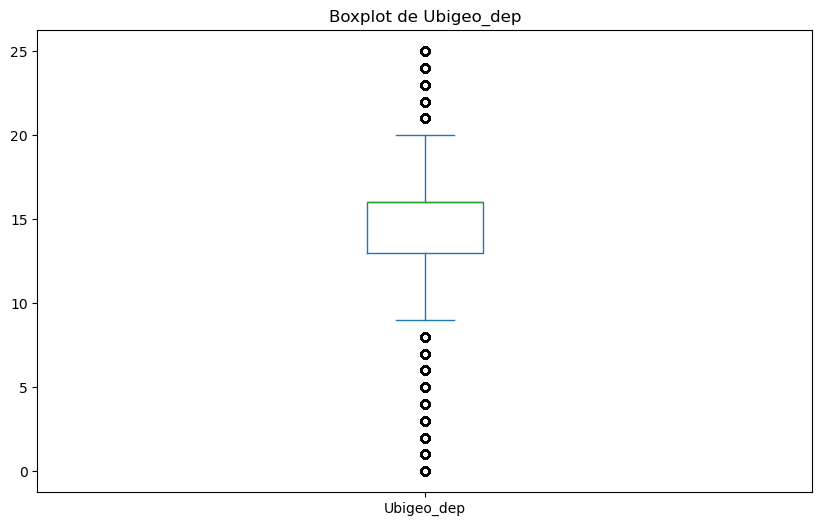

Valor mínimo: 0
Valor máximo: 25


In [75]:
# Graficar el boxplot de la columna Ubigeo_dep
plt.figure(figsize=(10, 6))
df['Ubigeo_dep'].plot.box()
plt.title('Boxplot de Ubigeo_dep')
plt.show()

# Verificar los valores mínimo y máximo de la columna
print(f"Valor mínimo: {df['Ubigeo_dep'].min()}")
print(f"Valor máximo: {df['Ubigeo_dep'].max()}")

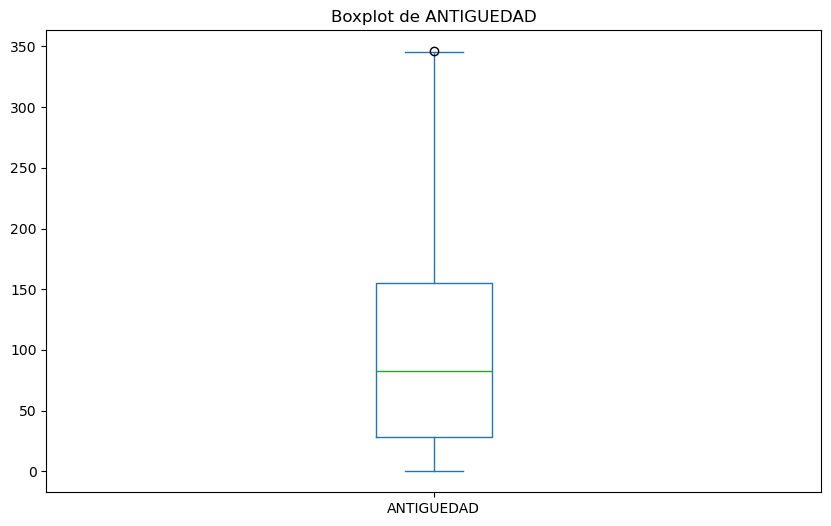

Nuevos valores mínimo y máximo de ANTIGUEDAD: [0, 252]


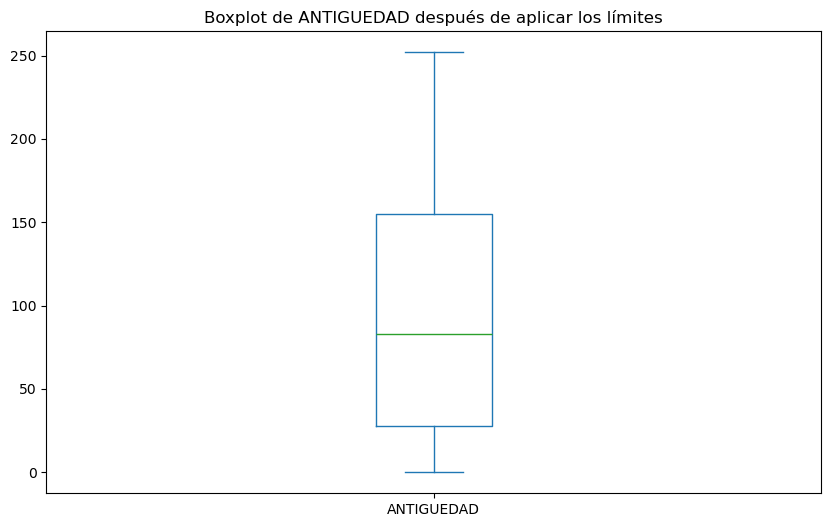

In [77]:
# Graficar el boxplot de la columna ANTIGUEDAD
plt.figure(figsize=(10, 6))
df['ANTIGUEDAD'].plot.box()
plt.title('Boxplot de ANTIGUEDAD')
plt.show()

# Calcular los percentiles 1 y 90 para ANTIGUEDAD
cotas_ANTIGUEDAD = np.percentile(df['ANTIGUEDAD'].dropna(), [1, 90])

# Limitar los valores de ANTIGUEDAD a los percentiles 1 y 90
df.loc[df['ANTIGUEDAD'] >= cotas_ANTIGUEDAD[1], 'ANTIGUEDAD'] = cotas_ANTIGUEDAD[1]
df.loc[df['ANTIGUEDAD'] <= cotas_ANTIGUEDAD[0], 'ANTIGUEDAD'] = cotas_ANTIGUEDAD[0]

# Verificar los nuevos valores mínimo y máximo después de aplicar los límites
min_max_values_antiguedad = [np.min(df['ANTIGUEDAD']), np.max(df['ANTIGUEDAD'])]
print("Nuevos valores mínimo y máximo de ANTIGUEDAD:", min_max_values_antiguedad)

# Graficar el boxplot de ANTIGUEDAD después de aplicar los límites
plt.figure(figsize=(10, 6))
df['ANTIGUEDAD'].plot.box()
plt.title('Boxplot de ANTIGUEDAD después de aplicar los límites')
plt.show()

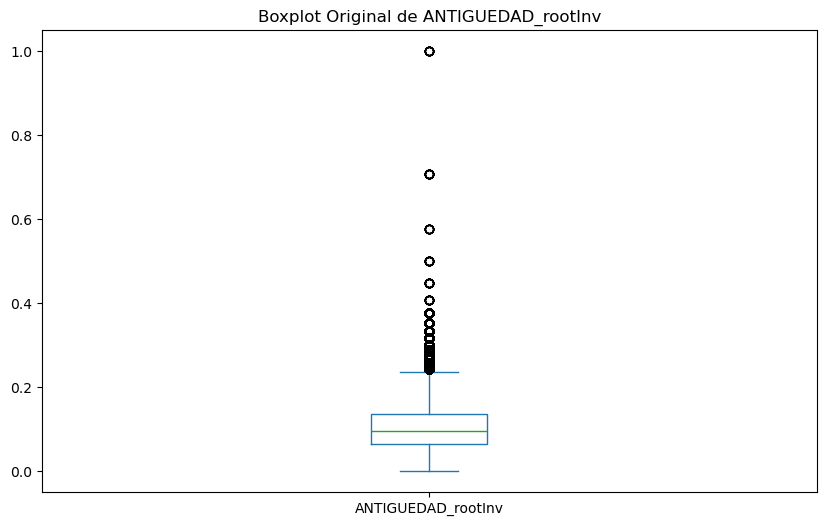

Nuevos valores mínimo y máximo de ANTIGUEDAD_rootInv: [0.0, 0.2085144140570747]


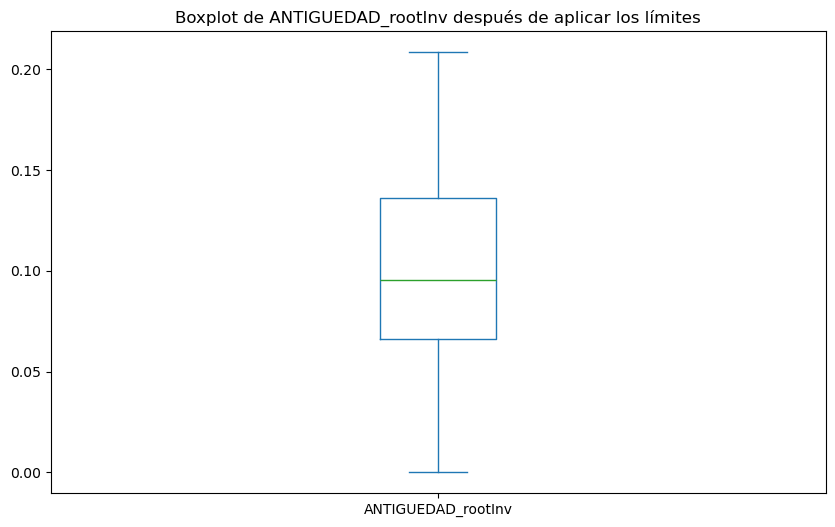

In [79]:
# Graficar el boxplot original de la columna ANTIGUEDAD_rootInv
plt.figure(figsize=(10, 6))
df['ANTIGUEDAD_rootInv'].plot.box()
plt.title('Boxplot Original de ANTIGUEDAD_rootInv')
plt.show()

# Calcular los percentiles 1 y 90 para ANTIGUEDAD_rootInv
cotas_ANTIGUEDAD_rootInv = np.percentile(df['ANTIGUEDAD_rootInv'].dropna(), [1, 90])

# Limitar los valores de ANTIGUEDAD_rootInv a los percentiles 1 y 90
df.loc[df['ANTIGUEDAD_rootInv'] >= cotas_ANTIGUEDAD_rootInv[1], 'ANTIGUEDAD_rootInv'] = cotas_ANTIGUEDAD_rootInv[1]
df.loc[df['ANTIGUEDAD_rootInv'] <= cotas_ANTIGUEDAD_rootInv[0], 'ANTIGUEDAD_rootInv'] = cotas_ANTIGUEDAD_rootInv[0]

# Verificar los nuevos valores mínimo y máximo después de aplicar los límites
min_max_values_antiguedad_rootInv = [np.min(df['ANTIGUEDAD_rootInv']), np.max(df['ANTIGUEDAD_rootInv'])]
print("Nuevos valores mínimo y máximo de ANTIGUEDAD_rootInv:", min_max_values_antiguedad_rootInv)

# Graficar el boxplot de ANTIGUEDAD_rootInv después de aplicar los límites
plt.figure(figsize=(10, 6))
df['ANTIGUEDAD_rootInv'].plot.box()
plt.title('Boxplot de ANTIGUEDAD_rootInv después de aplicar los límites')
plt.show()

In [81]:
df.head()

,PERIODO_1,LLAVE,TARGET,ANTIGUEDAD,ANTIGUEDAD_rootInv,CUOTA_TOPE_power2,Deuda_PE_BF_rootInv,Deuda_PE_SF_U1A_rootInv,Deuda_PE_SF_U6M,Deuda_PE_SF_U6M_rootInv,...,RAT_PROV_SAL_TC_log,SALDO_CMR,Saldo_TC_rootInv,SCOREPe_mes,SCOREPe_mesMas1,SOW_PE_rootInv,SOW_PE_U3M,SOW_TC_U6M,tasaPrepagoBf_power2,Ubigeo_dep
0,202401,E-44004501,0,252,0.061780,1.212289e+06,0.000000,0.000000,0.000,0.000000,...,NaN,0.00,0.096976,0.143994,0.139668,0.0,0.000000,0.005404,0.0,16
1,202310,E-44330401,0,19,0.208514,3.894134e+05,0.000000,0.008899,13549.560,0.008591,...,NaN,19.90,0.096976,0.435933,0.461777,0.0,0.000000,0.004805,0.0,16
2,202309,E-42434991,0,54,0.136083,3.461721e+06,0.000000,0.000000,0.000,0.000000,...,NaN,0.00,0.000000,0.184906,0.197249,0.0,0.000000,0.666667,0.0,13
3,202310,E-71987203,1,115,0.093250,1.336267e+06,0.008492,0.014493,6700.815,0.012216,...,NaN,552.96,0.027510,0.479990,0.454103,1.0,0.214368,0.418435,0.0,21
4,202310,E-43290482,0,245,0.063888,8.575316e+05,0.000000,0.000000,0.000,0.000000,...,NaN,264.49,0.096976,0.086052,0.062830,0.0,0.000000,0.058166,0.0,4


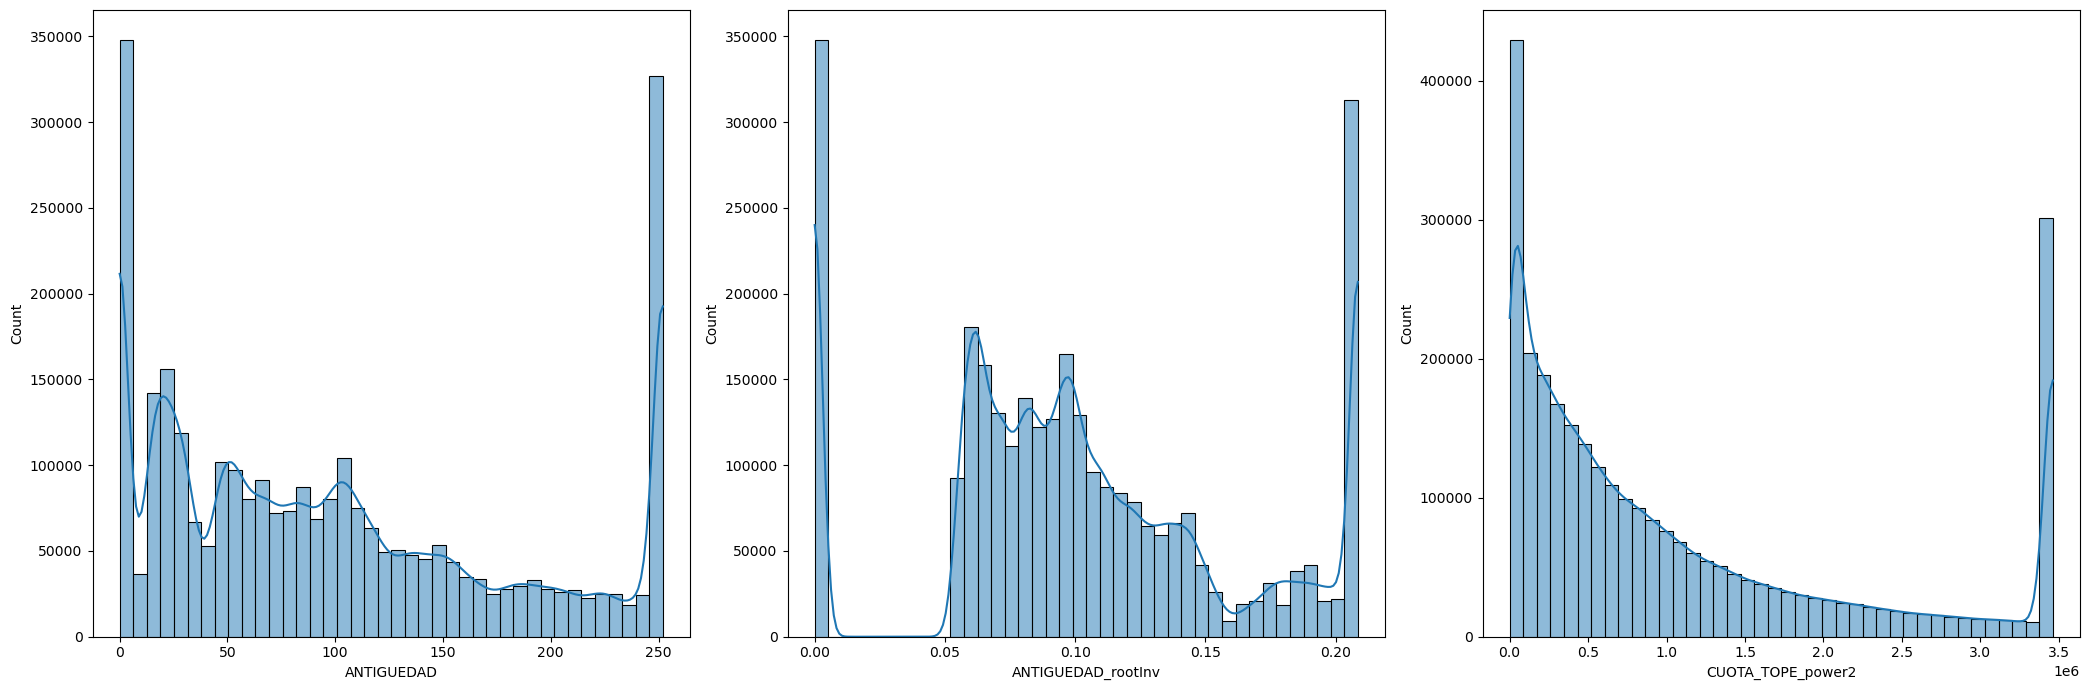

In [85]:
# Crear una cuadrícula de subplots de 3x3 con un tamaño de 14x14 pulgadas
fig, axes = plt.subplots(1, 3, figsize=(21, 7))  # Crea tres subplots en una fila

# Crear histogramas univariados en cada eje
sns.histplot(df["ANTIGUEDAD"], kde=True, bins=40, ax=axes[0])
sns.histplot(df["ANTIGUEDAD_rootInv"], kde=True, bins=40, ax=axes[1])
sns.histplot(df["CUOTA_TOPE_power2"], kde=True, bins=40, ax=axes[2])
#para descargar la imagen
#el dpi es la calidad de la imangen si te falta subele
#para guardar una nueva imagen campia el nombre porque sino se guarda en la misma imagen
plt.savefig('n1.jpg', format='jpg',dpi=400)

#en caso de que estes por google colab, este es el codigo para descargar 
#from google.colab import files
#files.download('dtypes_tipodedata.jpg')


plt.tight_layout()
plt.show()

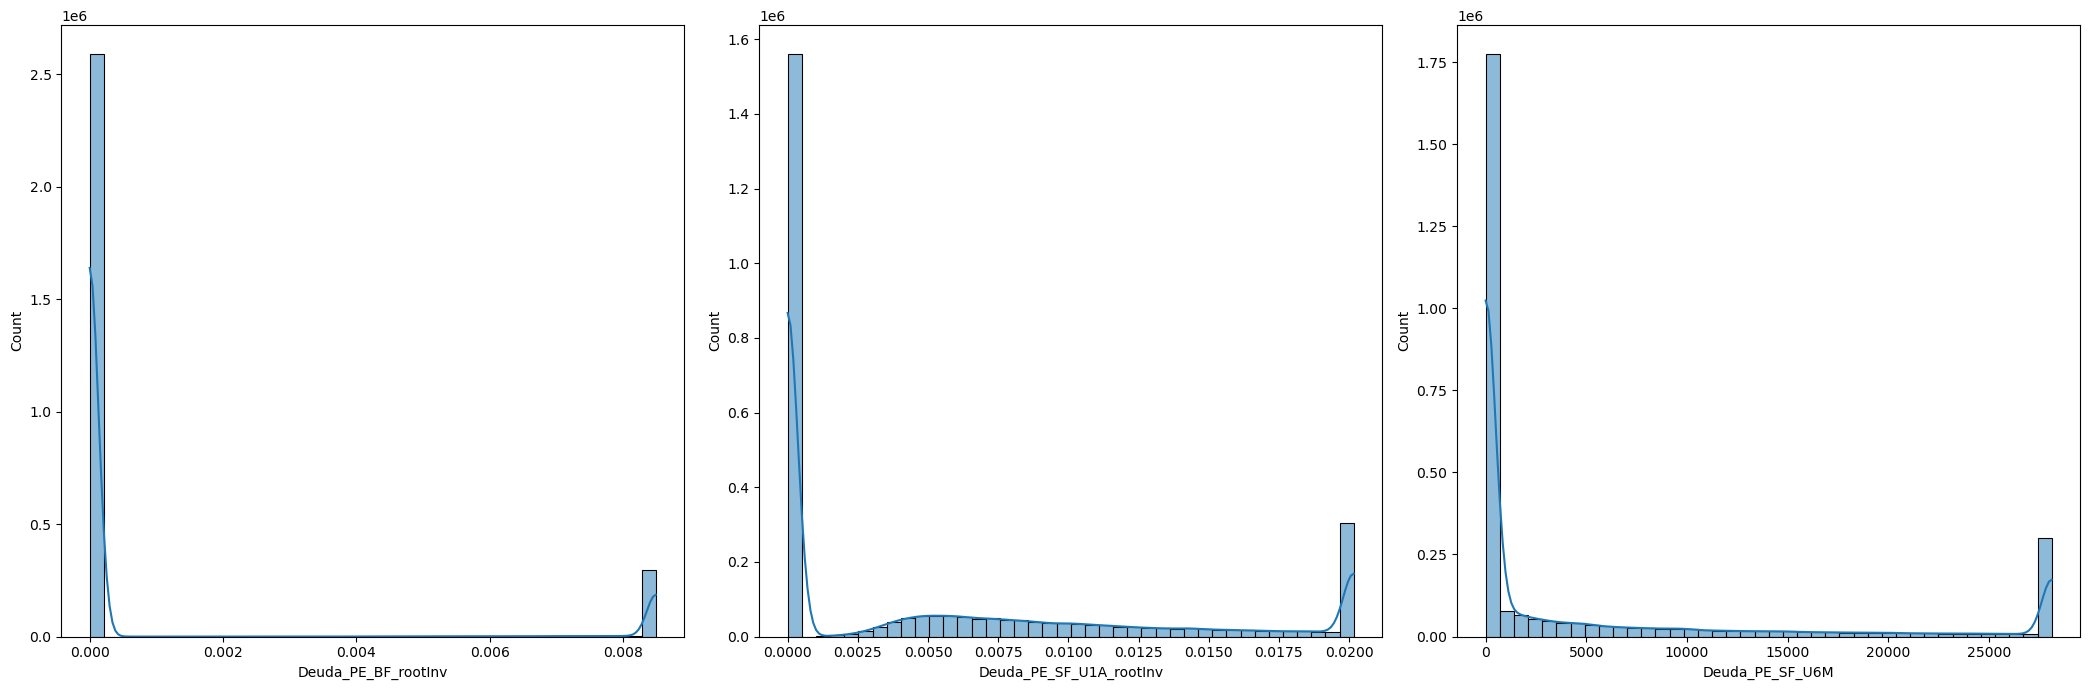

In [87]:
# Crear una cuadrícula de subplots de 3x3 con un tamaño de 14x14 pulgadas
fig, axes = plt.subplots(1, 3, figsize=(21, 7))  # Crea tres subplots en una fila

# Crear histogramas univariados en cada eje
sns.histplot(df["Deuda_PE_BF_rootInv"], kde=True, bins=40, ax=axes[0])
sns.histplot(df["Deuda_PE_SF_U1A_rootInv"], kde=True, bins=40, ax=axes[1])
sns.histplot(df["Deuda_PE_SF_U6M"], kde=True, bins=40, ax=axes[2])
#para descargar la imagen
#el dpi es la calidad de la imangen si te falta subele
#para guardar una nueva imagen campia el nombre porque sino se guarda en la misma imagen
plt.savefig('n2.jpg', format='jpg',dpi=400)

#en caso de que estes por google colab, este es el codigo para descargar 
#from google.colab import files
#files.download('dtypes_tipodedata.jpg')


plt.tight_layout()
plt.show()

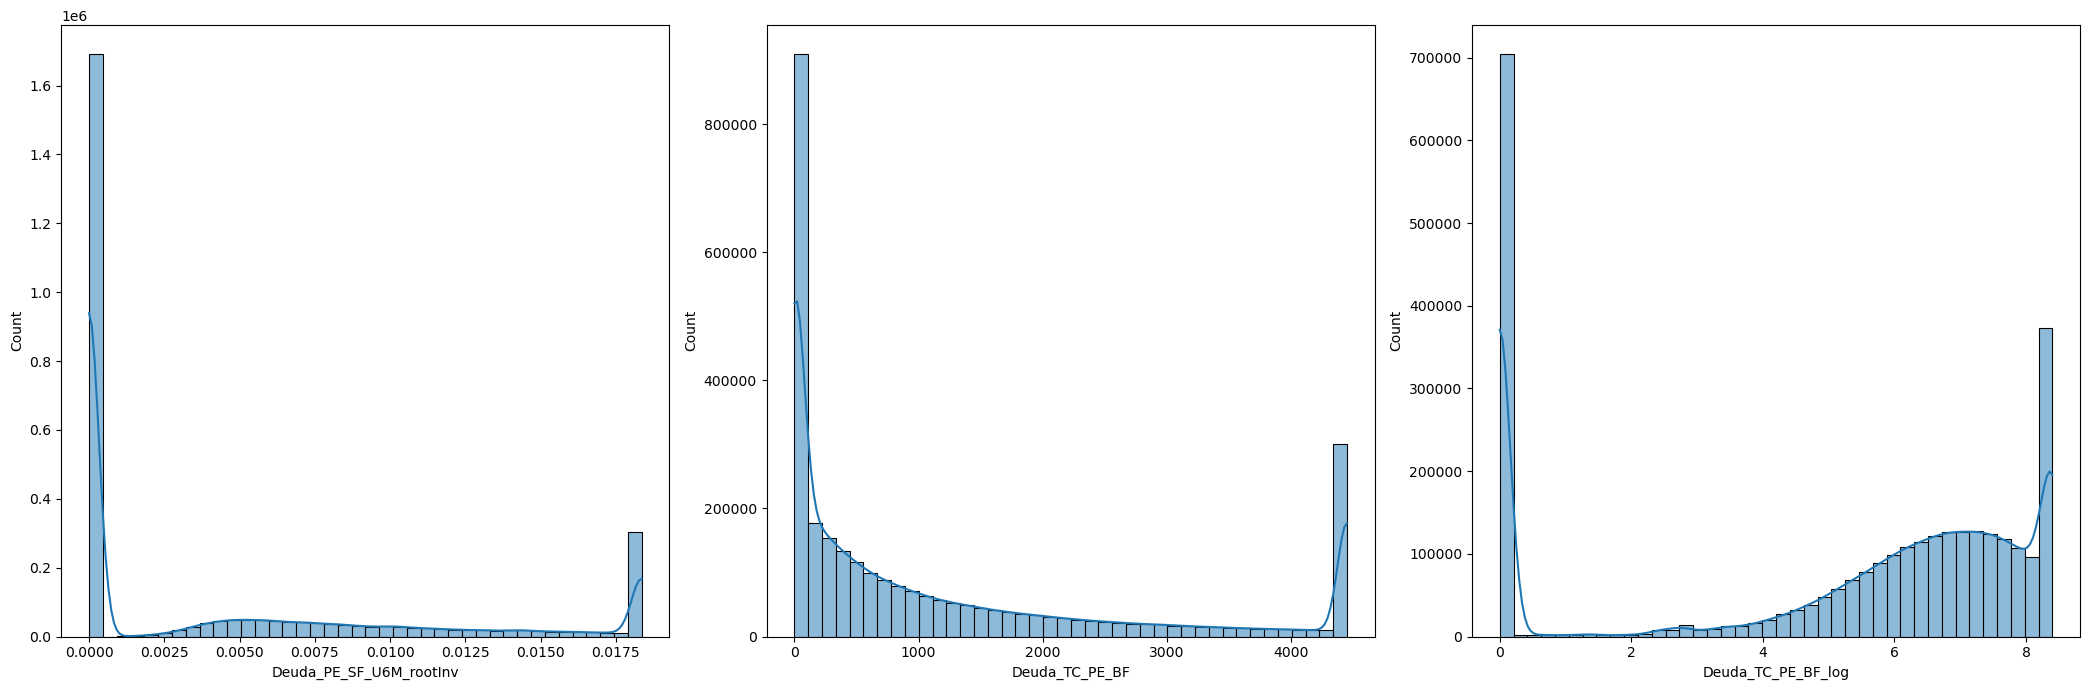

In [89]:
# Crear una cuadrícula de subplots de 3x3 con un tamaño de 14x14 pulgadas
fig, axes = plt.subplots(1, 3, figsize=(21, 7))  # Crea tres subplots en una fila

# Crear histogramas univariados en cada eje
sns.histplot(df["Deuda_PE_SF_U6M_rootInv"], kde=True, bins=40, ax=axes[0])
sns.histplot(df["Deuda_TC_PE_BF"], kde=True, bins=40, ax=axes[1])
sns.histplot(df["Deuda_TC_PE_BF_log"], kde=True, bins=40, ax=axes[2])
#para descargar la imagen
#el dpi es la calidad de la imangen si te falta subele
#para guardar una nueva imagen campia el nombre porque sino se guarda en la misma imagen
plt.savefig('n3.jpg', format='jpg',dpi=400)

#en caso de que estes por google colab, este es el codigo para descargar 
#from google.colab import files
#files.download('dtypes_tipodedata.jpg')


plt.tight_layout()
plt.show()

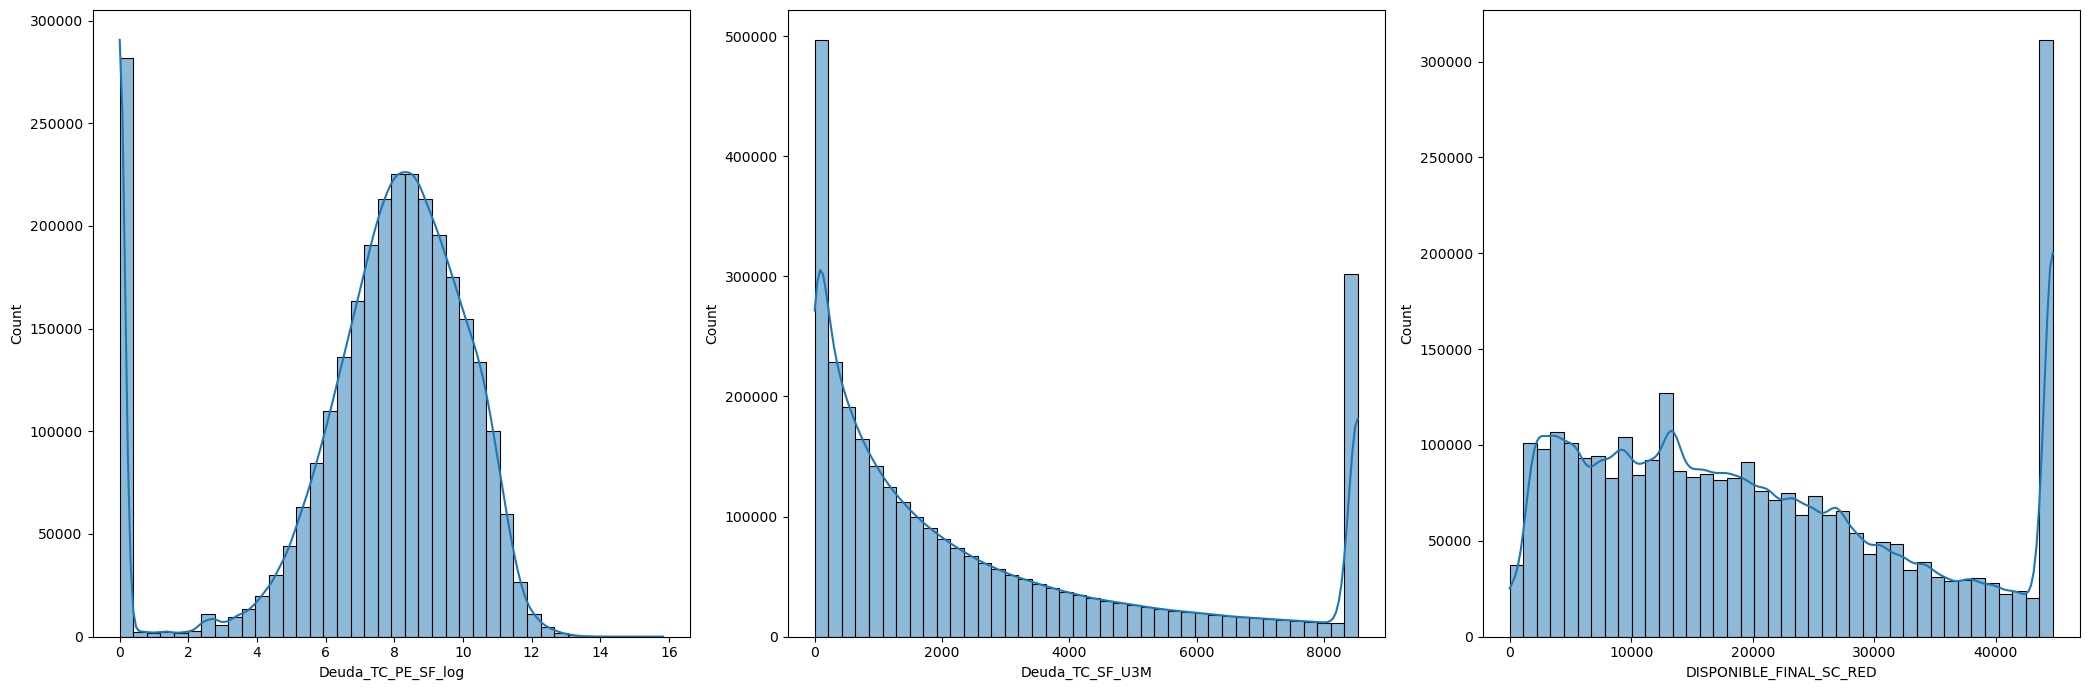

In [91]:
# Crear una cuadrícula de subplots de 3x3 con un tamaño de 14x14 pulgadas
fig, axes = plt.subplots(1, 3, figsize=(21, 7))  # Crea tres subplots en una fila

# Crear histogramas univariados en cada eje
sns.histplot(df["Deuda_TC_PE_SF_log"], kde=True, bins=40, ax=axes[0])
sns.histplot(df["Deuda_TC_SF_U3M"], kde=True, bins=40, ax=axes[1])
sns.histplot(df["DISPONIBLE_FINAL_SC_RED"], kde=True, bins=40, ax=axes[2])
#para descargar la imagen
#el dpi es la calidad de la imangen si te falta subele
#para guardar una nueva imagen campia el nombre porque sino se guarda en la misma imagen
plt.savefig('n4.jpg', format='jpg', dpi=400)

#en caso de que estes por google colab, este es el codigo para descargar 
#from google.colab import files
#files.download('dtypes_tipodedata.jpg')


plt.tight_layout()
plt.show()

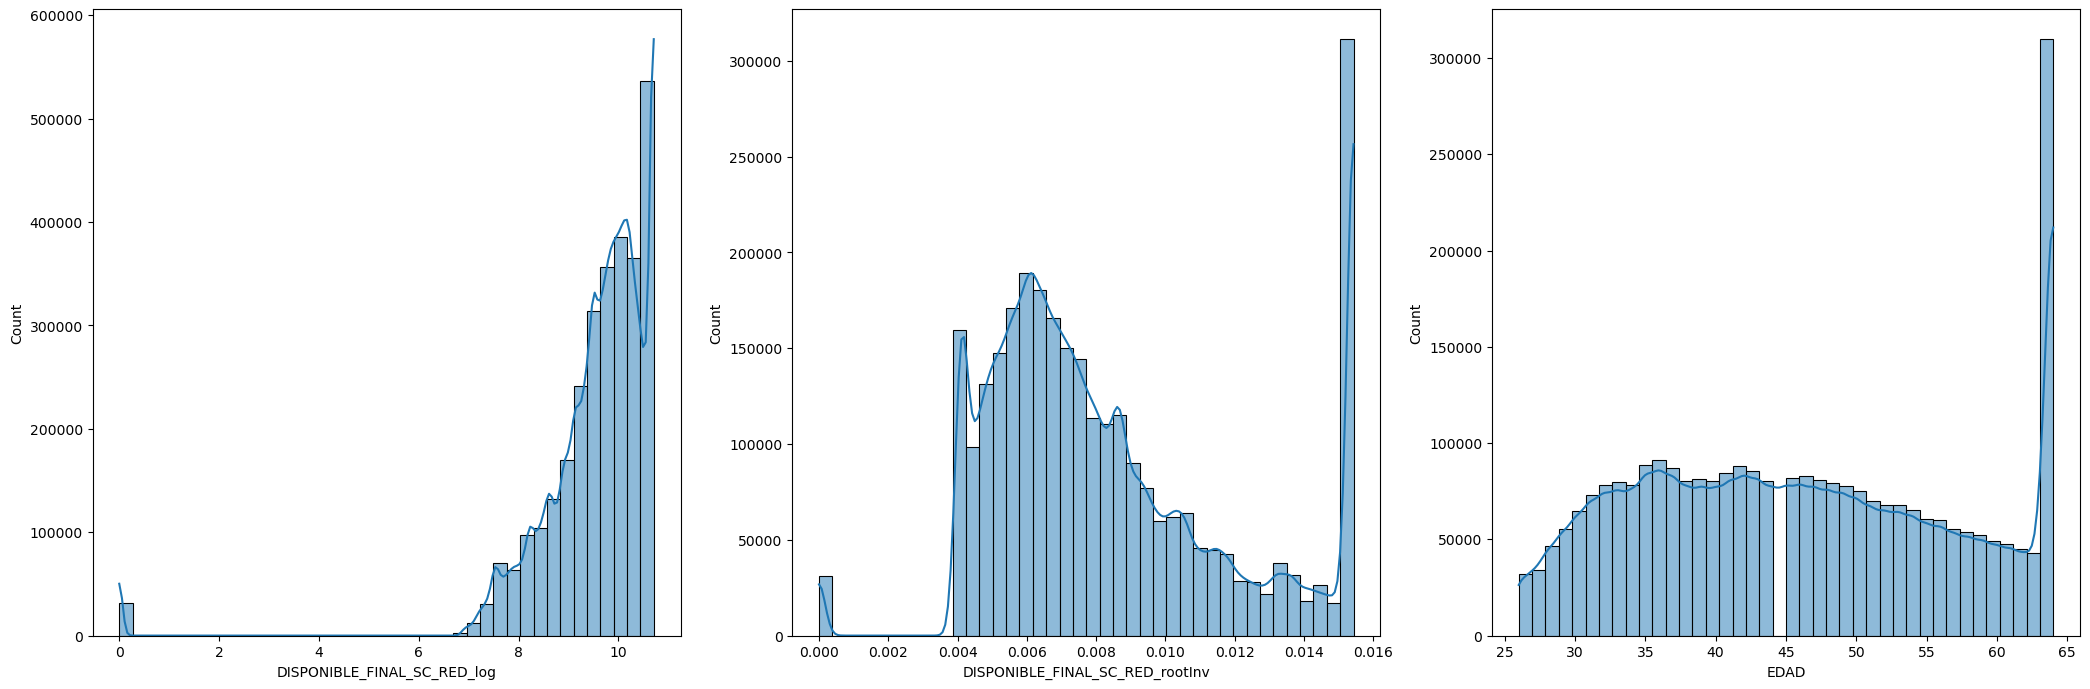

In [93]:
# Crear una cuadrícula de subplots de 3x3 con un tamaño de 14x14 pulgadas
fig, axes = plt.subplots(1, 3, figsize=(21, 7))  # Crea tres subplots en una fila

# Crear histogramas univariados en cada eje
sns.histplot(df["DISPONIBLE_FINAL_SC_RED_log"], kde=True, bins=40, ax=axes[0])
sns.histplot(df["DISPONIBLE_FINAL_SC_RED_rootInv"], kde=True, bins=40, ax=axes[1])
sns.histplot(df["EDAD"], kde=True, bins=40, ax=axes[2])
#para descargar la imagen
#el dpi es la calidad de la imangen si te falta subele
#para guardar una nueva imagen campia el nombre porque sino se guarda en la misma imagen
plt.savefig('n5.jpg', format='jpg', dpi=400)

#en caso de que estes por google colab, este es el codigo para descargar 
#from google.colab import files
#files.download('dtypes_tipodedata.jpg')


plt.tight_layout()
plt.show()

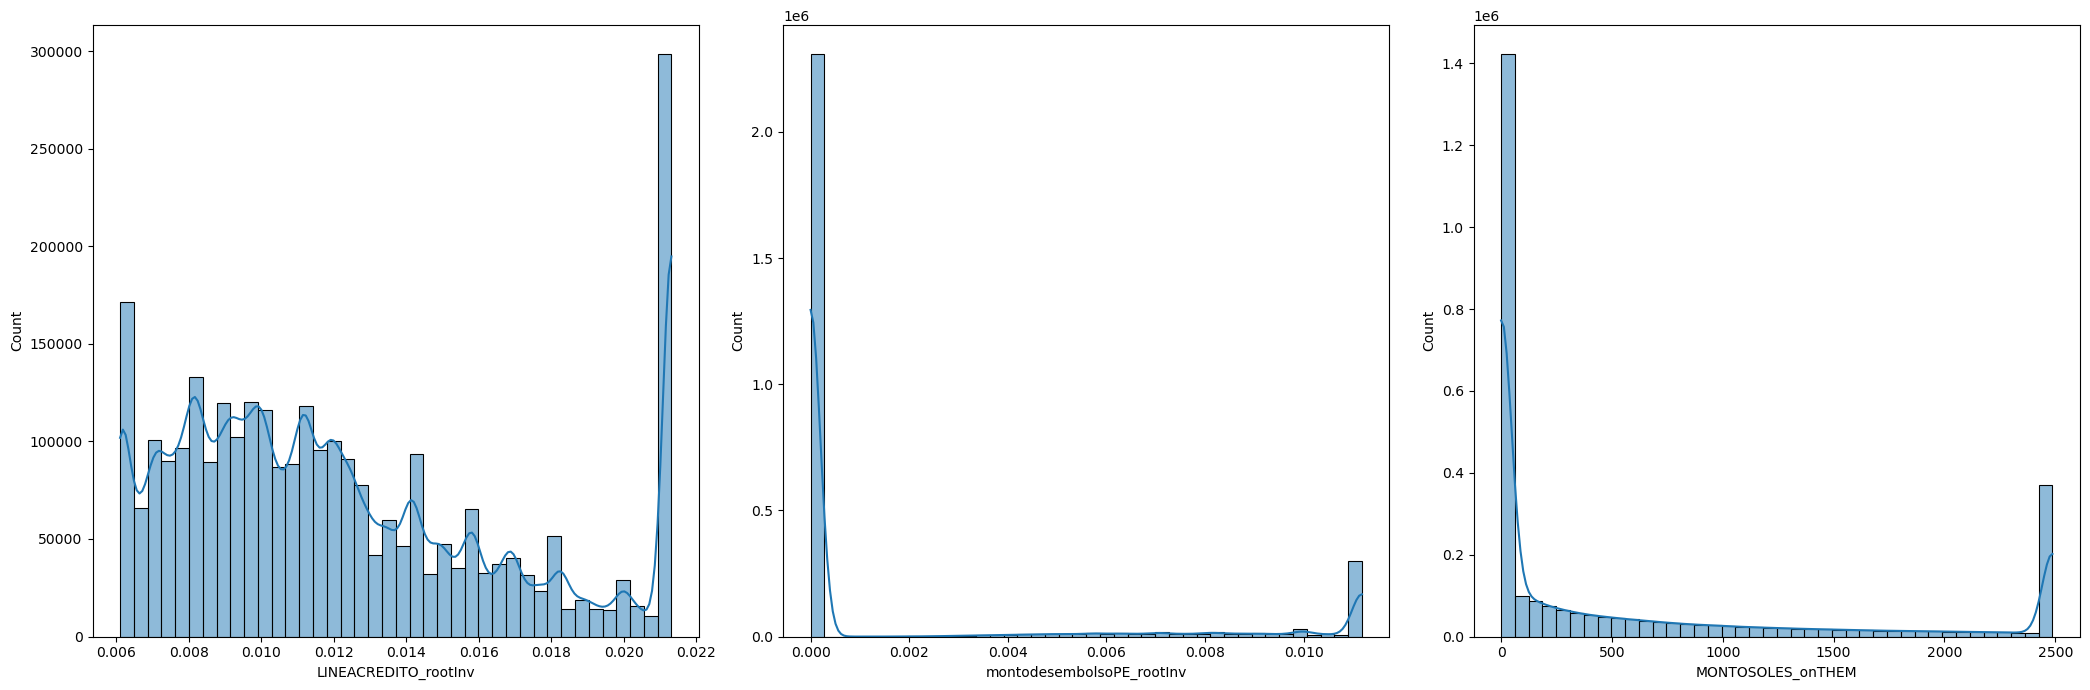

In [95]:
# Crear una cuadrícula de subplots de 3x3 con un tamaño de 14x14 pulgadas
fig, axes = plt.subplots(1, 3, figsize=(21, 7))  # Crea tres subplots en una fila

# Crear histogramas univariados en cada eje
sns.histplot(df["LINEACREDITO_rootInv"], kde=True, bins=40, ax=axes[0])
sns.histplot(df["montodesembolsoPE_rootInv"], kde=True, bins=40, ax=axes[1])
sns.histplot(df["MONTOSOLES_onTHEM"], kde=True, bins=40, ax=axes[2])
#para descargar la imagen
#el dpi es la calidad de la imangen si te falta subele
#para guardar una nueva imagen campia el nombre porque sino se guarda en la misma imagen
plt.savefig('n6.jpg', format='jpg', dpi=400)

#en caso de que estes por google colab, este es el codigo para descargar 
#from google.colab import files
#files.download('dtypes_tipodedata.jpg')


plt.tight_layout()
plt.show()

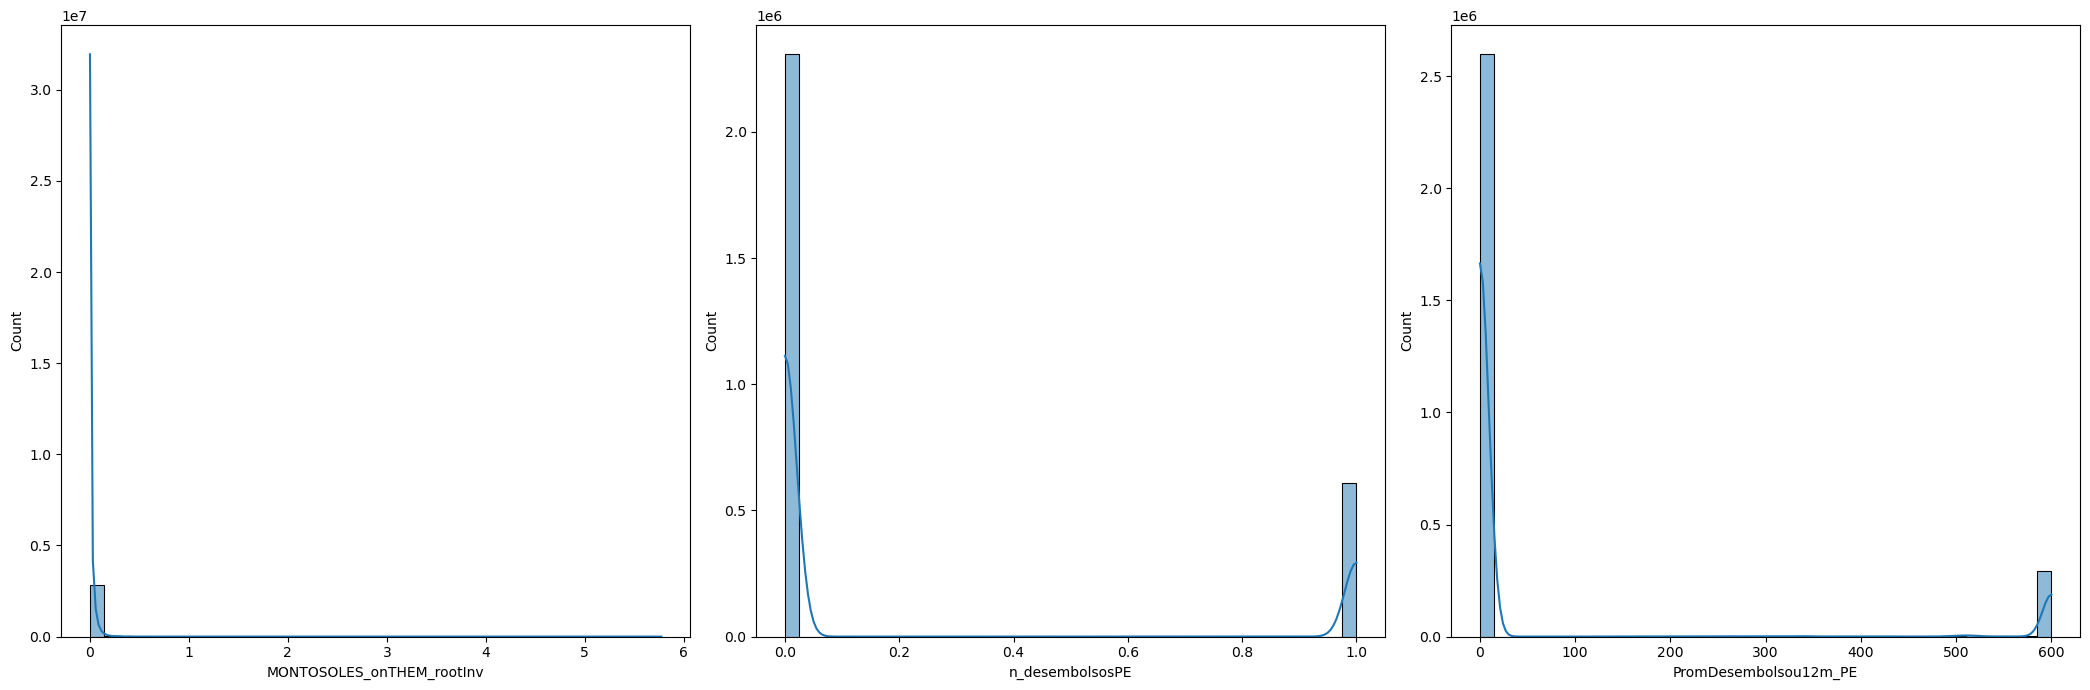

In [97]:
# Crear una cuadrícula de subplots de 3x3 con un tamaño de 14x14 pulgadas
fig, axes = plt.subplots(1, 3, figsize=(21, 7))  # Crea tres subplots en una fila

# Crear histogramas univariados en cada eje
sns.histplot(df["MONTOSOLES_onTHEM_rootInv"], kde=True, bins=40, ax=axes[0])
sns.histplot(df["n_desembolsosPE"], kde=True, bins=40, ax=axes[1])
sns.histplot(df["PromDesembolsou12m_PE"], kde=True, bins=40, ax=axes[2])
#para descargar la imagen
#el dpi es la calidad de la imangen si te falta subele
#para guardar una nueva imagen campia el nombre porque sino se guarda en la misma imagen
plt.savefig('n7.jpg', format='jpg', dpi=400)

#en caso de que estes por google colab, este es el codigo para descargar 
#from google.colab import files
#files.download('dtypes_tipodedata.jpg')


plt.tight_layout()
plt.show()

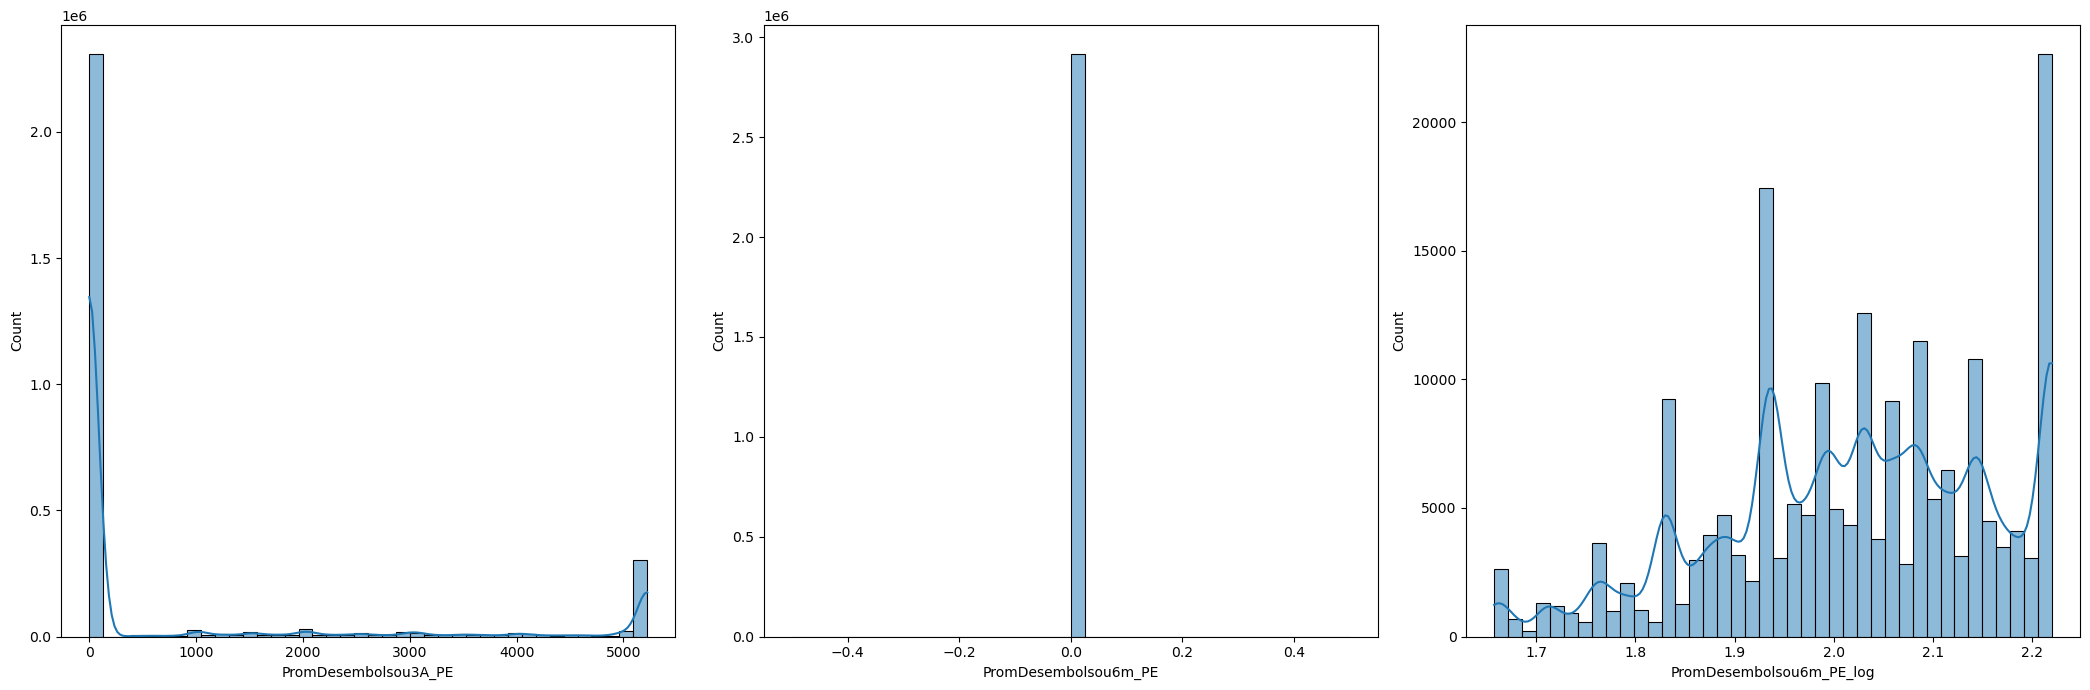

In [99]:
# Crear una cuadrícula de subplots de 3x3 con un tamaño de 14x14 pulgadas
fig, axes = plt.subplots(1, 3, figsize=(21, 7))  # Crea tres subplots en una fila

# Crear histogramas univariados en cada eje
sns.histplot(df["PromDesembolsou3A_PE"], kde=True, bins=40, ax=axes[0])
sns.histplot(df["PromDesembolsou6m_PE"], kde=True, bins=40, ax=axes[1])
sns.histplot(df["PromDesembolsou6m_PE_log"], kde=True, bins=40, ax=axes[2])
#para descargar la imagen
#el dpi es la calidad de la imangen si te falta subele
#para guardar una nueva imagen campia el nombre porque sino se guarda en la misma imagen
plt.savefig('n8.jpg', format='jpg', dpi=400)

#en caso de que estes por google colab, este es el codigo para descargar 
#from google.colab import files
#files.download('dtypes_tipodedata.jpg')


plt.tight_layout()
plt.show()

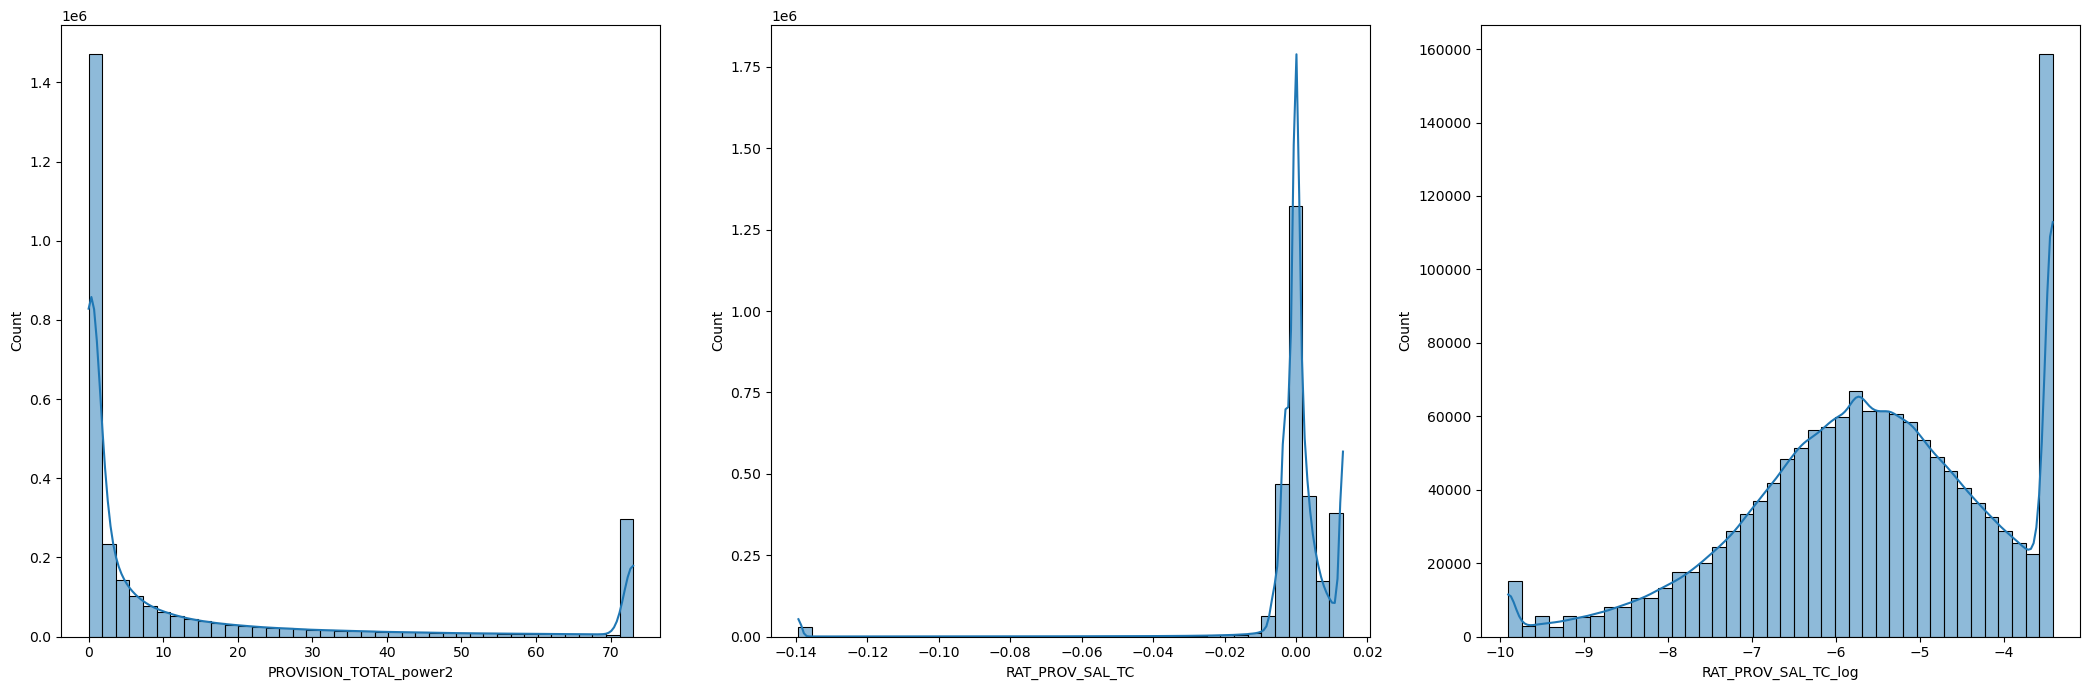

In [101]:
# Crear una cuadrícula de subplots de 3x3 con un tamaño de 14x14 pulgadas
fig, axes = plt.subplots(1, 3, figsize=(21, 7))  # Crea tres subplots en una fila

# Crear histogramas univariados en cada eje
sns.histplot(df["PROVISION_TOTAL_power2"], kde=True, bins=40, ax=axes[0])
sns.histplot(df["RAT_PROV_SAL_TC"], kde=True, bins=40, ax=axes[1])
sns.histplot(df["RAT_PROV_SAL_TC_log"], kde=True, bins=40, ax=axes[2])
#para descargar la imagen
#el dpi es la calidad de la imangen si te falta subele
#para guardar una nueva imagen campia el nombre porque sino se guarda en la misma imagen
plt.savefig('n9.jpg', format='jpg', dpi=400)

#en caso de que estes por google colab, este es el codigo para descargar 
#from google.colab import files
#files.download('dtypes_tipodedata.jpg')


plt.tight_layout()
plt.show()

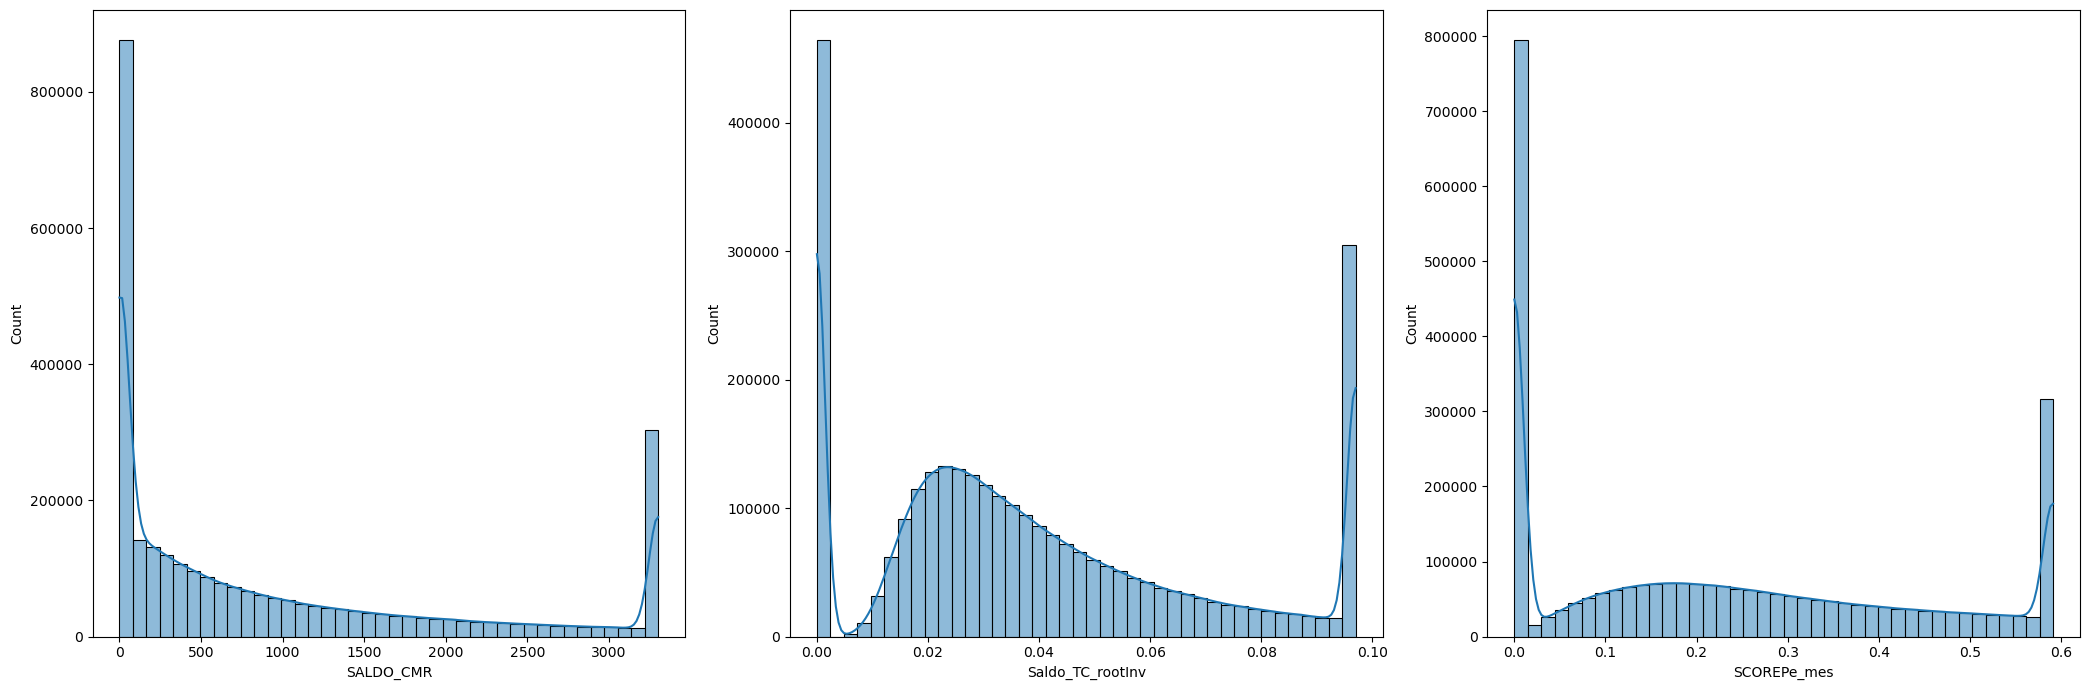

In [103]:
# Crear una cuadrícula de subplots de 3x3 con un tamaño de 14x14 pulgadas
fig, axes = plt.subplots(1, 3, figsize=(21, 7))  # Crea tres subplots en una fila

# Crear histogramas univariados en cada eje
sns.histplot(df["SALDO_CMR"], kde=True, bins=40, ax=axes[0])
sns.histplot(df["Saldo_TC_rootInv"], kde=True, bins=40, ax=axes[1])
sns.histplot(df["SCOREPe_mes"], kde=True, bins=40, ax=axes[2])
#para descargar la imagen
#el dpi es la calidad de la imangen si te falta subele
#para guardar una nueva imagen campia el nombre porque sino se guarda en la misma imagen
plt.savefig('n10.jpg', format='jpg', dpi=400)

#en caso de que estes por google colab, este es el codigo para descargar 
#from google.colab import files
#files.download('dtypes_tipodedata.jpg')


plt.tight_layout()
plt.show()

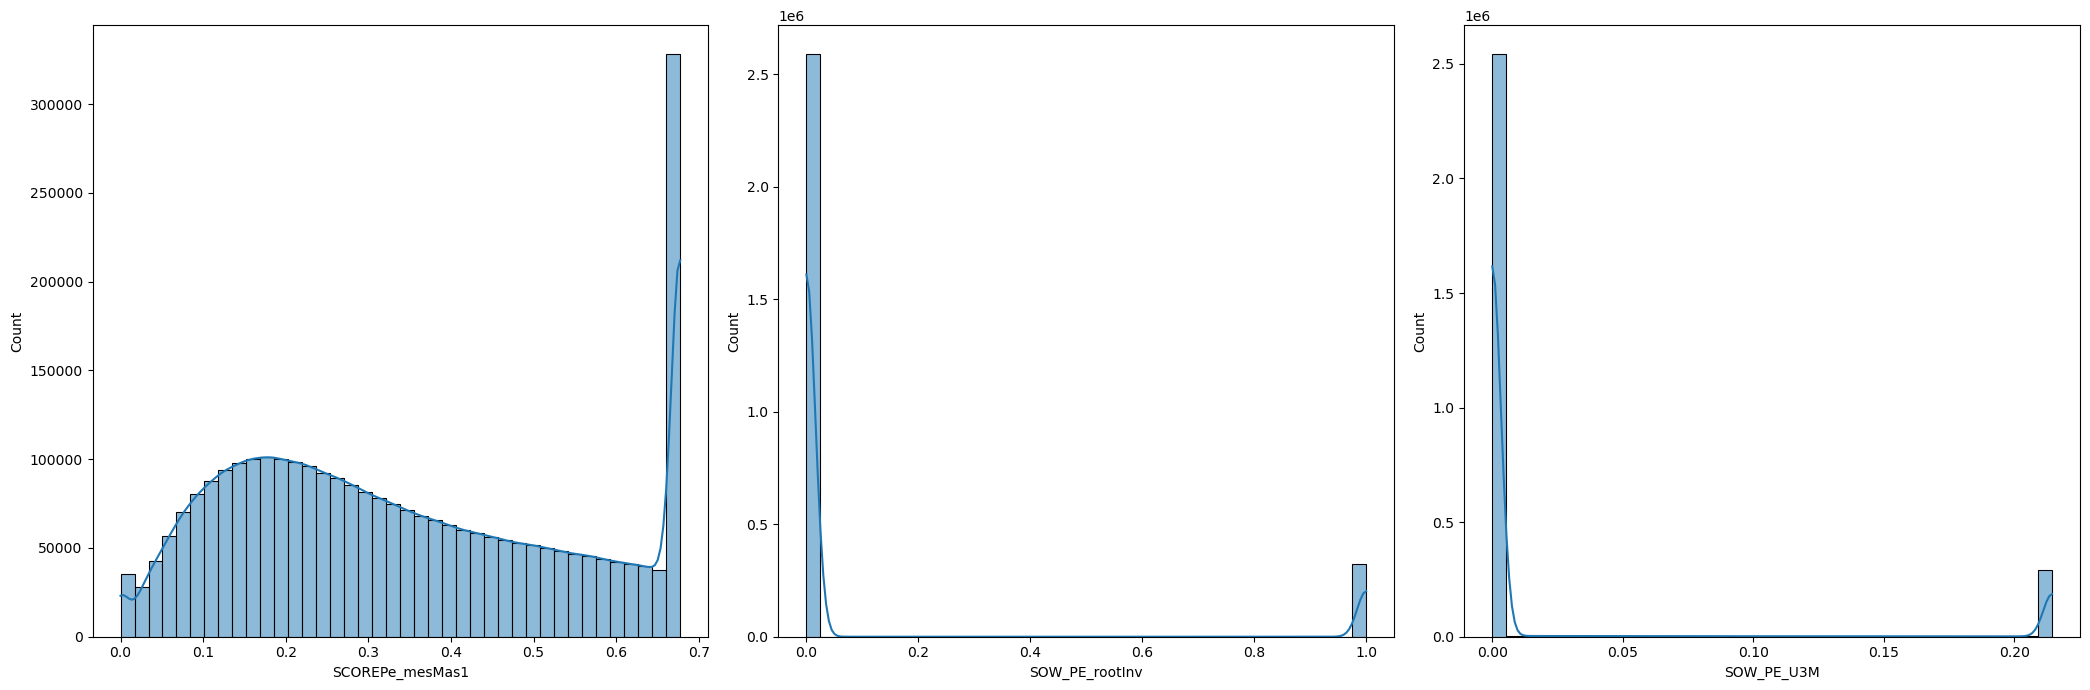

In [105]:
# Crear una cuadrícula de subplots de 3x3 con un tamaño de 14x14 pulgadas
fig, axes = plt.subplots(1, 3, figsize=(21, 7))  # Crea tres subplots en una fila

# Crear histogramas univariados en cada eje
sns.histplot(df["SCOREPe_mesMas1"], kde=True, bins=40, ax=axes[0])
sns.histplot(df["SOW_PE_rootInv"], kde=True, bins=40, ax=axes[1])
sns.histplot(df["SOW_PE_U3M"], kde=True, bins=40, ax=axes[2])
#para descargar la imagen
#el dpi es la calidad de la imangen si te falta subele
#para guardar una nueva imagen campia el nombre porque sino se guarda en la misma imagen
plt.savefig('n11.jpg', format='jpg', dpi=400)

#en caso de que estes por google colab, este es el codigo para descargar 
#from google.colab import files
#files.download('dtypes_tipodedata.jpg')


plt.tight_layout()
plt.show()

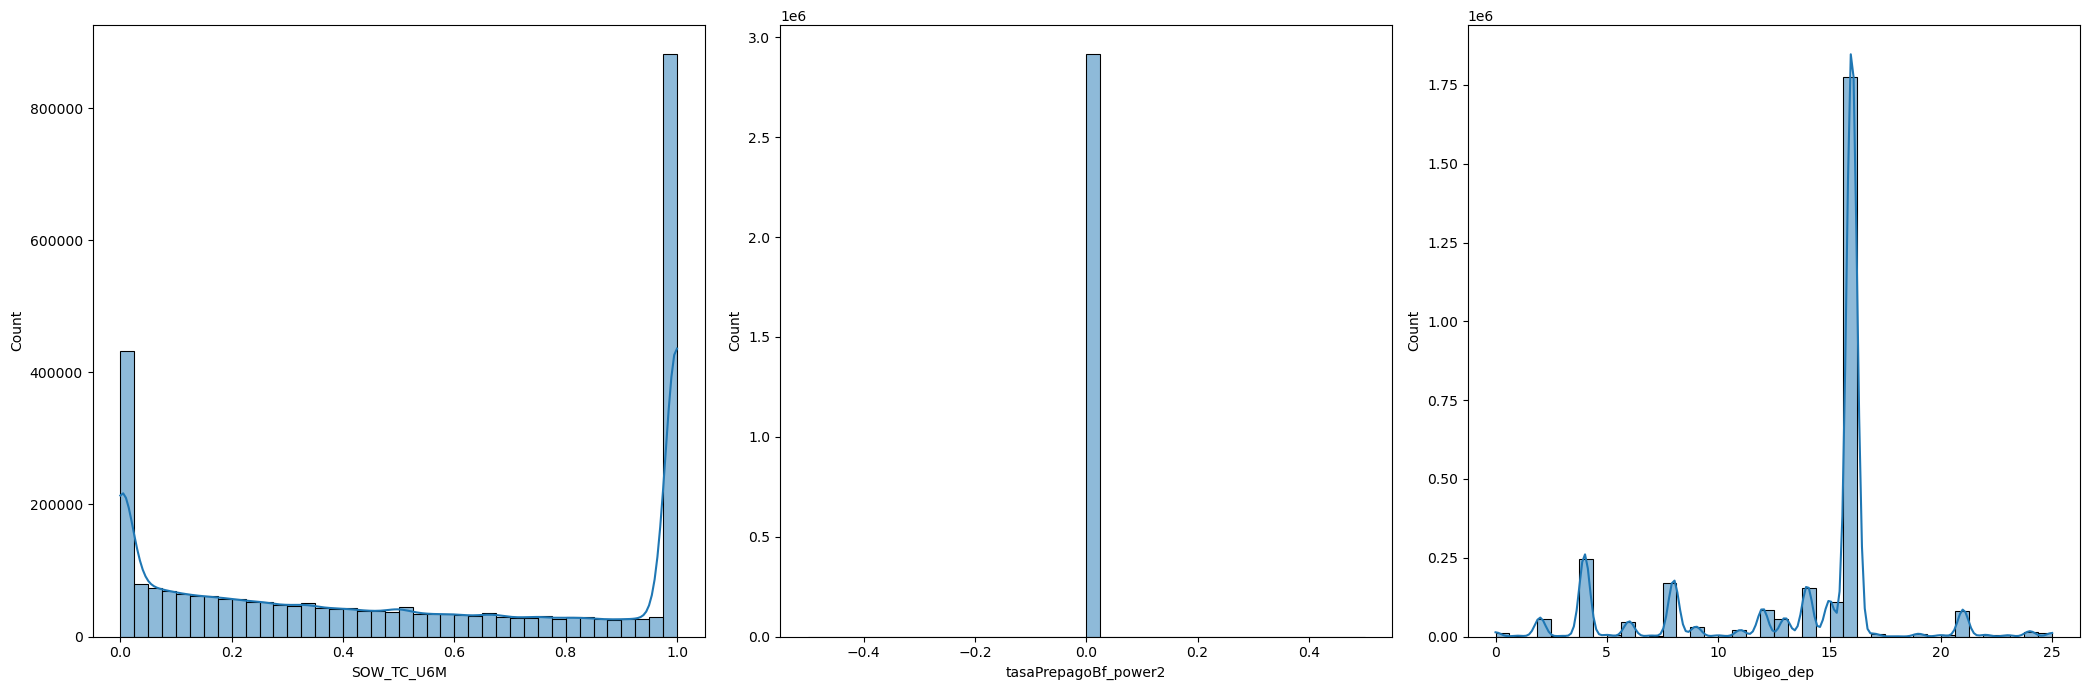

In [107]:
# Crear una cuadrícula de subplots de 3x3 con un tamaño de 14x14 pulgadas
fig, axes = plt.subplots(1, 3, figsize=(21, 7))  # Crea tres subplots en una fila

# Crear histogramas univariados en cada eje
sns.histplot(df["SOW_TC_U6M"], kde=True, bins=40, ax=axes[0])
sns.histplot(df["tasaPrepagoBf_power2"], kde=True, bins=40, ax=axes[1])
sns.histplot(df["Ubigeo_dep"], kde=True, bins=40, ax=axes[2])
#para descargar la imagen
#el dpi es la calidad de la imangen si te falta subele
#para guardar una nueva imagen campia el nombre porque sino se guarda en la misma imagen
plt.savefig('n12.jpg', format='jpg', dpi=400)

#en caso de que estes por google colab, este es el codigo para descargar 
#from google.colab import files
#files.download('dtypes_tipodedata.jpg')


plt.tight_layout()
plt.show()

In [109]:
df.to_csv('Base_Normalizada.csv', sep = ';')